# **Tugas Data Mining Week 2 & 3**
Kelompok 10 - 2023 F
1. Elizabeth Hanov - 23031554055
2. Aghnia Alya Amarilla - 23031554102
3. Nashita Erha Fitri - 23031554116


#**LOAD DATA**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/data.csv')

df.head()

id       age  death     sex  hospdead  slos  d.time            dzgroup  \
0   1  62.84998      0    male         0     5    2029        Lung Cancer   
1   2  60.33899      1  female         1     4       4          Cirrhosis   
2   3  52.74698      1  female         0    17      47          Cirrhosis   
3   4  42.38498      1  female         0     3     133        Lung Cancer   
4   5  79.88495      0  female         0    16    2029  ARF/MOSF w/Sepsis   

              dzclass  num.co  ...      crea    sod        ph  glucose  bun  \
0              Cancer       0  ...  1.199951  141.0  7.459961      NaN  NaN   
1  COPD/CHF/Cirrhosis       2  ...  5.500000  132.0  7.250000      NaN  NaN   
2  COPD/CHF/Cirrhosis       2  ...  2.000000  134.0  7.459961      NaN  NaN   
3              Cancer       2  ...  0.799927  139.0       NaN      NaN  NaN   
4            ARF/MOSF       1  ...  0.799927  143.0  7.509766      NaN  NaN   

   urine  adlp adls                sfdm2  adlsc  
0    NaN   7.0  7.0                  NaN    7.0  
1    NaN   NaN  1.0     <2 mo. follow-up    1.0  
2    NaN   1.0  0.0     <2 mo. follow-up    0.0  
3    NaN   0.0  0.0  no(M2 and SIP pres)    0.0  
4    NaN   NaN  2.0  no(M2 and SIP pres)    2.0  

[5 rows x 48 columns]

#**EDA (EXPLANATORY DATA ANALYSIS)**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

In [ ]:
df.shape

(9105, 48)

cek duplikat

In [ ]:
df.duplicated().sum()

0

cek missing values

In [ ]:
import pandas as pd

missing_values = df.isna().sum()
percent_null = df.isna().mean() * 100

cek_missing_value = pd.concat([missing_values, percent_null], axis=1)
cek_missing_value.columns = ['Jumlah Missing Values', 'Persentase Missing Values']
print(cek_missing_value)

          Jumlah Missing Values  Persentase Missing Values
id                            0                   0.000000
age                           0                   0.000000
death                         0                   0.000000
sex                           0                   0.000000
hospdead                      0                   0.000000
slos                          0                   0.000000
d.time                        0                   0.000000
dzgroup                       0                   0.000000
dzclass                       0                   0.000000
num.co                        0                   0.000000
edu                        1634                  17.946183
income                     2982                  32.751236
scoma                         1                   0.010983
charges                     172                   1.889072
totcst                      888                   9.752883
totmcst                    3475                  38.1658

DROP MISSING VALUES > 50%

In [ ]:
df.drop(['urine','adlp'], axis = 1, inplace = True)

# **HANDLING MISSING VALUES**
data kategorikal = imputasi menggunakan modus dengan indmax()

**kenapa menggunakan indmax?**

1.   karena indmax bisa menangani multimodal / modus yang ganda atau lebih
2.   jika mode[0] mengambil modus pertama maka indmax mengambil semua angka yang sering muncul

misal :

**data = [2, 1, 3, 3, 4, 2, 5, 5, 5, 2]**

mode[0] = 2

indmax() = [2,5]

In [ ]:
categorical = df.select_dtypes(include=['object', 'category']).columns
mv_categorical = df[categorical].isna().sum()
mv_categorical

sex           0
dzgroup       0
dzclass       0
income     2982
race         42
ca            0
dnr          30
sfdm2      1400
dtype: int64

In [ ]:
for col in categorical:
    mode_value = df[col].value_counts().idxmax()
    df[col].fillna(mode_value, inplace=True)

<ipython-input-11-1db620108886>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
<ipython-input-11-1db620108886>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
df[categorical].isna().sum()

sex        0
dzgroup    0
dzclass    0
income     0
race       0
ca         0
dnr        0
sfdm2      0
dtype: int64

In [ ]:
df

id       age  death     sex  hospdead  slos  d.time  \
0        1  62.84998      0    male         0     5    2029   
1        2  60.33899      1  female         1     4       4   
2        3  52.74698      1  female         0    17      47   
3        4  42.38498      1  female         0     3     133   
4        5  79.88495      0  female         0    16    2029   
...    ...       ...    ...     ...       ...   ...     ...   
9100  9101  66.07300      0    male         0    23     350   
9101  9102  55.15399      0  female         0    29     347   
9102  9103  70.38196      0    male         0     8     346   
9103  9104  47.01999      1    male         1     7       7   
9104  9105  81.53894      1  female         0    12     198   

                dzgroup             dzclass  num.co  ...       alb      bili  \
0           Lung Cancer              Cancer       0  ...  1.799805  0.199982   
1             Cirrhosis  COPD/CHF/Cirrhosis       2  ...       NaN       NaN   
2             Cirrhosis  COPD/CHF/Cirrhosis       2  ...       NaN  2.199707   
3           Lung Cancer              Cancer       2  ...       NaN       NaN   
4     ARF/MOSF w/Sepsis            ARF/MOSF       1  ...       NaN       NaN   
...                 ...                 ...     ...  ...       ...       ...   
9100  ARF/MOSF w/Sepsis            ARF/MOSF       1  ...  3.699707  0.399963   
9101               Coma                Coma       1  ...       NaN       NaN   
9102  ARF/MOSF w/Sepsis            ARF/MOSF       1  ...       NaN  0.399963   
9103       MOSF w/Malig            ARF/MOSF       1  ...  1.199951  0.399963   
9104  ARF/MOSF w/Sepsis            ARF/MOSF       1  ...  4.500000  0.599976   

          crea    sod        ph  glucose   bun adls                sfdm2  \
0     1.199951  141.0  7.459961      NaN   NaN  7.0     <2 mo. follow-up   
1     5.500000  132.0  7.250000      NaN   NaN  1.0     <2 mo. follow-up   
2     2.000000  134.0  7.459961      NaN   NaN  0.0     <2 mo. follow-up   
3     0.799927  139.0       NaN      NaN   NaN  0.0  no(M2 and SIP pres)   
4     0.799927  143.0  7.509766      NaN   NaN  2.0  no(M2 and SIP pres)   
...        ...    ...       ...      ...   ...  ...                  ...   
9100  1.099854  131.0  7.459961    188.0  21.0  0.0     <2 mo. follow-up   
9101  5.899414  135.0  7.289062    190.0  49.0  0.0     <2 mo. follow-up   
9102  2.699707  139.0  7.379883    189.0  60.0  NaN     <2 mo. follow-up   
9103  3.500000  135.0  7.469727    246.0  55.0  0.0     <2 mo. follow-up   
9104  1.199951  137.0  7.289062    187.0  15.0  NaN  no(M2 and SIP pres)   

         adlsc  
0     7.000000  
1     1.000000  
2     0.000000  
3     0.000000  
4     2.000000  
...        ...  
9100  0.000000  
9101  0.000000  
9102  2.525391  
9103  0.000000  
9104  0.494751  

[9105 rows x 46 columns]

# **ENCODING DATA CATEGORICAL YANG SUDAH DIIMPUTASI**

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical = df.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col].astype(str))
    label_encoders[col] = label_encoder

df.head()

id       age  death  sex  hospdead  slos  d.time  dzgroup  dzclass  num.co  \
0   1  62.84998      0    1         0     5    2029        6        2       0   
1   2  60.33899      1    0         1     4       4        3        1       2   
2   3  52.74698      1    0         0    17      47        3        1       2   
3   4  42.38498      1    0         0     3     133        6        2       2   
4   5  79.88495      0    0         0    16    2029        0        0       1   

   ...       alb      bili      crea    sod        ph  glucose  bun  adls  \
0  ...  1.799805  0.199982  1.199951  141.0  7.459961      NaN  NaN   7.0   
1  ...       NaN       NaN  5.500000  132.0  7.250000      NaN  NaN   1.0   
2  ...       NaN  2.199707  2.000000  134.0  7.459961      NaN  NaN   0.0   
3  ...       NaN       NaN  0.799927  139.0       NaN      NaN  NaN   0.0   
4  ...       NaN       NaN  0.799927  143.0  7.509766      NaN  NaN   2.0   

   sfdm2  adlsc  
0      0    7.0  
1      0    1.0  
2      0    0.0  
3      4    0.0  
4      4    2.0  

[5 rows x 46 columns]

MELIHAT DISTRIBUSI DATA SESUDAH IMPUTASI CATEGORICAL

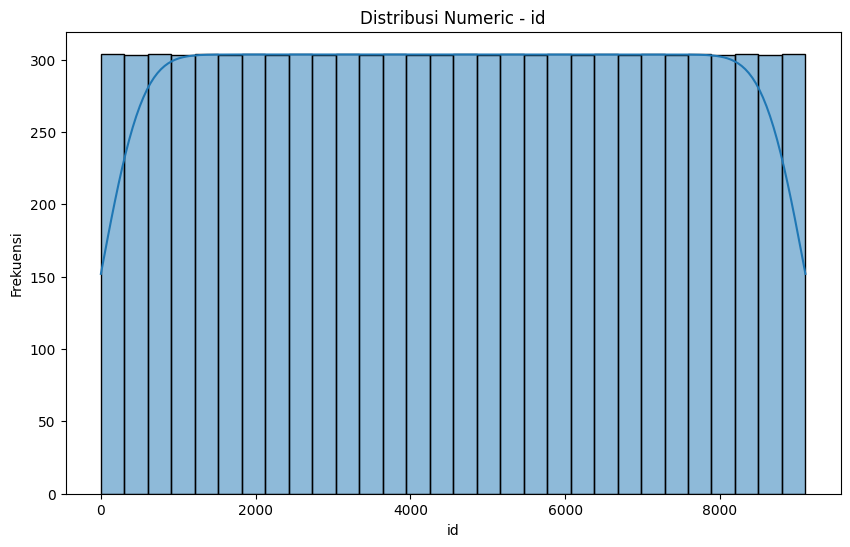

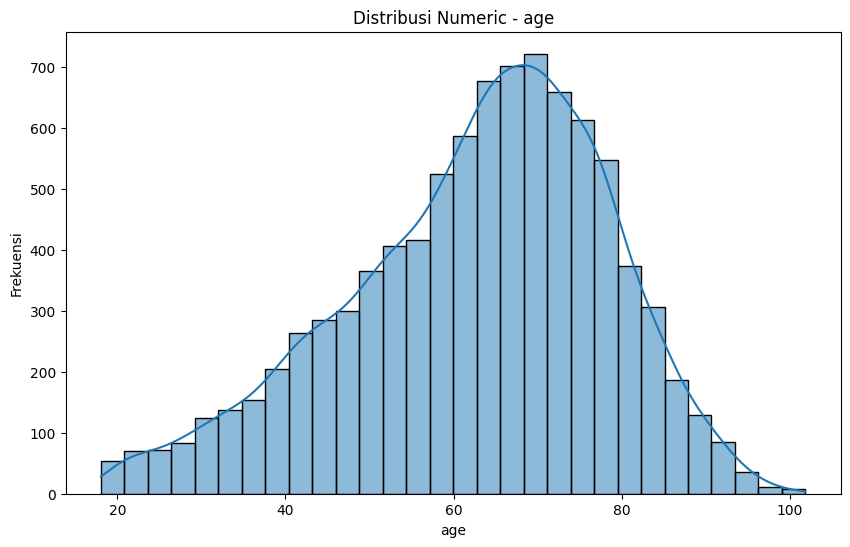

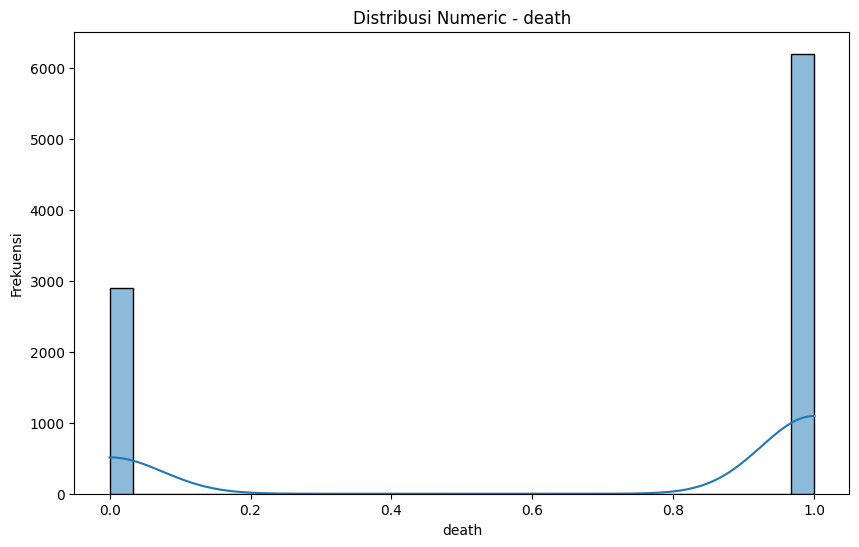

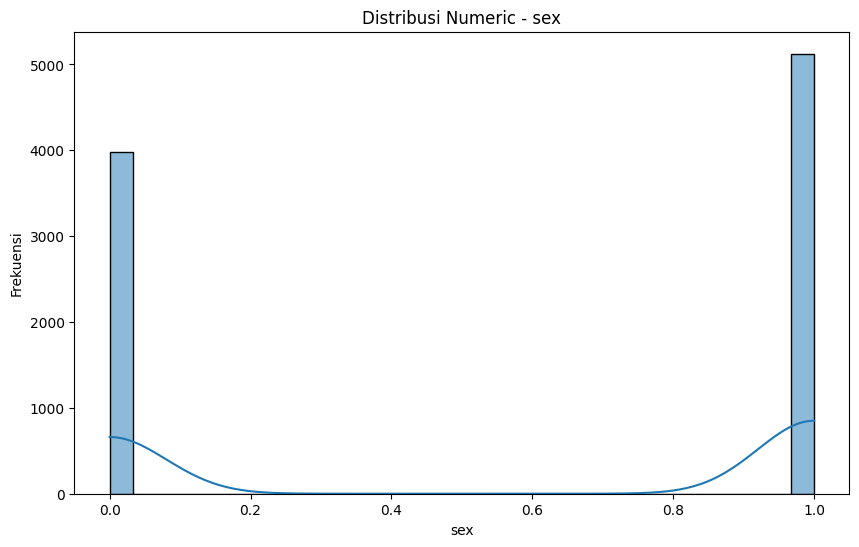

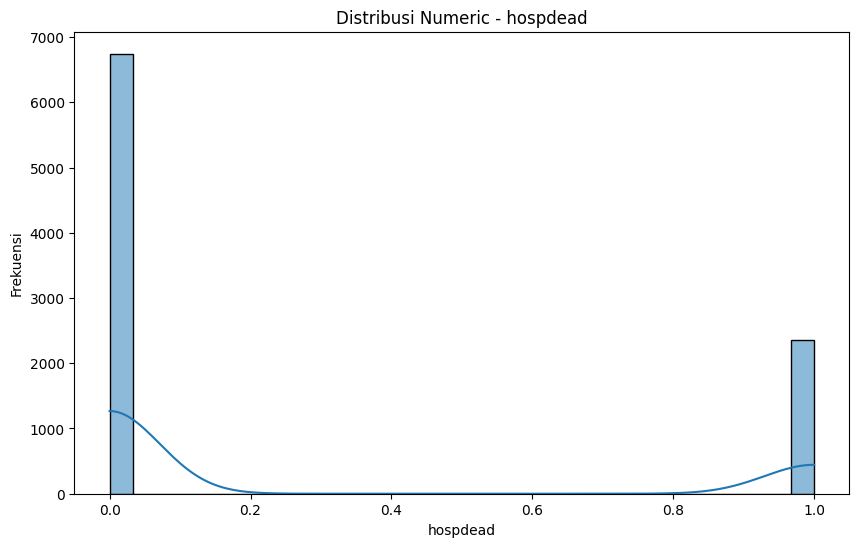

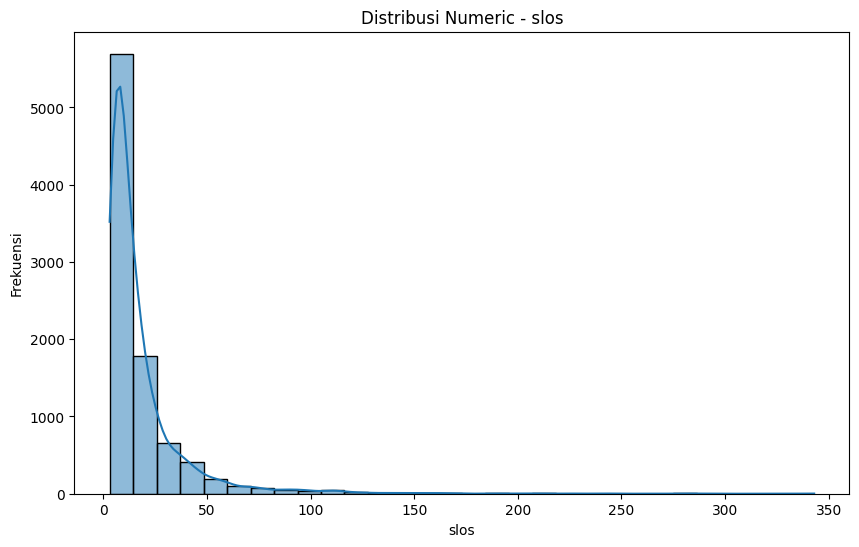

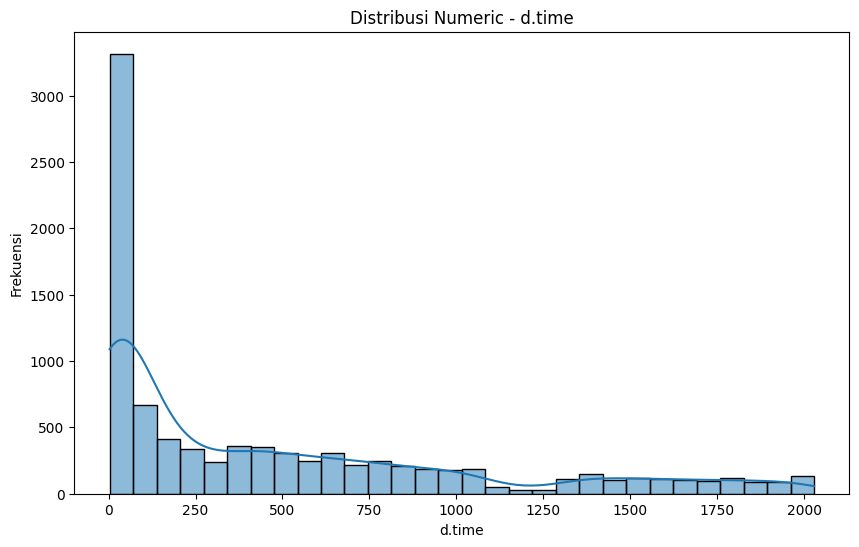

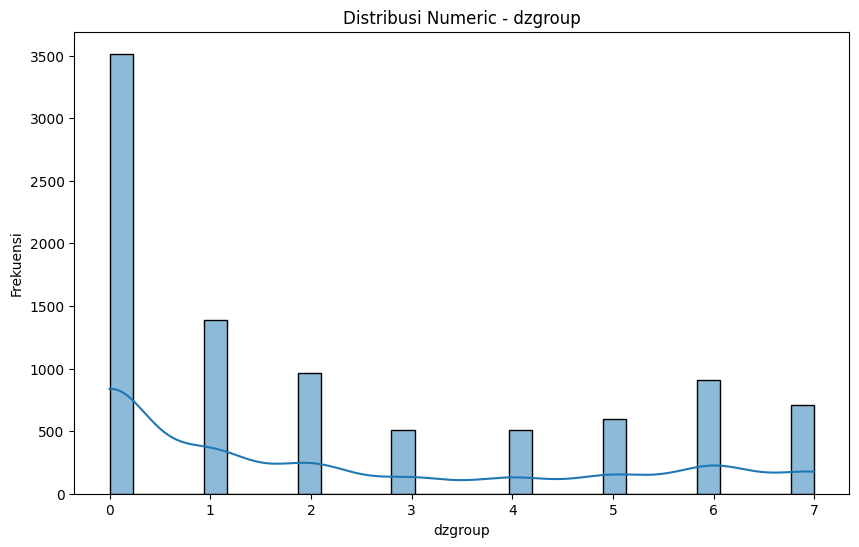

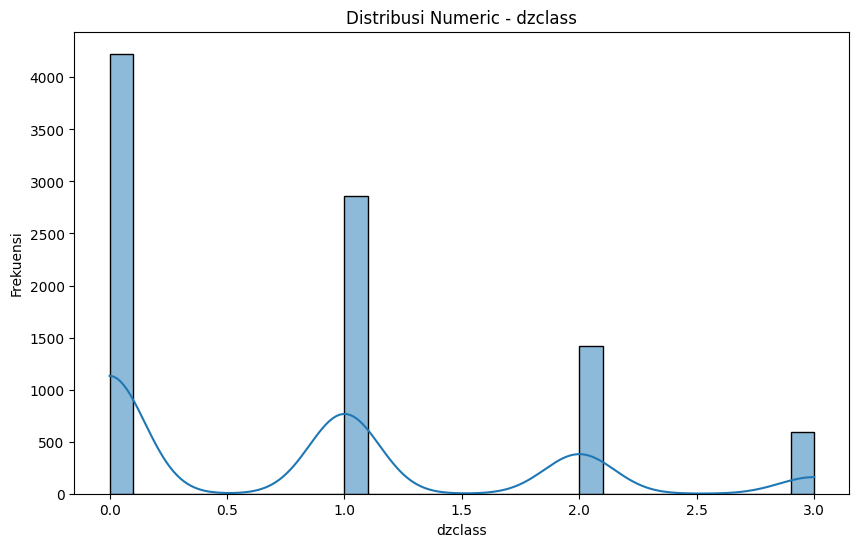

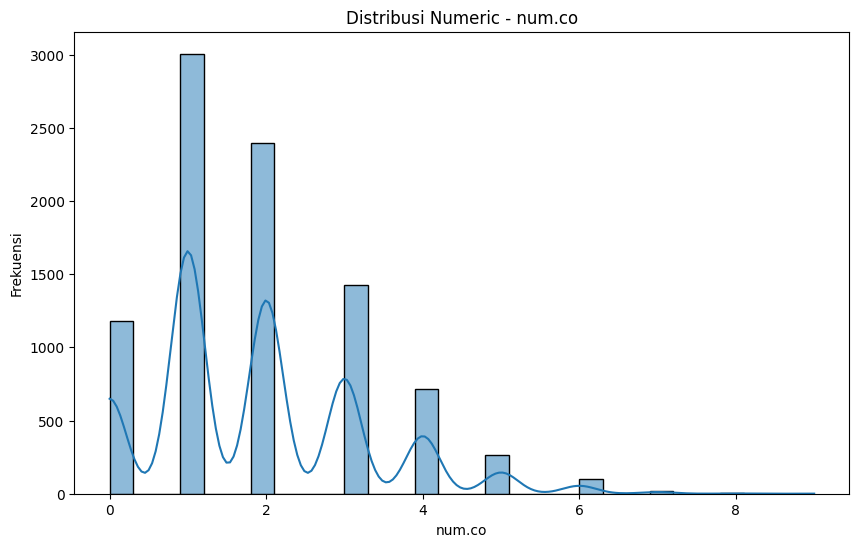

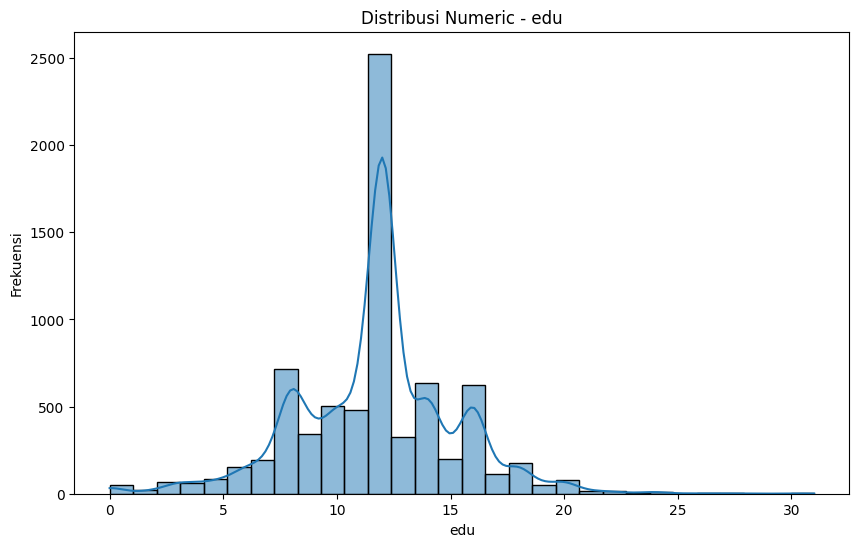

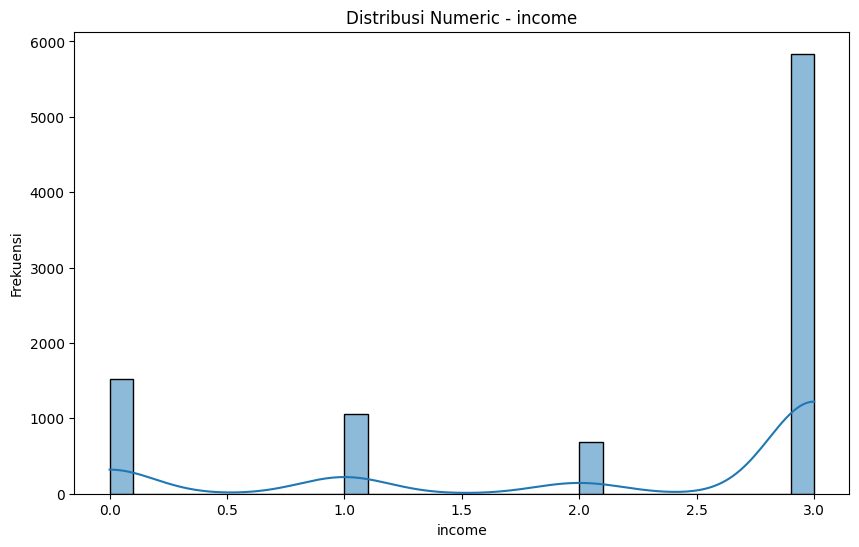

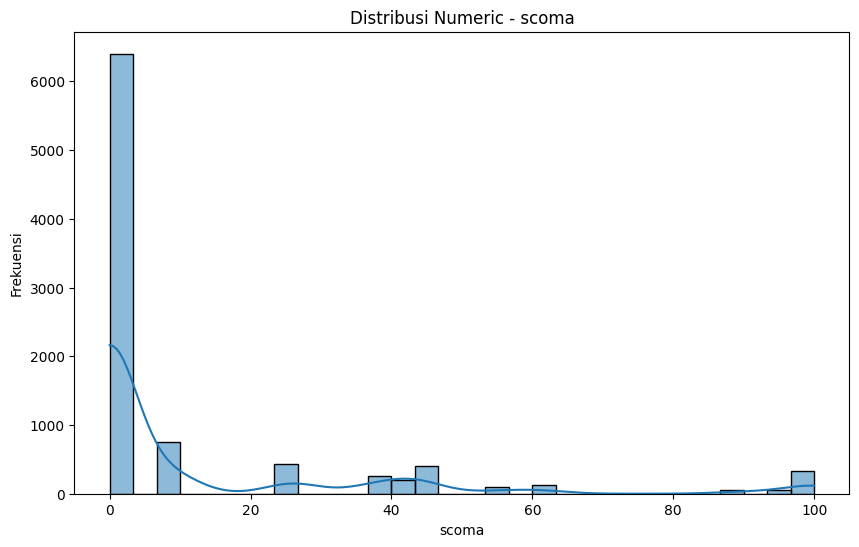

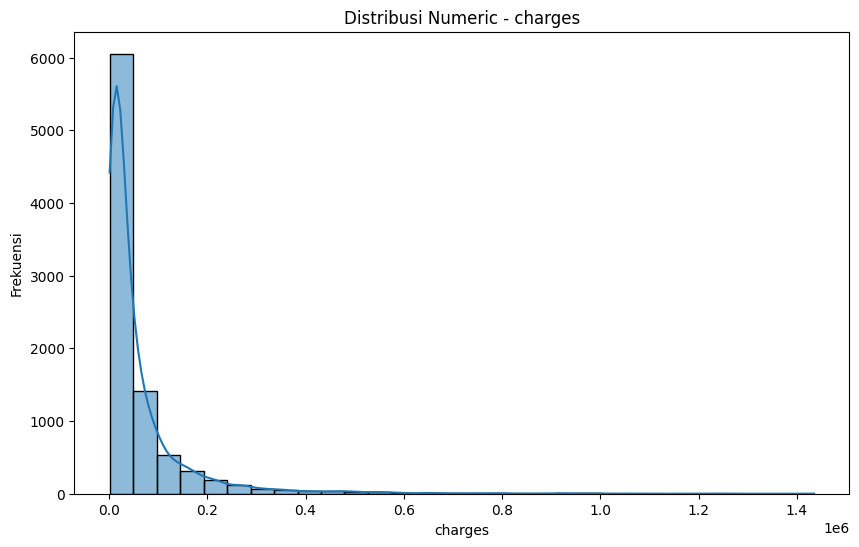

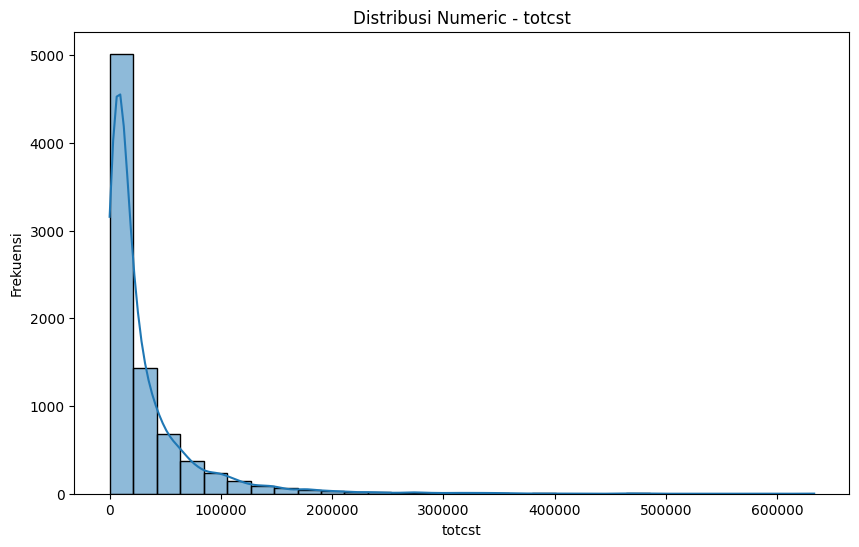

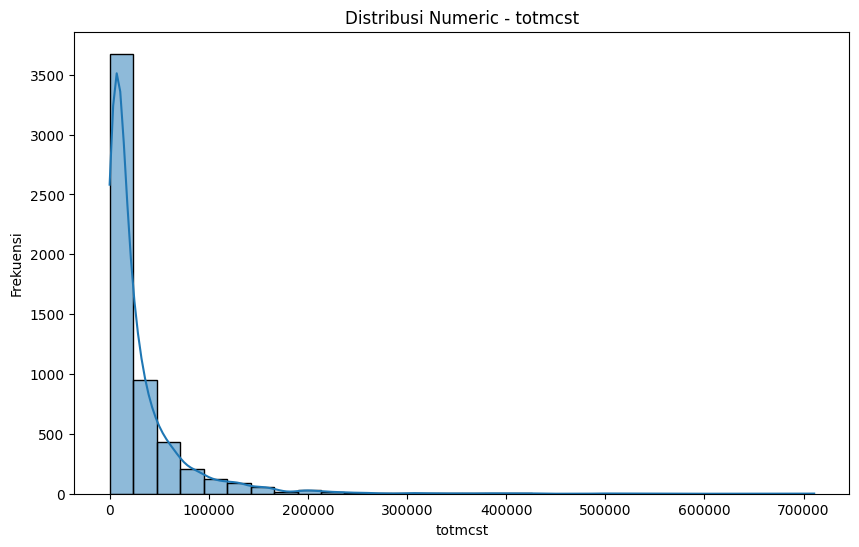

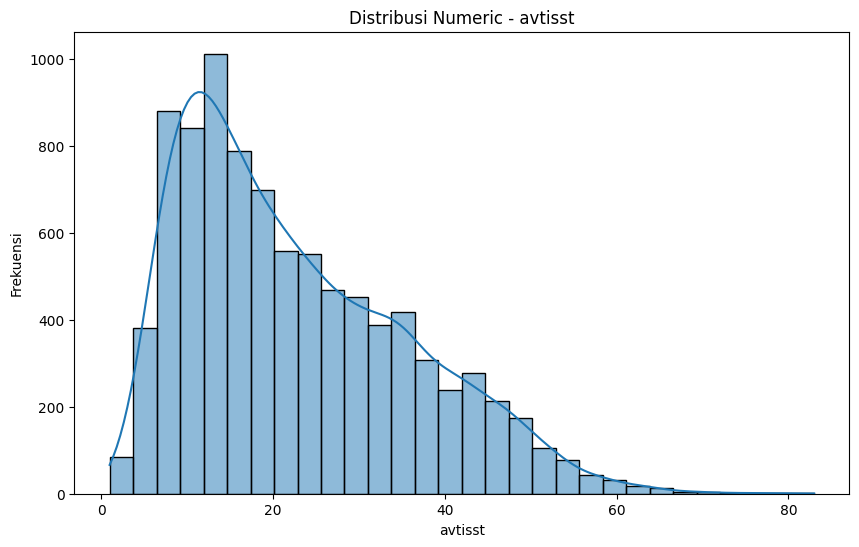

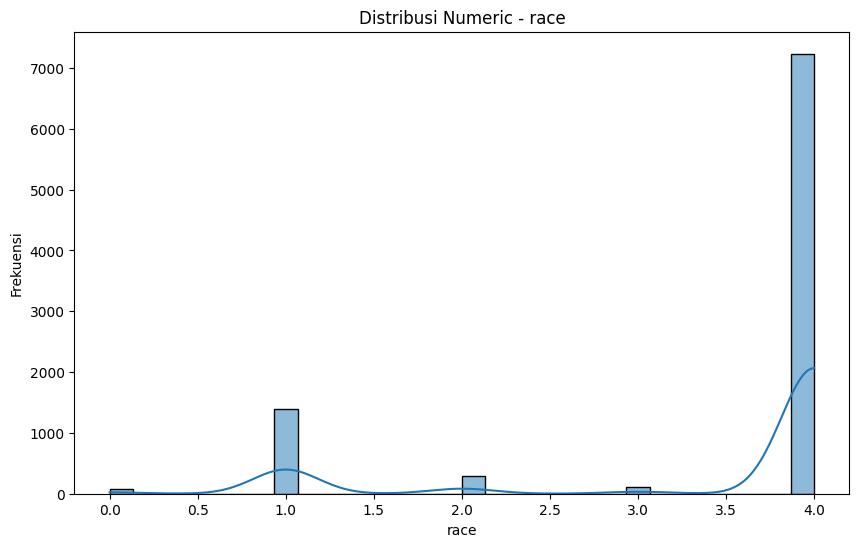

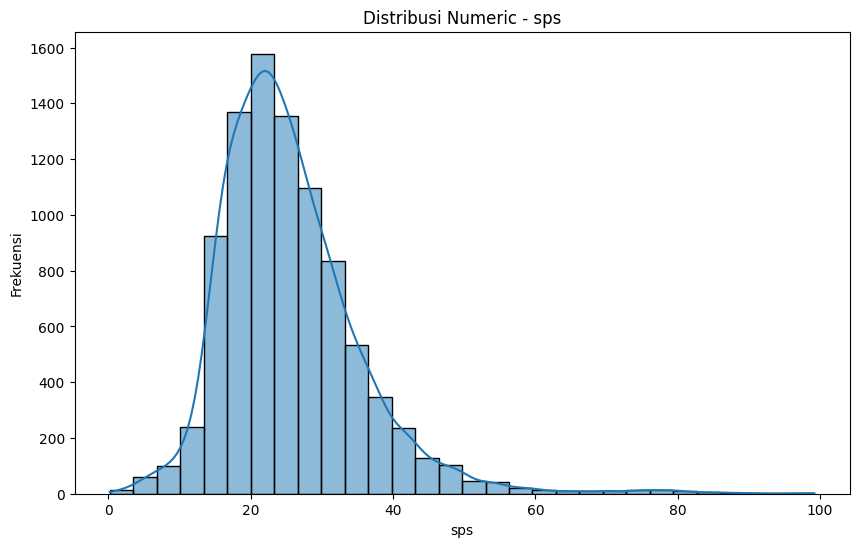

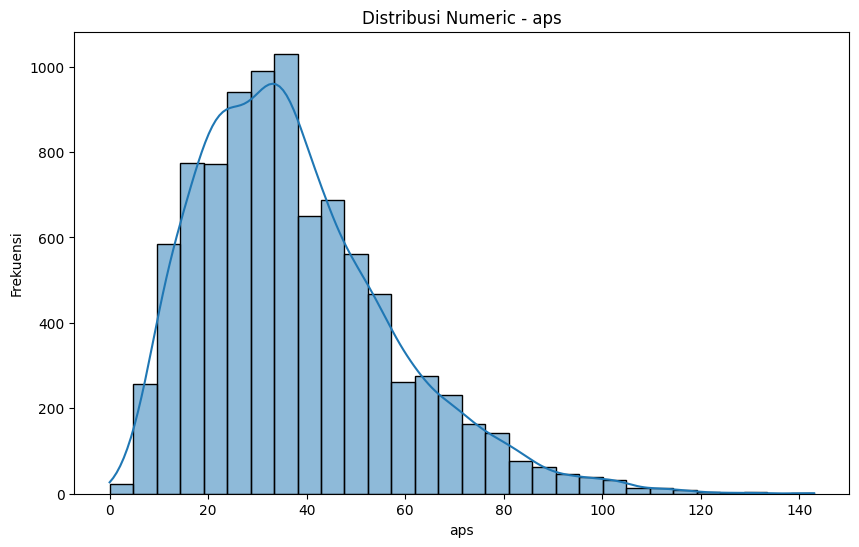

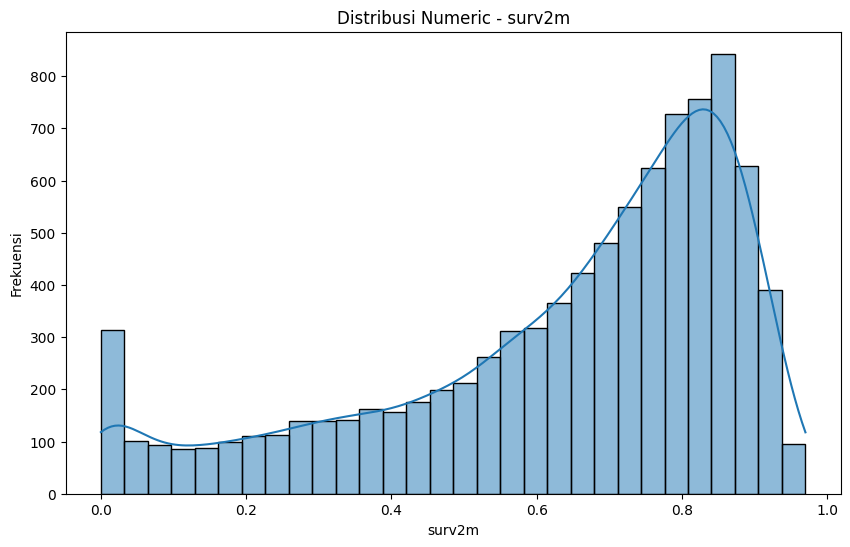

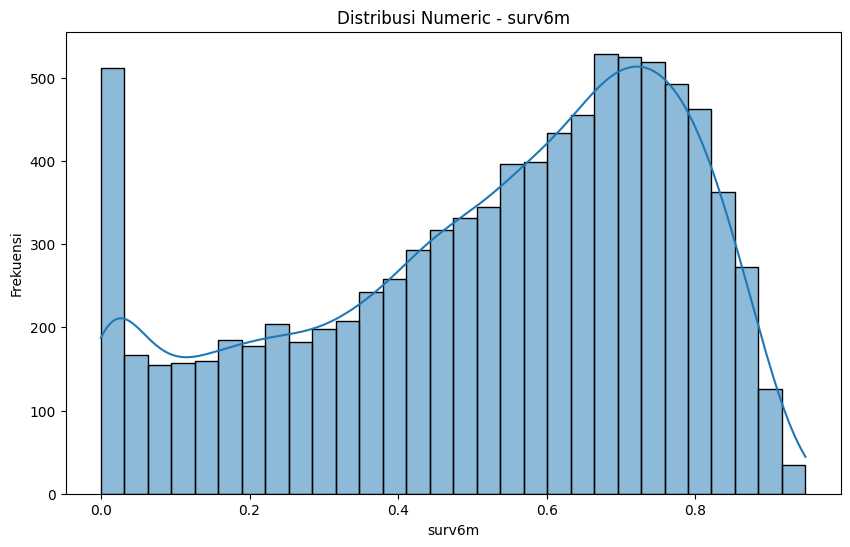

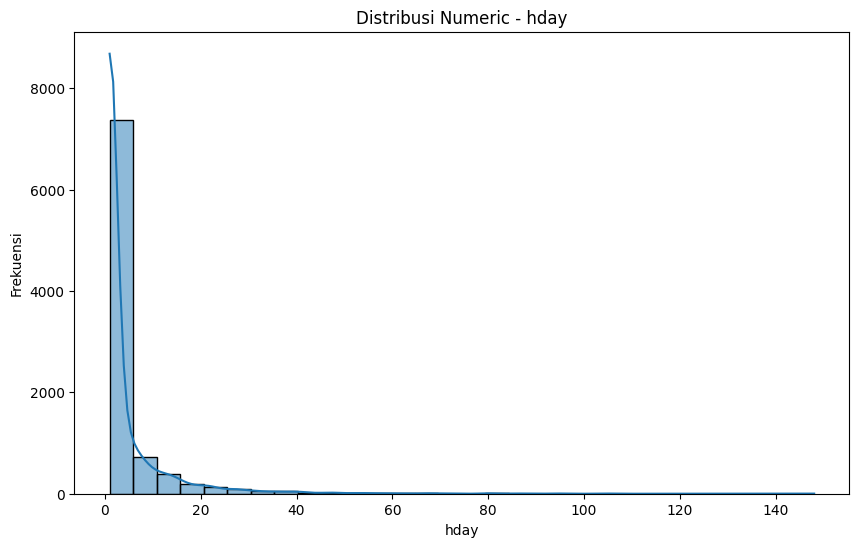

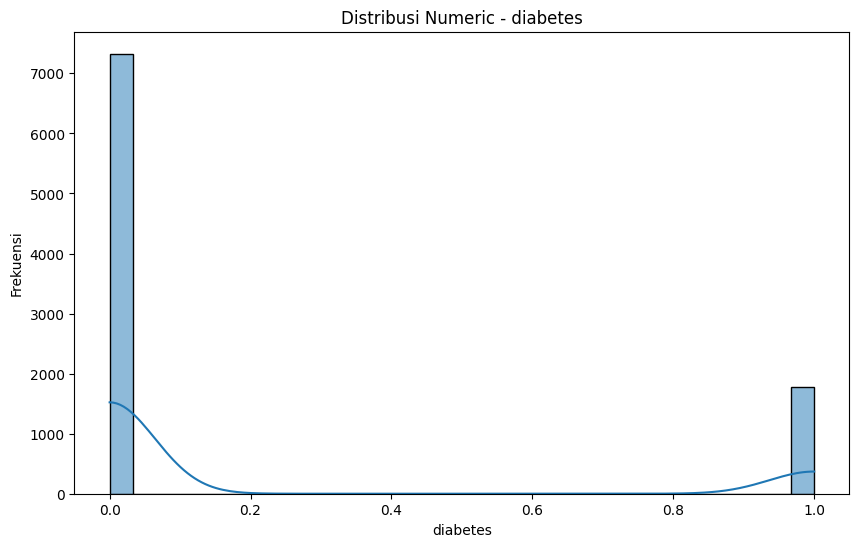

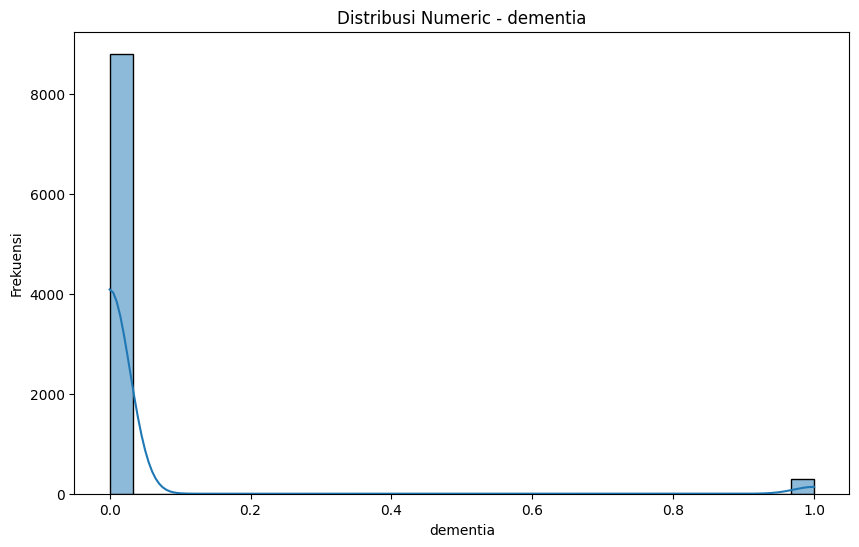

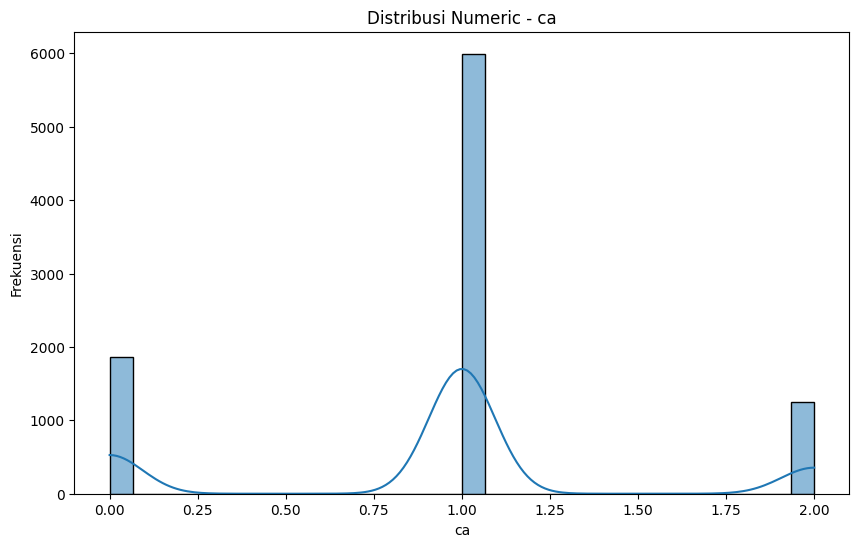

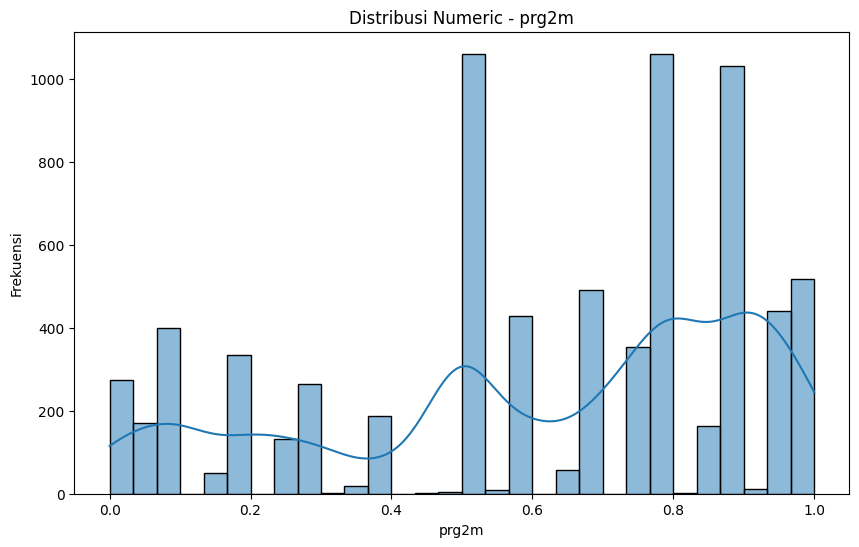

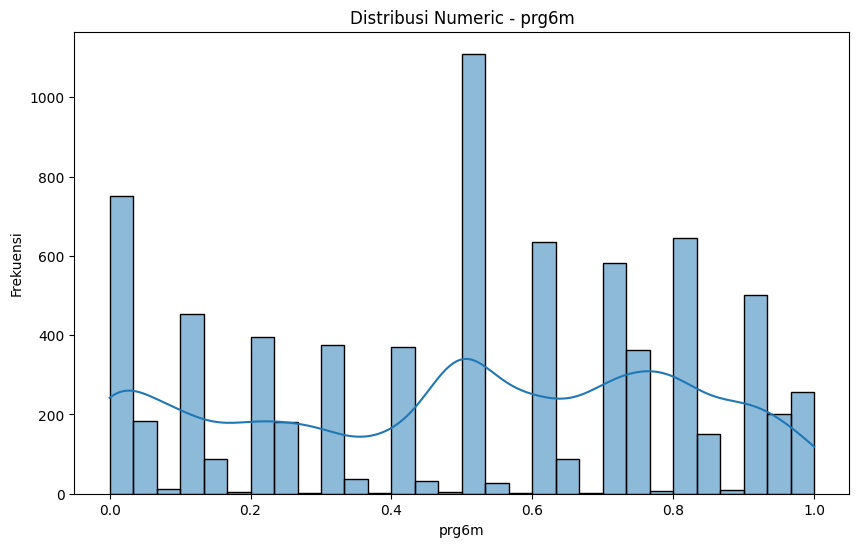

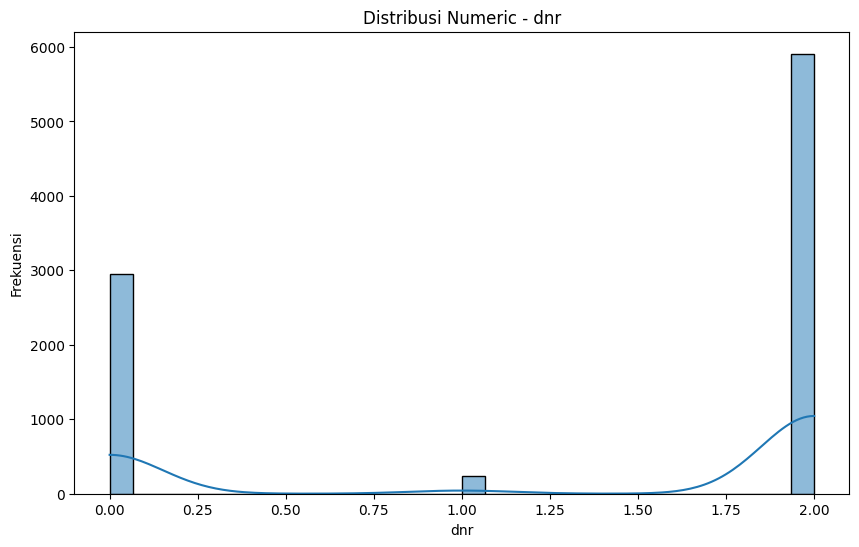

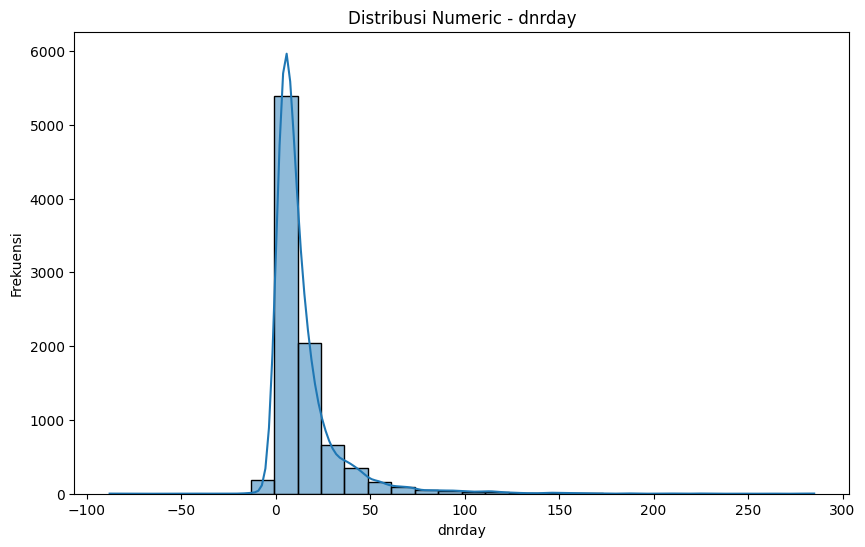

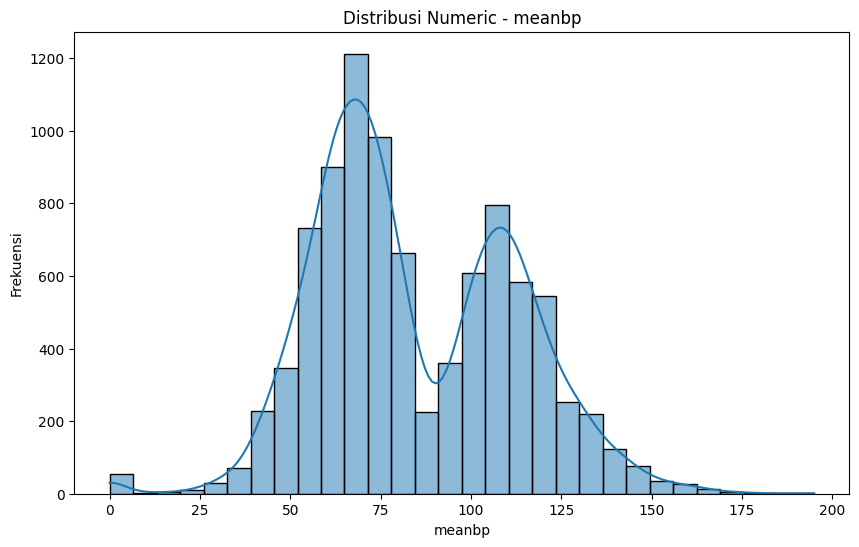

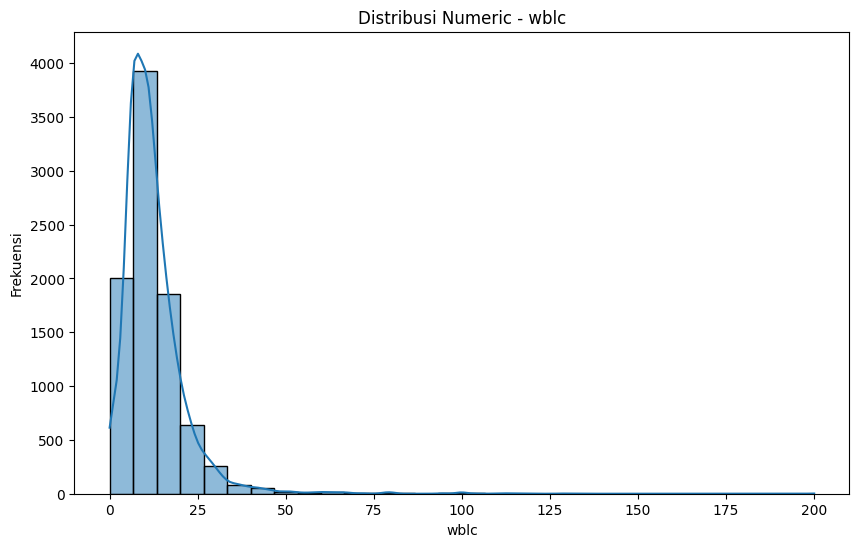

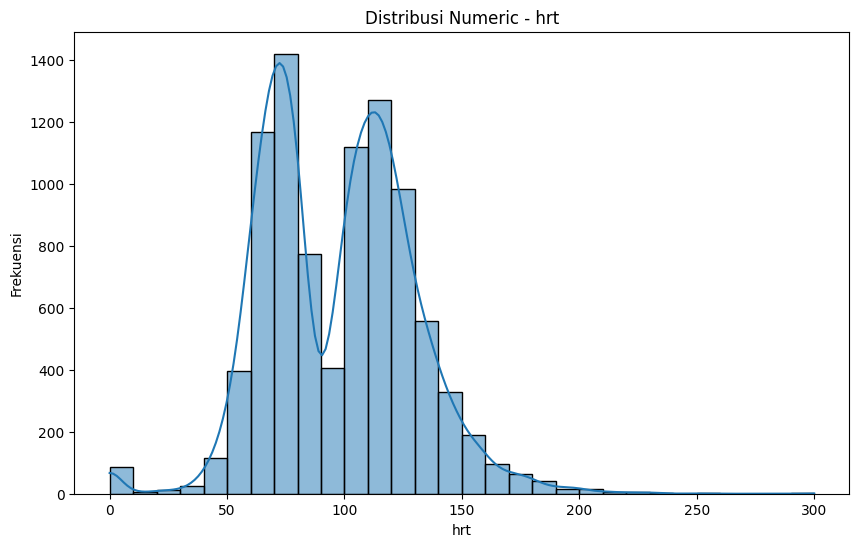

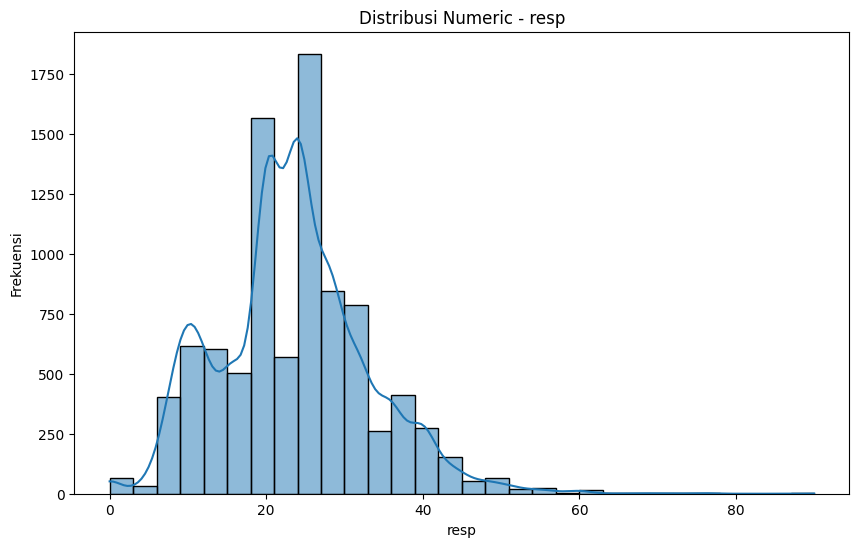

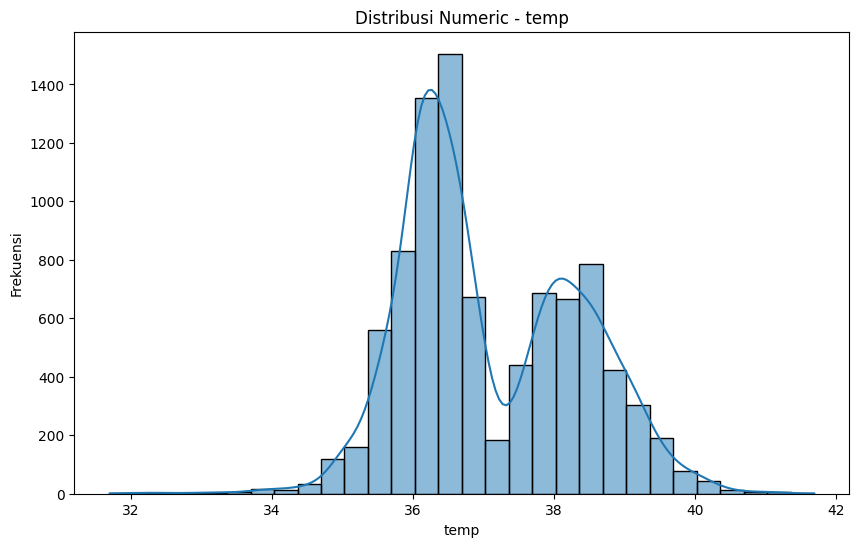

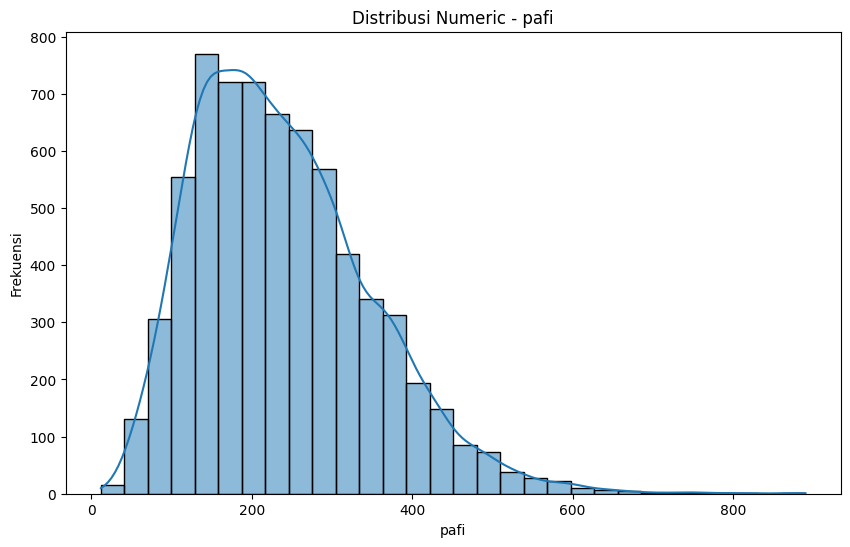

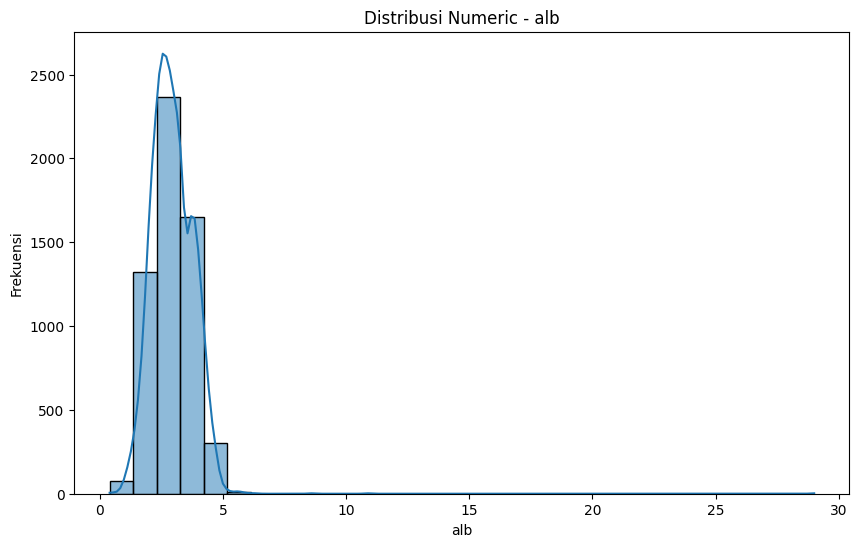

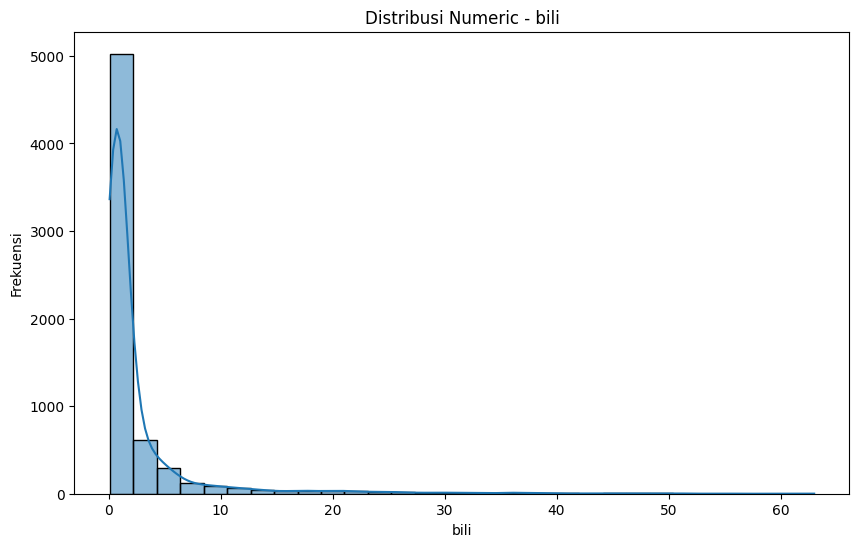

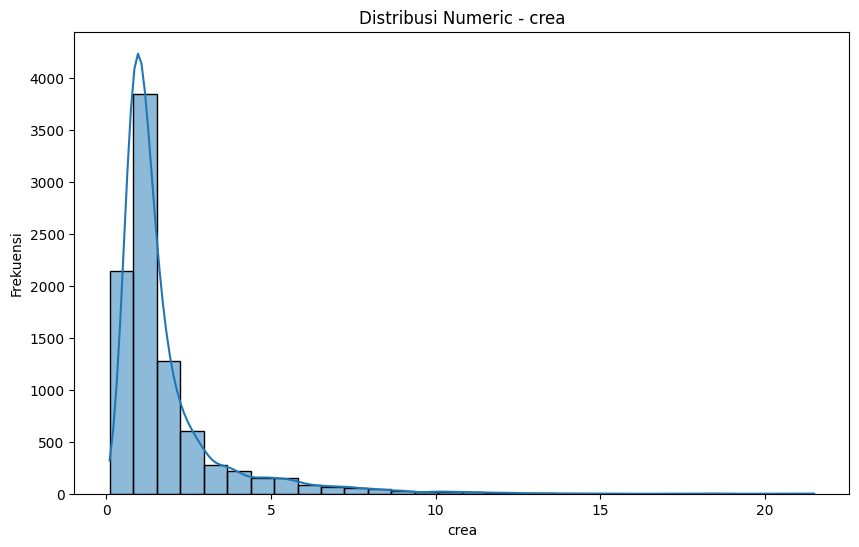

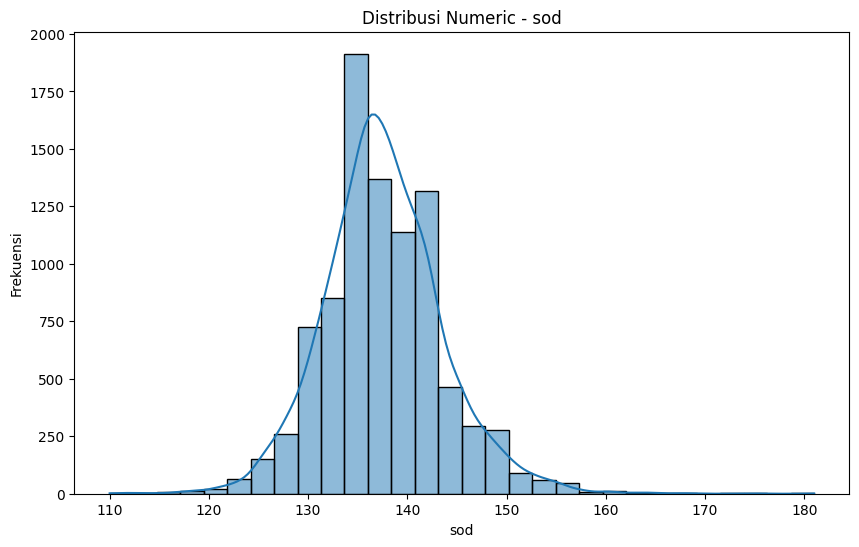

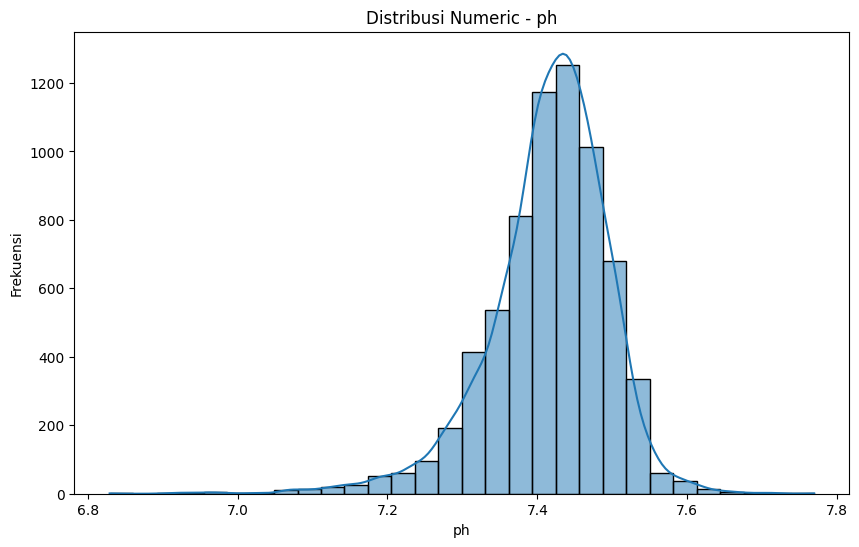

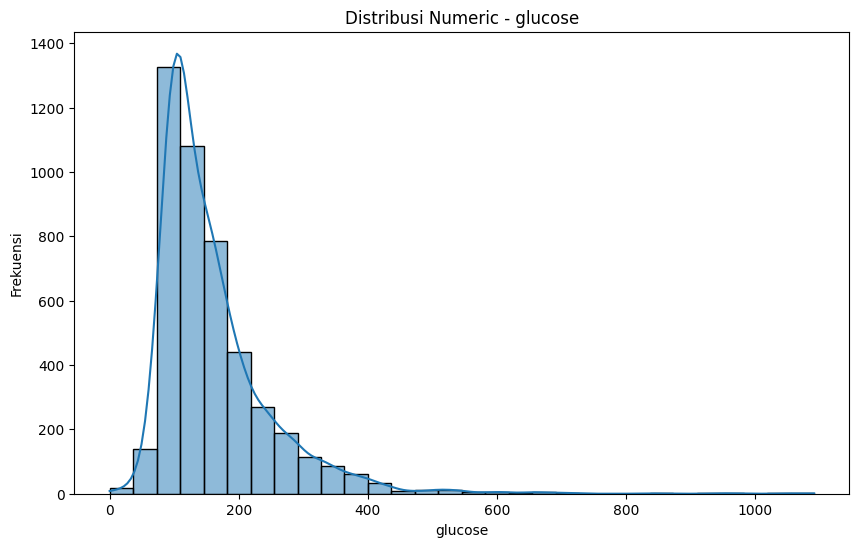

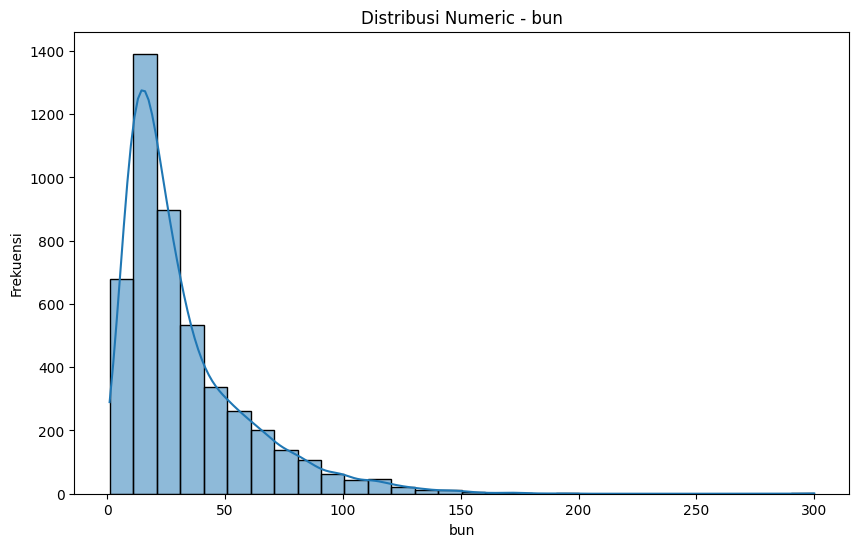

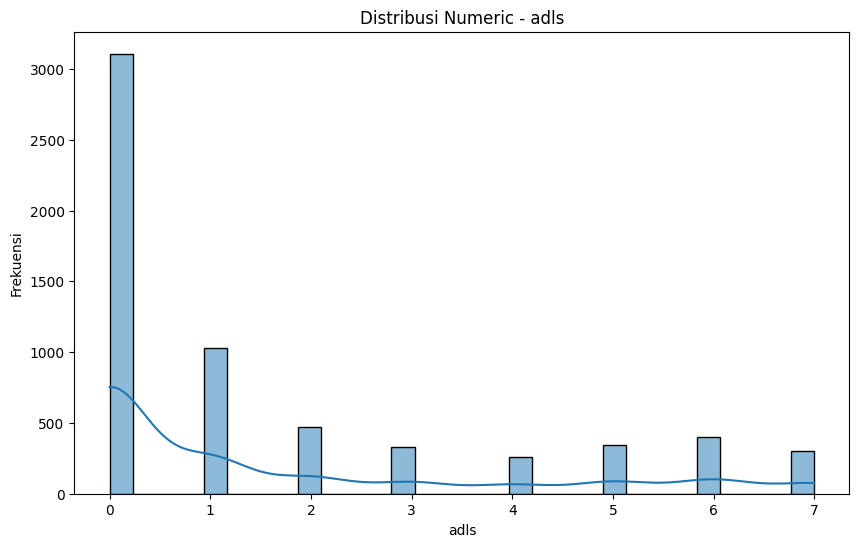

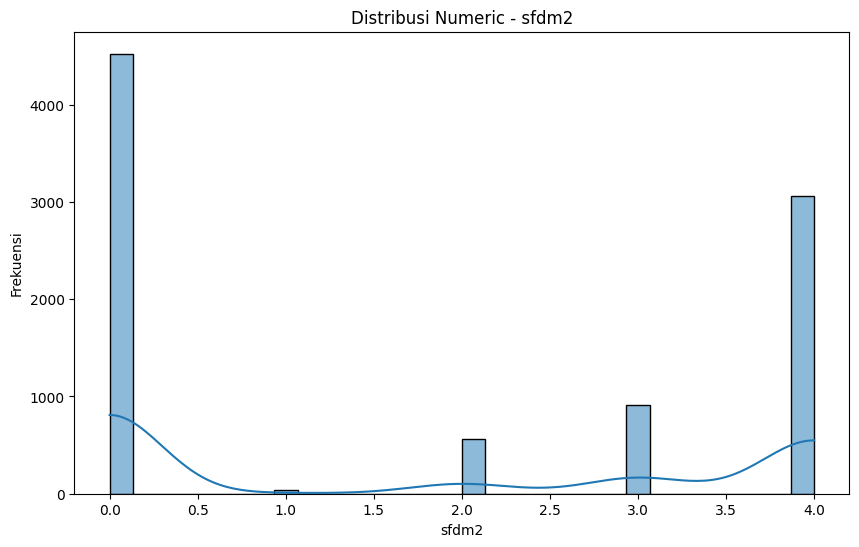

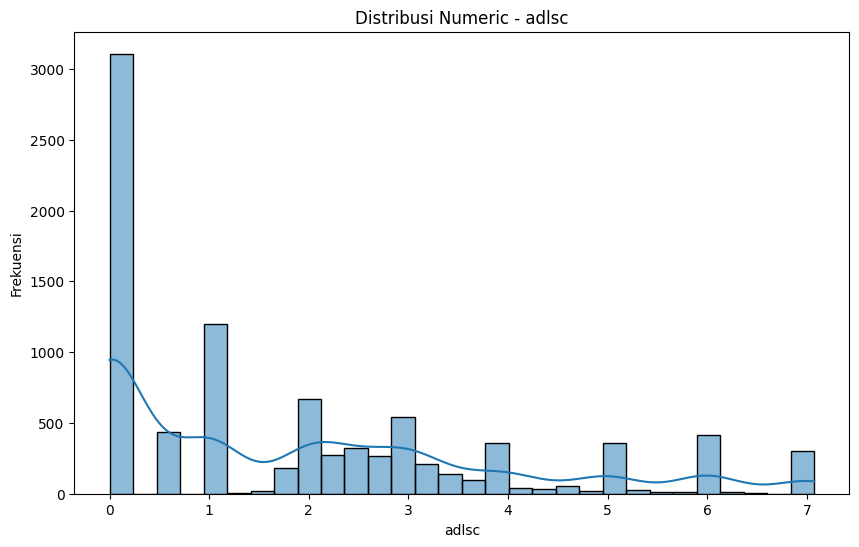

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


for col in df.columns:
    plt.figure(figsize=(10, 6))


    if df[col].dtype == 'object':
        sns.countplot(x=col, data=df)
        plt.title(f'Distribusi Categorical - {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
    else:
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribusi Numeric - {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')

    plt.show()

inisialisasi kolom numerik

In [ ]:
numeric = df.select_dtypes(include=['int64', 'float64'])
numeric

id       age  death  sex  hospdead  slos  d.time  dzgroup  dzclass  \
0        1  62.84998      0    1         0     5    2029        6        2   
1        2  60.33899      1    0         1     4       4        3        1   
2        3  52.74698      1    0         0    17      47        3        1   
3        4  42.38498      1    0         0     3     133        6        2   
4        5  79.88495      0    0         0    16    2029        0        0   
...    ...       ...    ...  ...       ...   ...     ...      ...      ...   
9100  9101  66.07300      0    1         0    23     350        0        0   
9101  9102  55.15399      0    0         0    29     347        5        3   
9102  9103  70.38196      0    1         0     8     346        0        0   
9103  9104  47.01999      1    1         1     7       7        7        0   
9104  9105  81.53894      1    0         0    12     198        0        0   

      num.co  ...       alb      bili      crea    sod        ph  glucose  \
0          0  ...  1.799805  0.199982  1.199951  141.0  7.459961      NaN   
1          2  ...       NaN       NaN  5.500000  132.0  7.250000      NaN   
2          2  ...       NaN  2.199707  2.000000  134.0  7.459961      NaN   
3          2  ...       NaN       NaN  0.799927  139.0       NaN      NaN   
4          1  ...       NaN       NaN  0.799927  143.0  7.509766      NaN   
...      ...  ...       ...       ...       ...    ...       ...      ...   
9100       1  ...  3.699707  0.399963  1.099854  131.0  7.459961    188.0   
9101       1  ...       NaN       NaN  5.899414  135.0  7.289062    190.0   
9102       1  ...       NaN  0.399963  2.699707  139.0  7.379883    189.0   
9103       1  ...  1.199951  0.399963  3.500000  135.0  7.469727    246.0   
9104       1  ...  4.500000  0.599976  1.199951  137.0  7.289062    187.0   

       bun  adls  sfdm2     adlsc  
0      NaN   7.0      0  7.000000  
1      NaN   1.0      0  1.000000  
2      NaN   0.0      0  0.000000  
3      NaN   0.0      4  0.000000  
4      NaN   2.0      4  2.000000  
...    ...   ...    ...       ...  
9100  21.0   0.0      0  0.000000  
9101  49.0   0.0      0  0.000000  
9102  60.0   NaN      0  2.525391  
9103  55.0   0.0      0  0.000000  
9104  15.0   NaN      4  0.494751  

[9105 rows x 46 columns]

# **MEMBACA GRAFIK**, APAKAH ADA RELASI ANTARA TARGET DENGAN DEATH?


*   pada histogram jika terjadi tumpang tindih antara dua distribusi, maka tidak ada perbedaan yang signifikan. namun, jika tidak ada tumpang tindih, mean dan modusnya terkesan berjauhan, lalu minimnya titik temu antara 2 distribusi maka akan dinyatakan adanya perbedaan yang signifikan



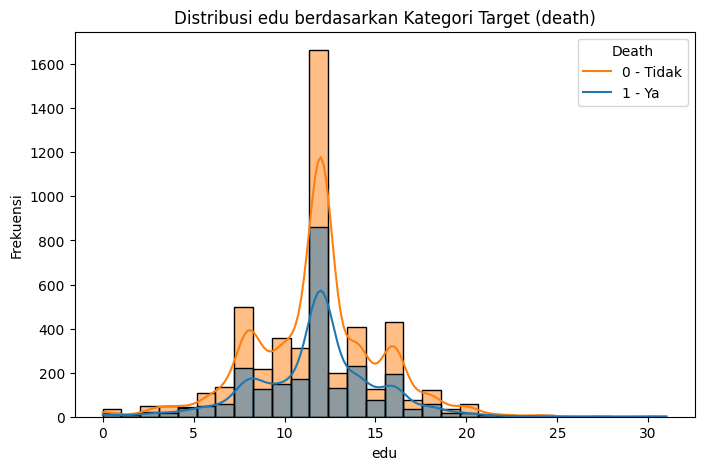

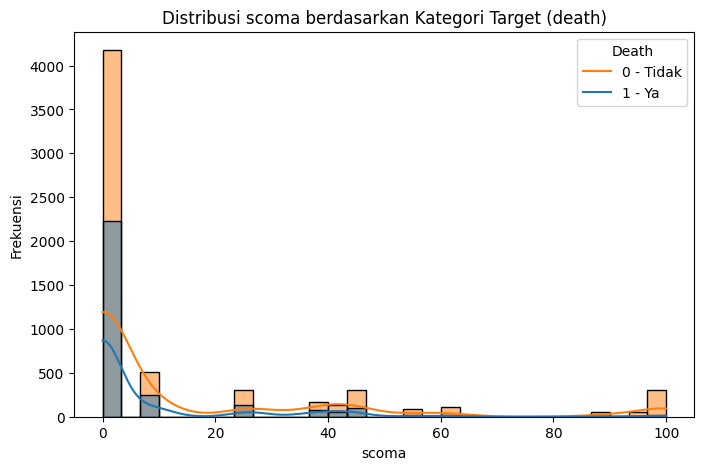

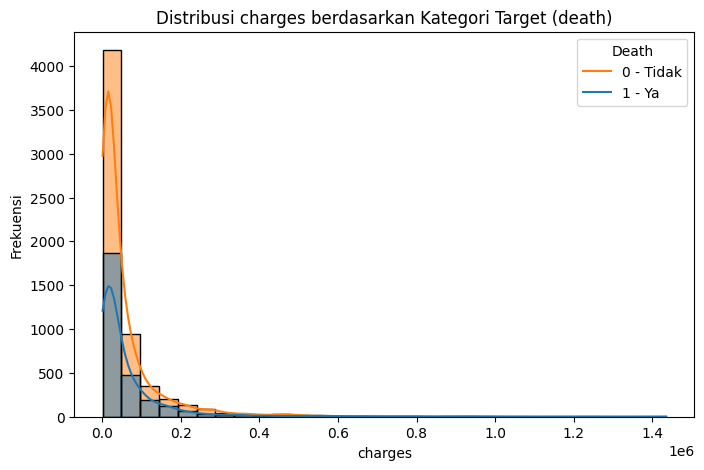

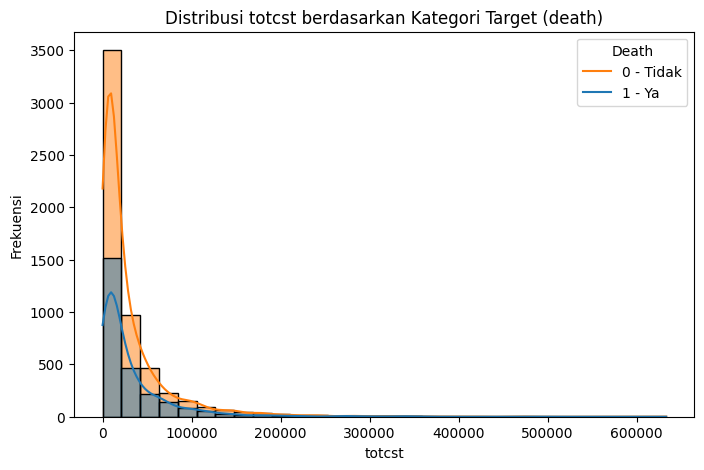

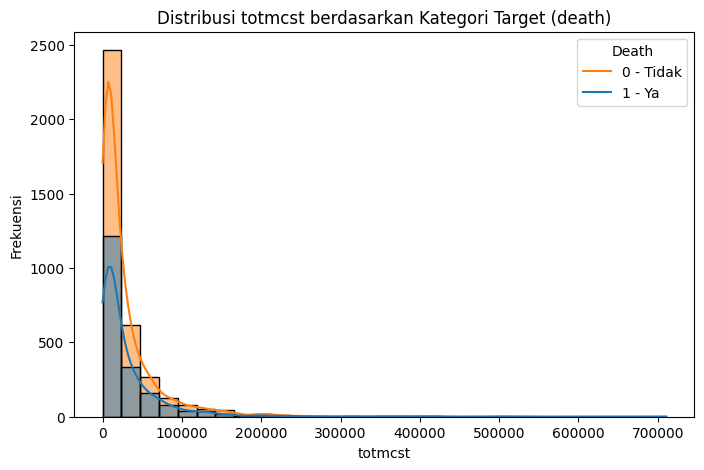

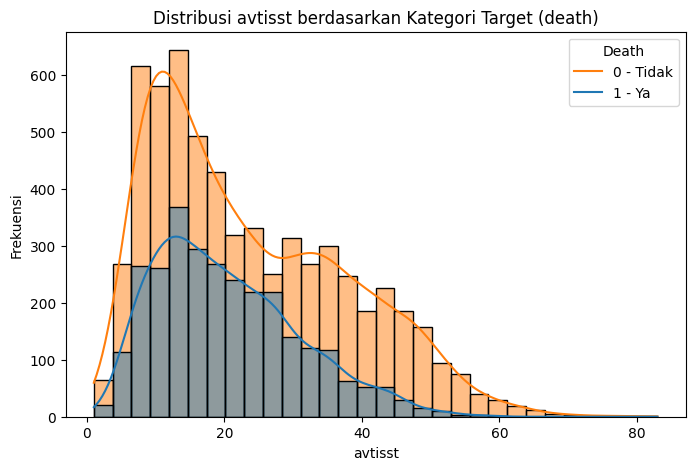

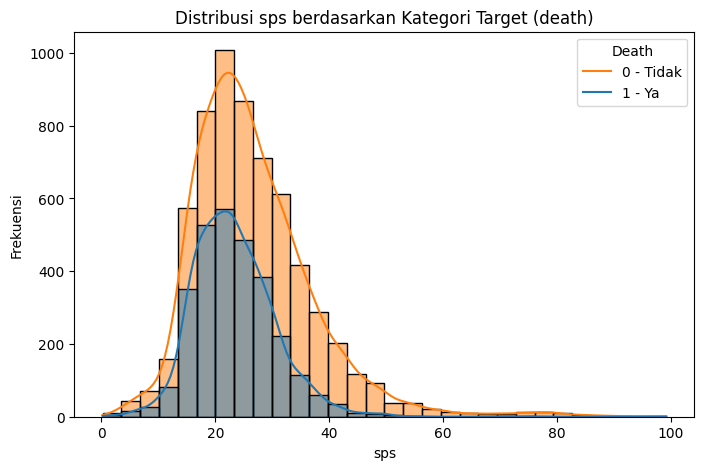

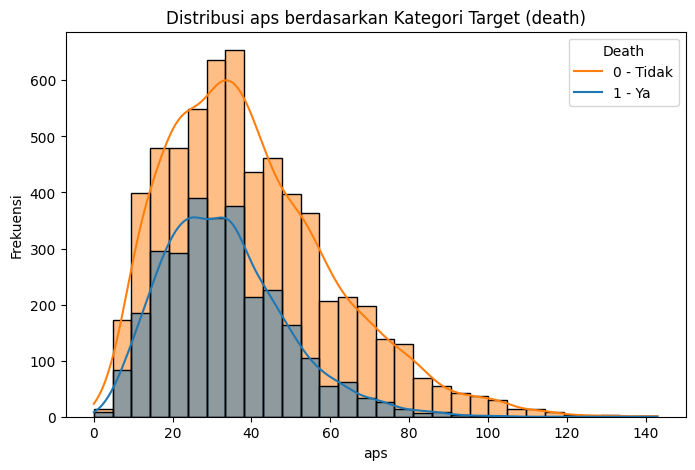

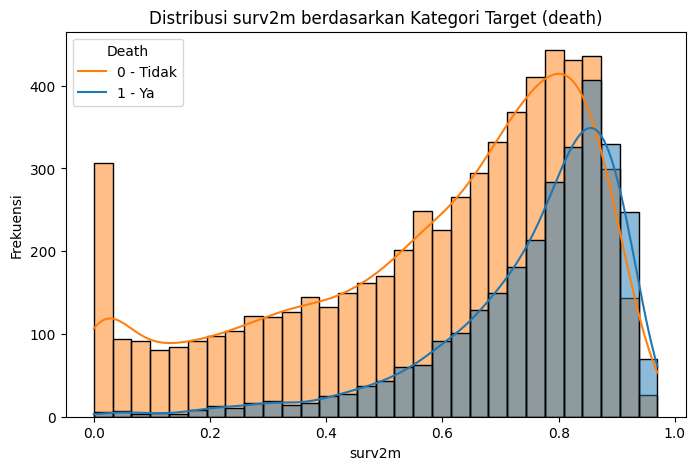

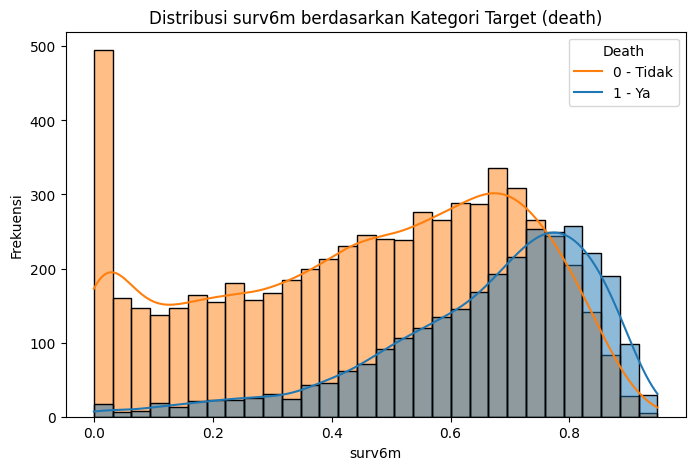

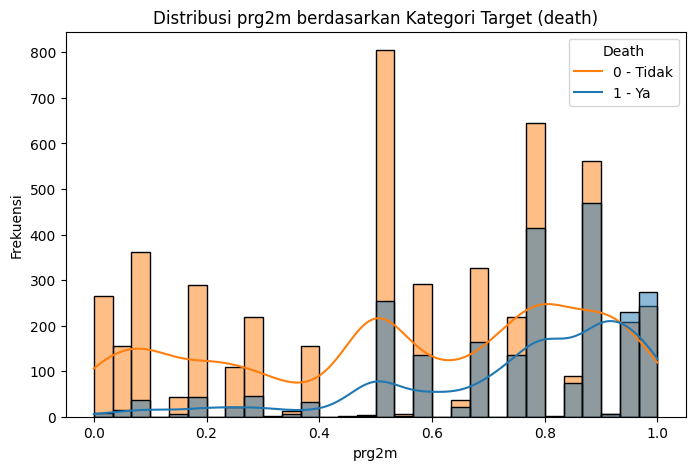

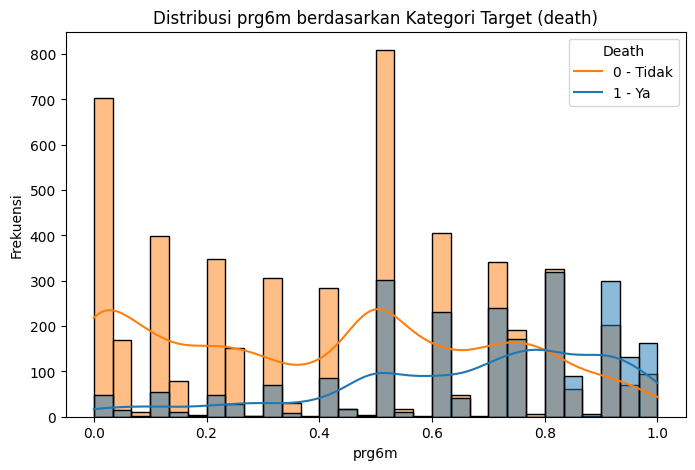

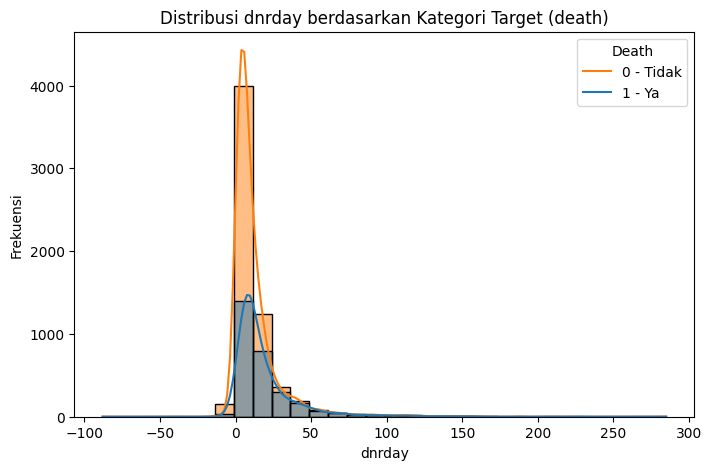

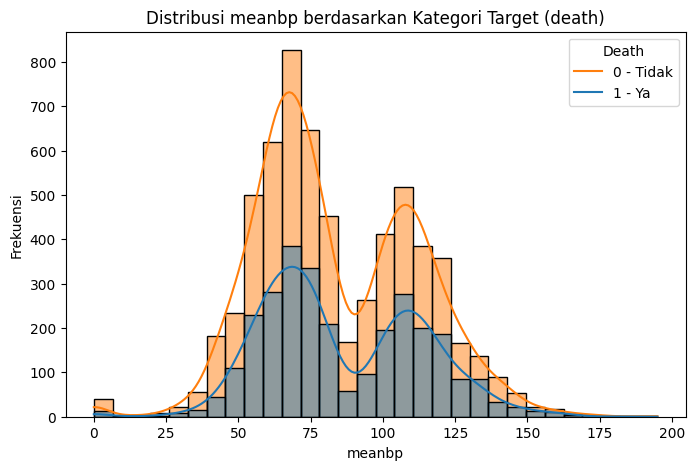

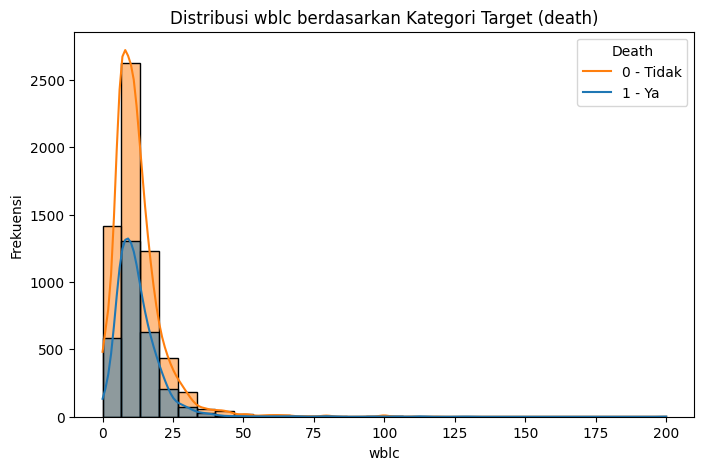

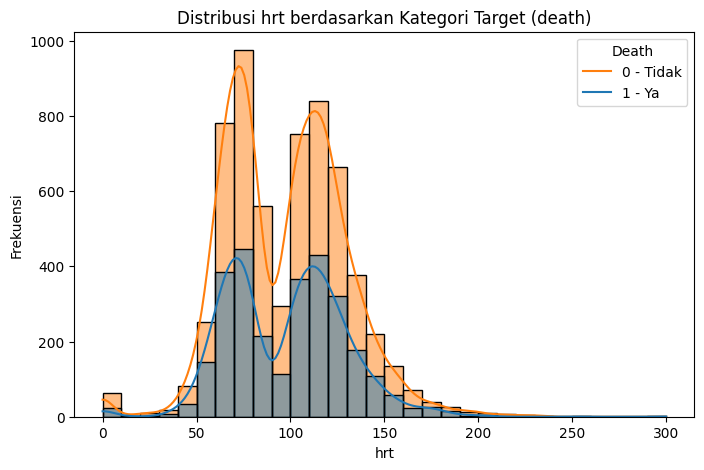

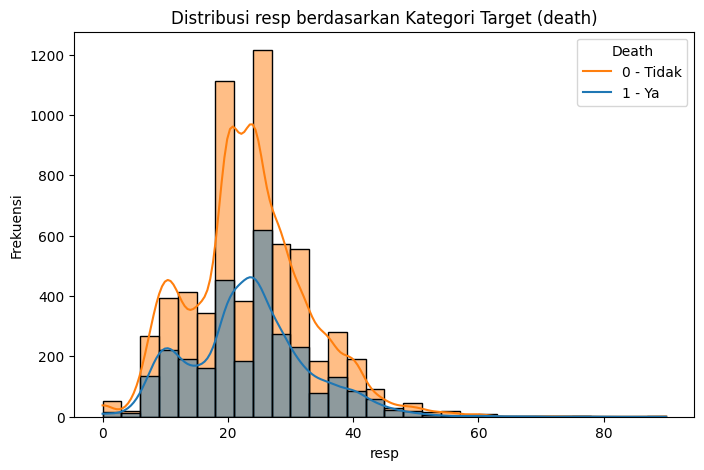

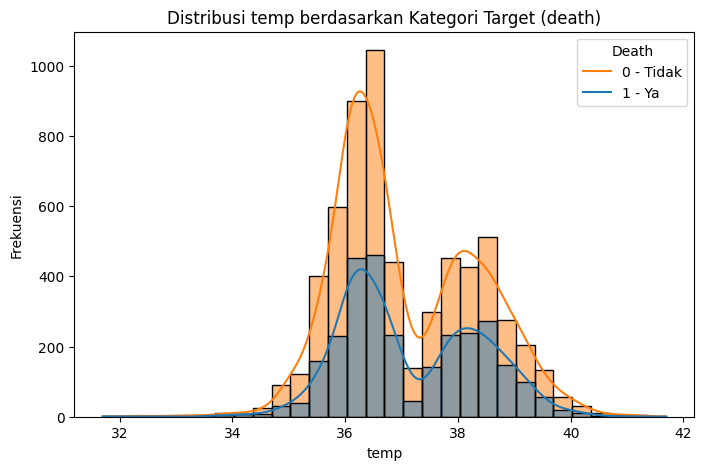

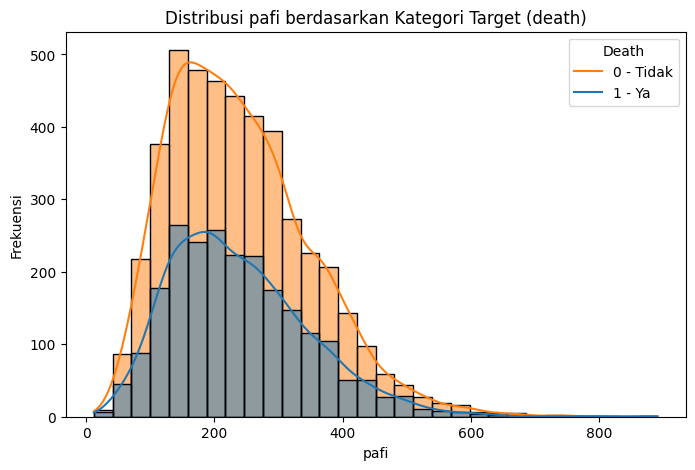

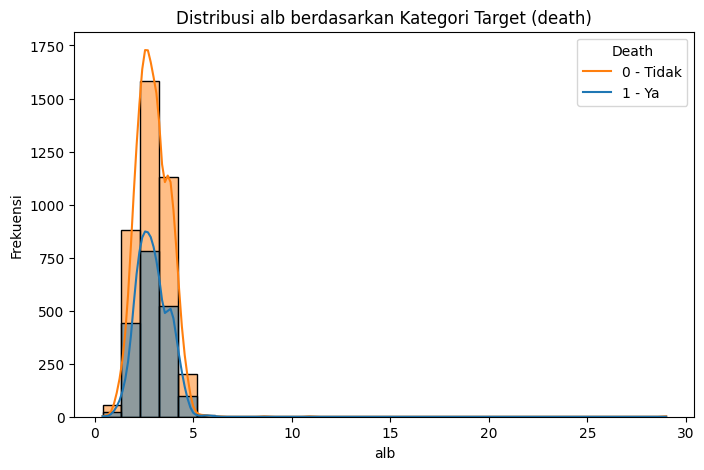

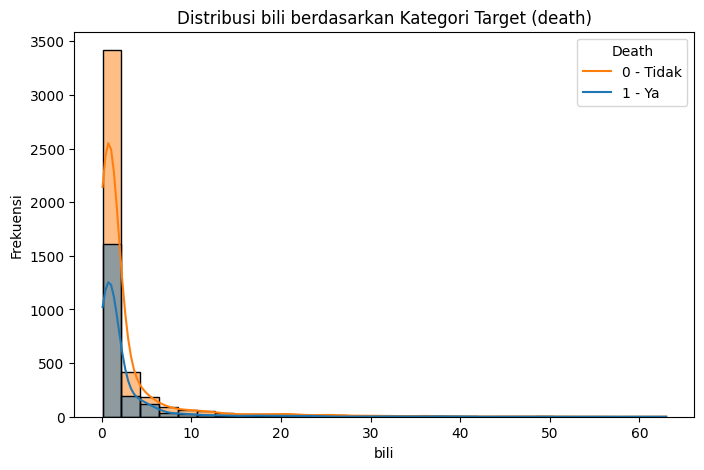

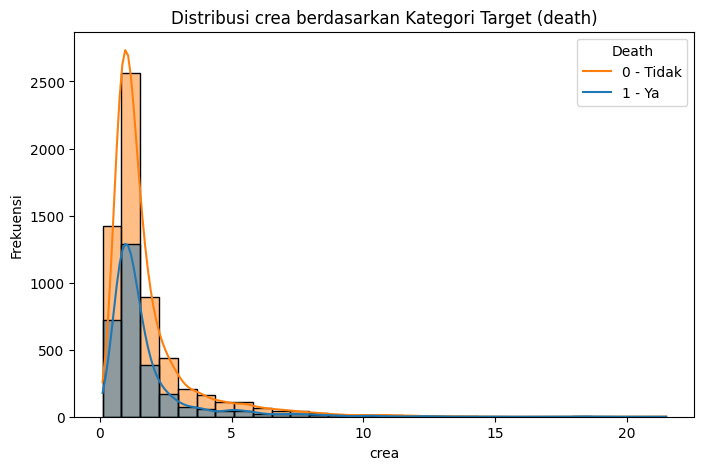

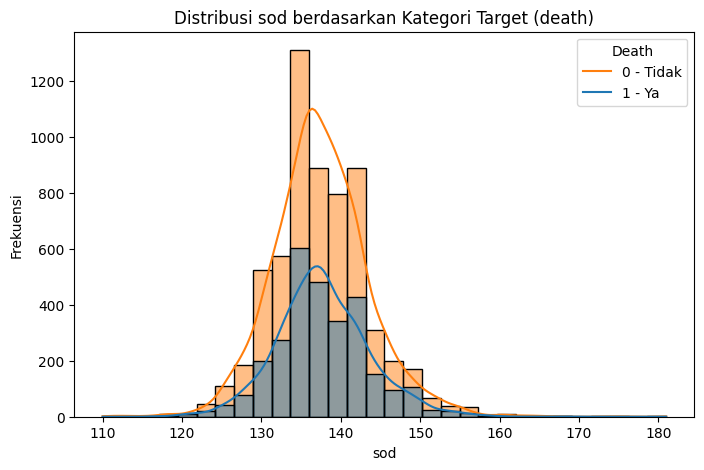

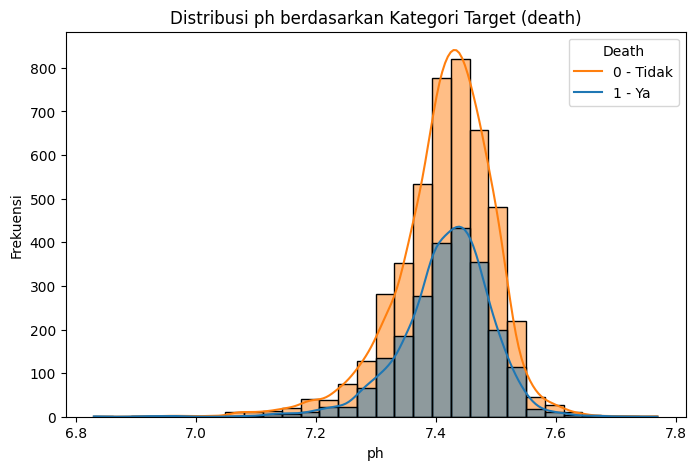

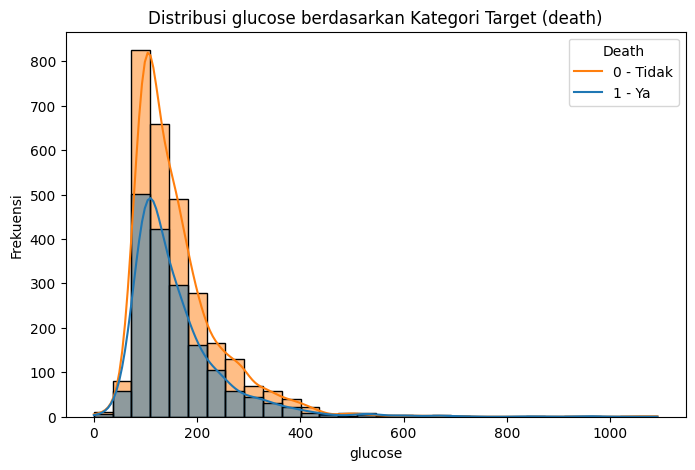

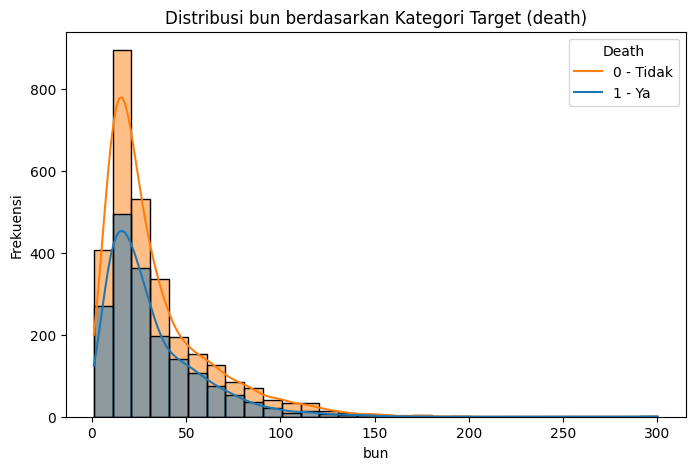

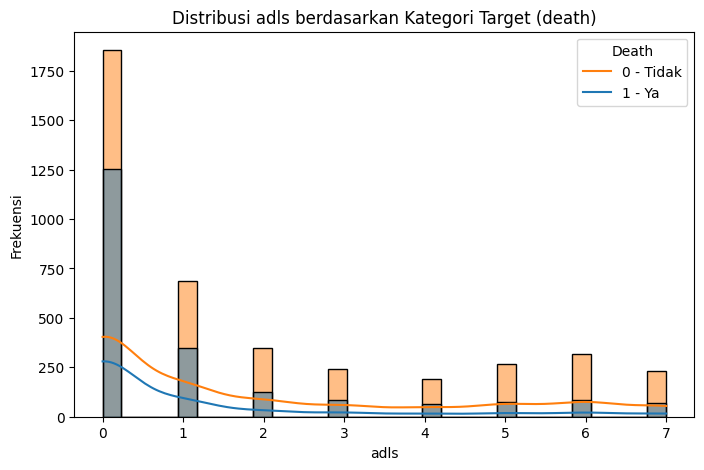

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_impute = numeric.columns[numeric.isna().any()].tolist()

for column in columns_to_impute:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, hue="death", kde=True, bins=30)
    plt.title(f"Distribusi {column} berdasarkan Kategori Target (death)")
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
    plt.legend(title="Death", labels=["0 - Tidak", "1 - Ya"])
    plt.show()

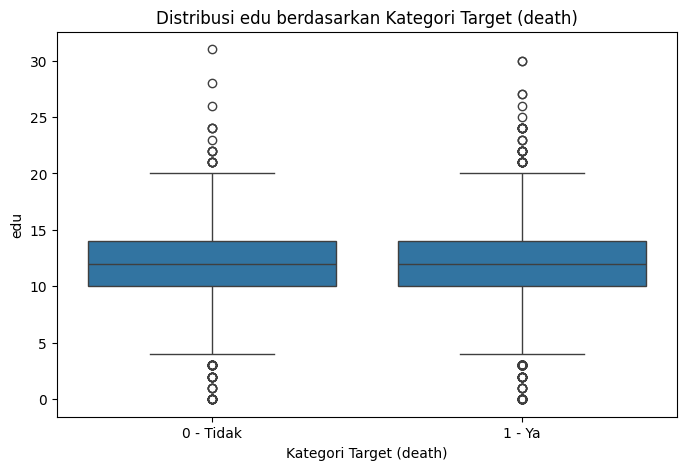

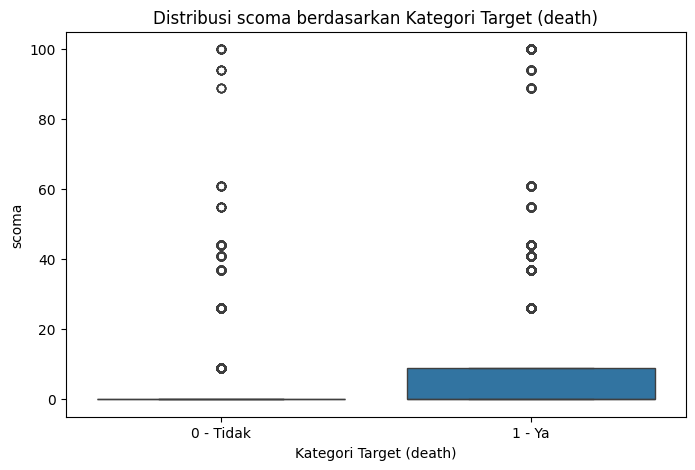

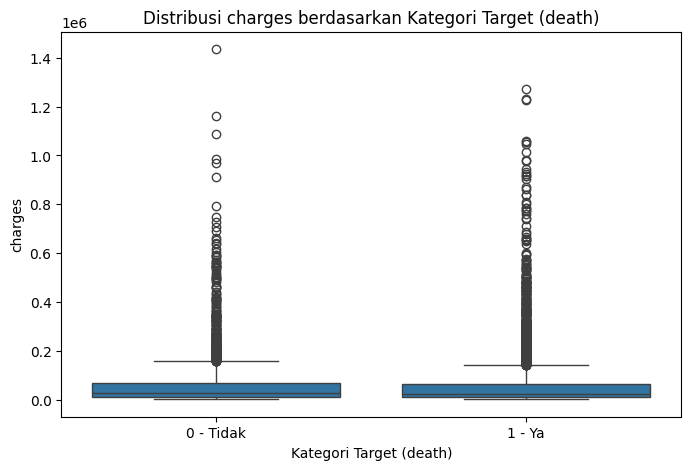

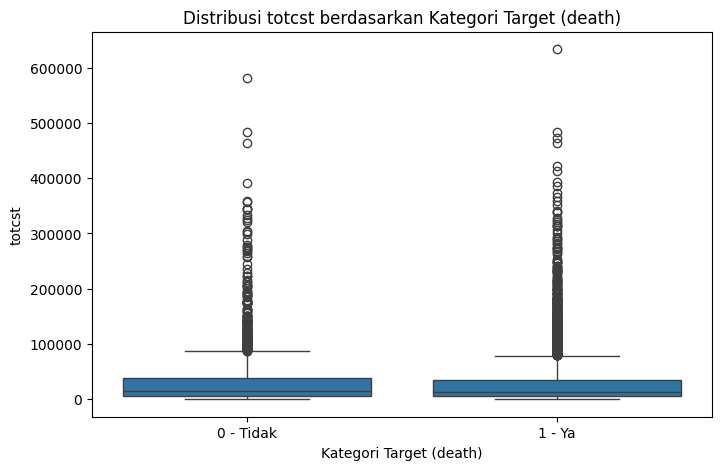

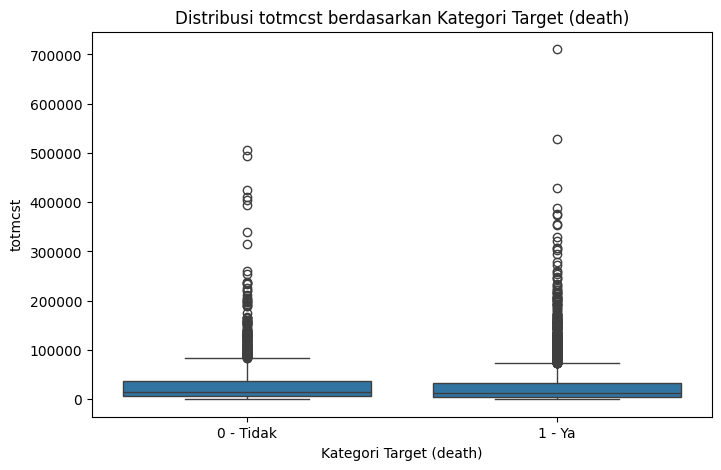

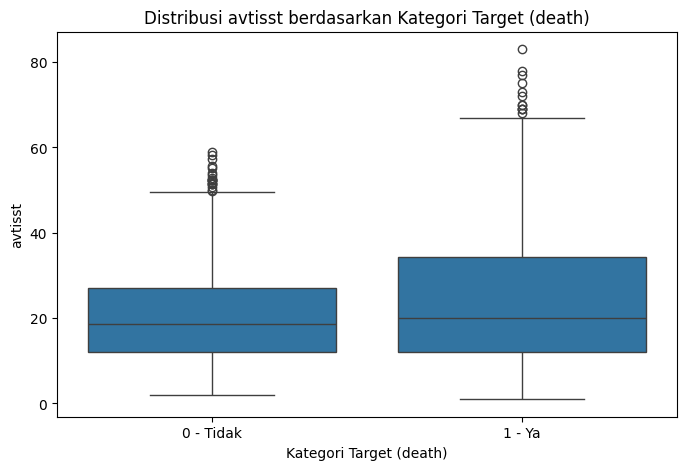

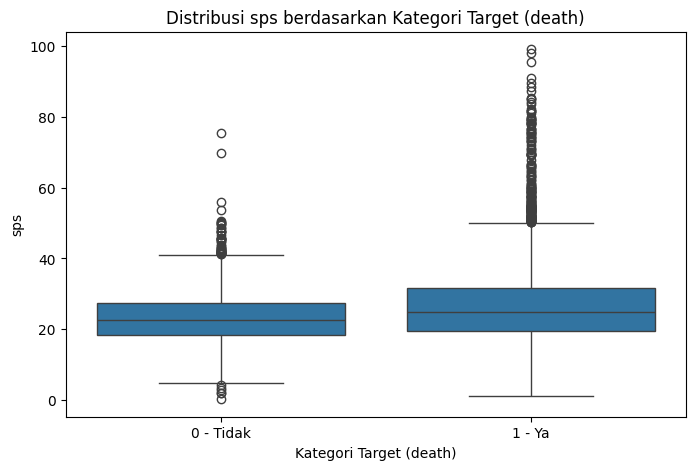

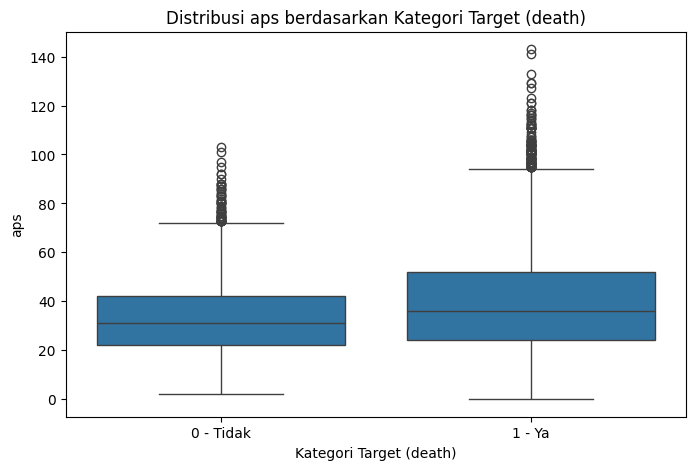

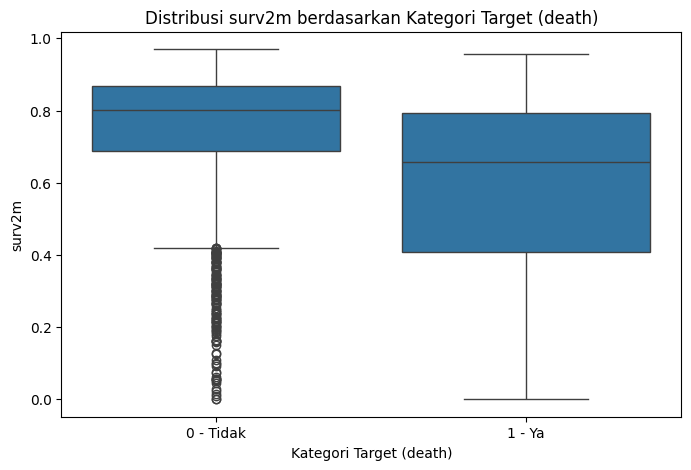

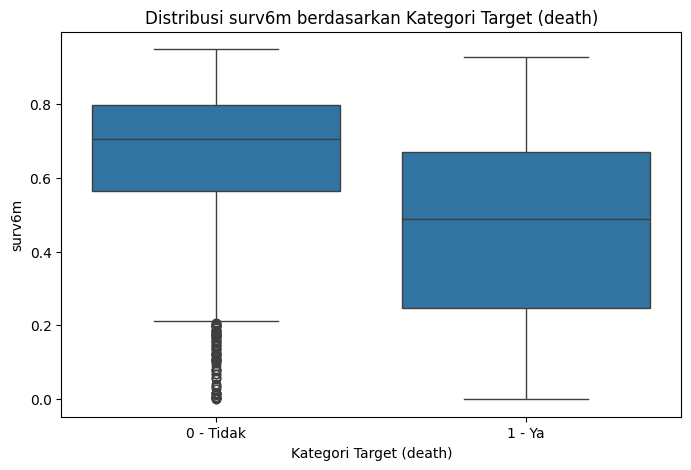

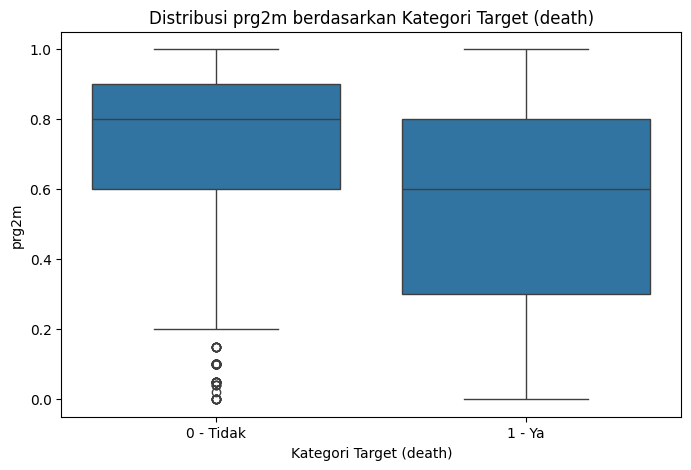

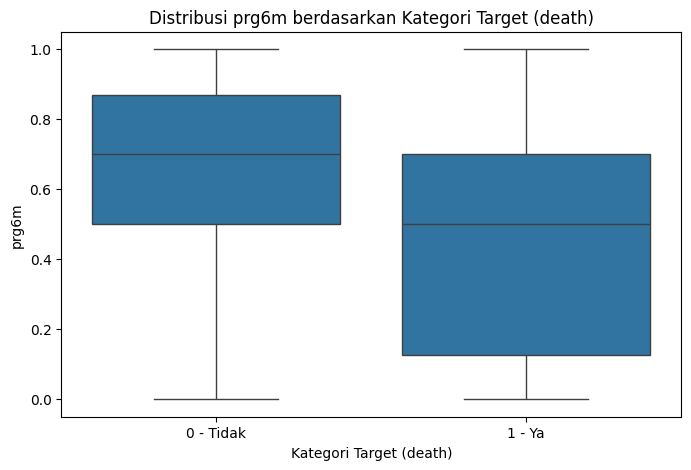

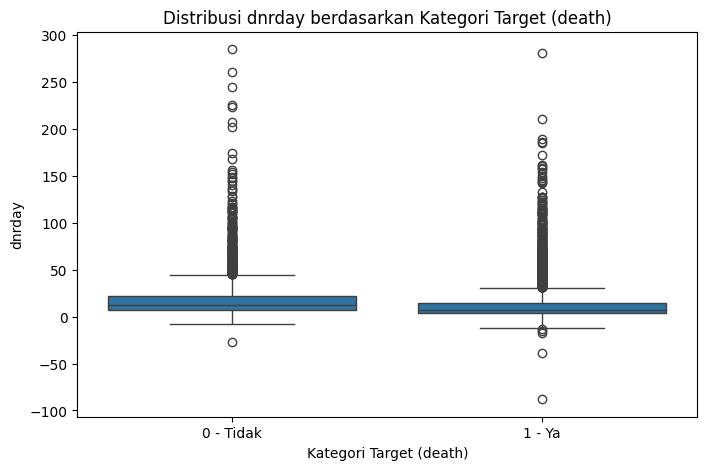

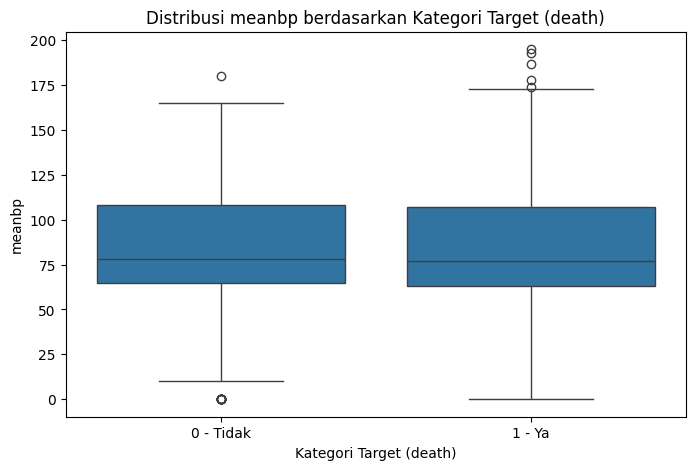

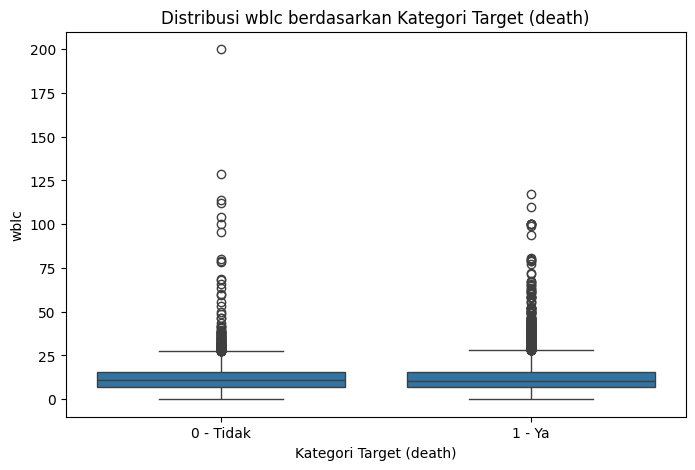

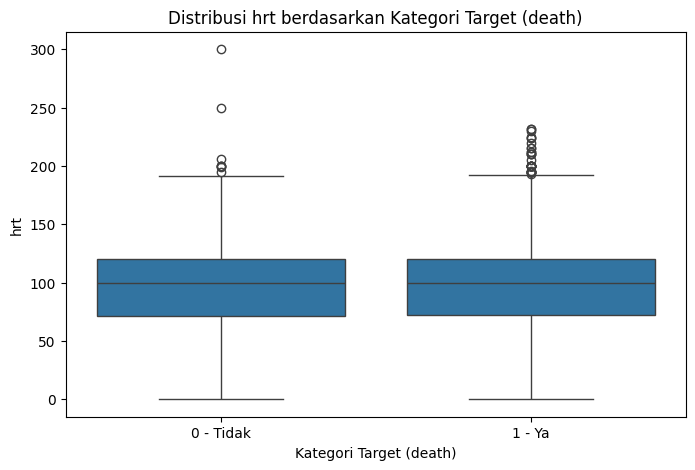

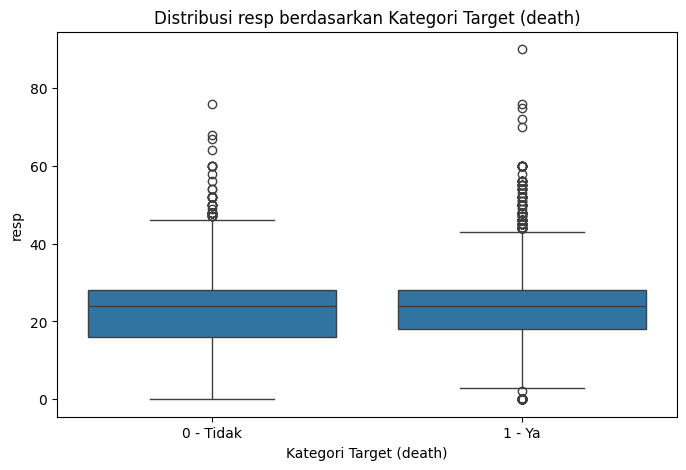

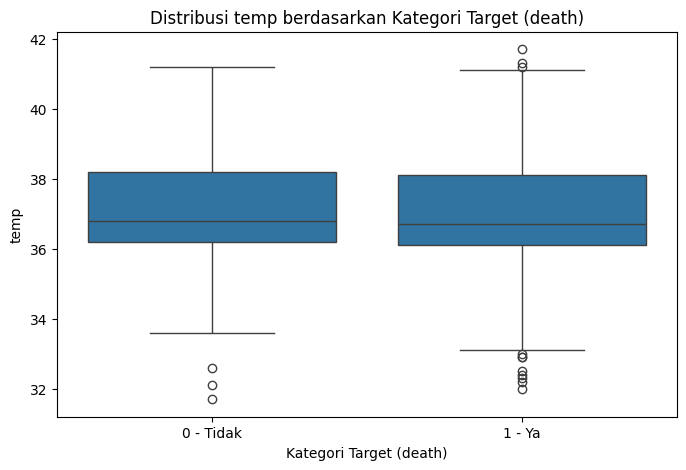

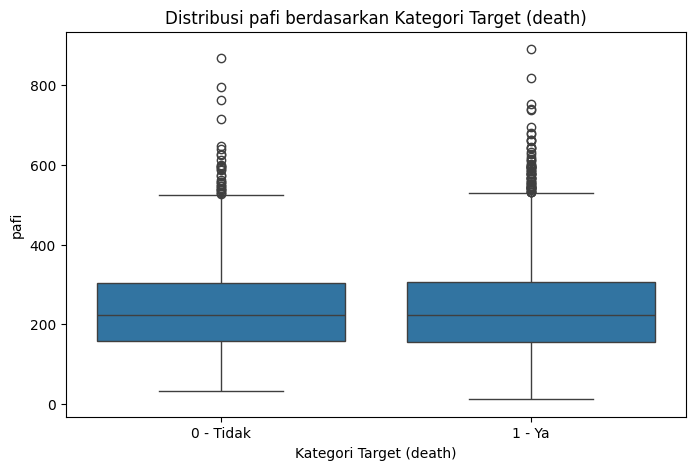

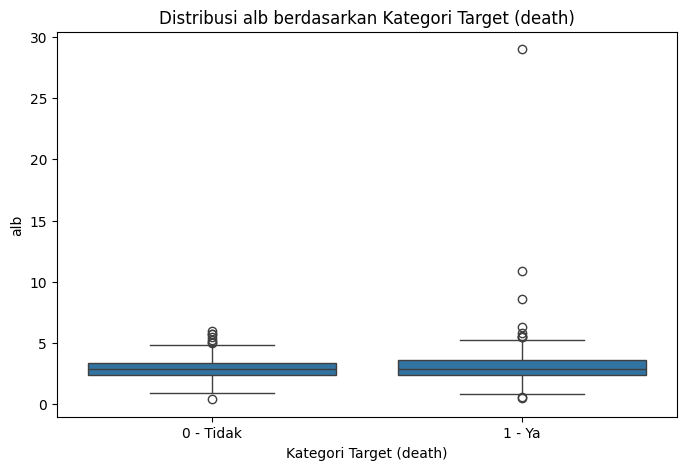

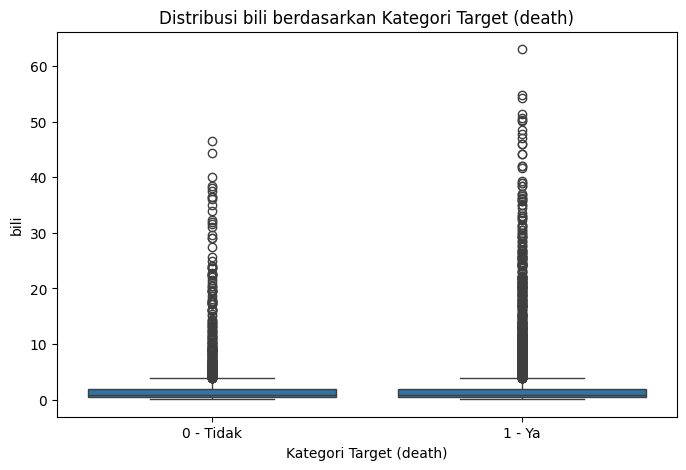

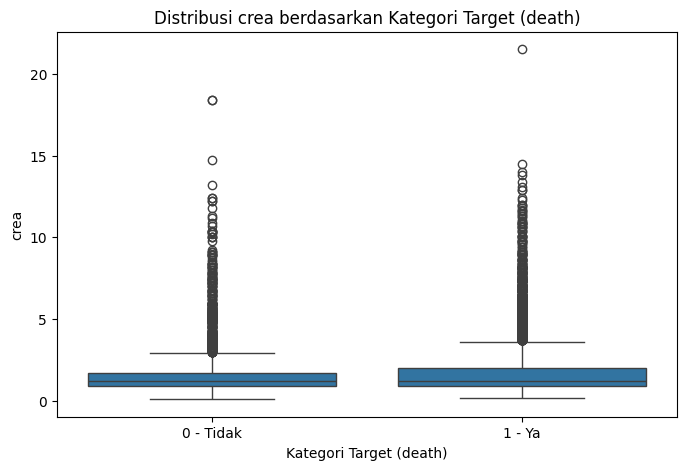

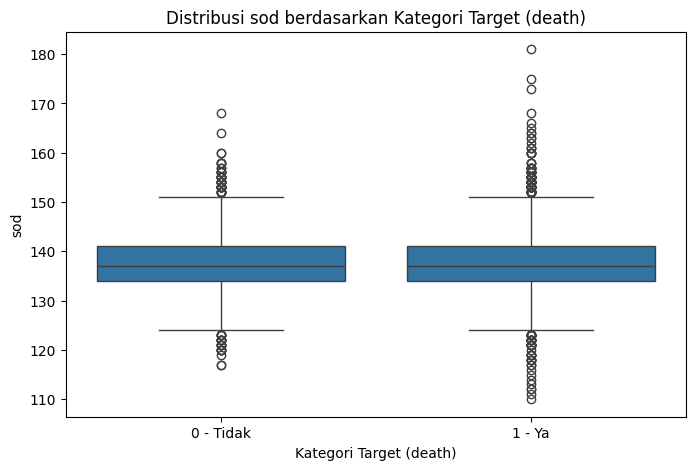

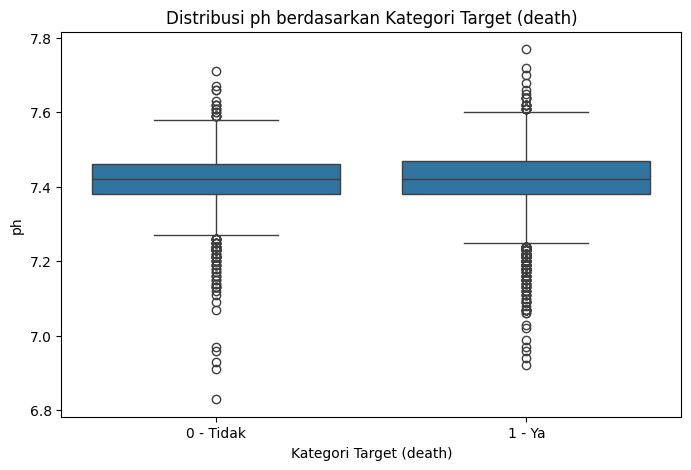

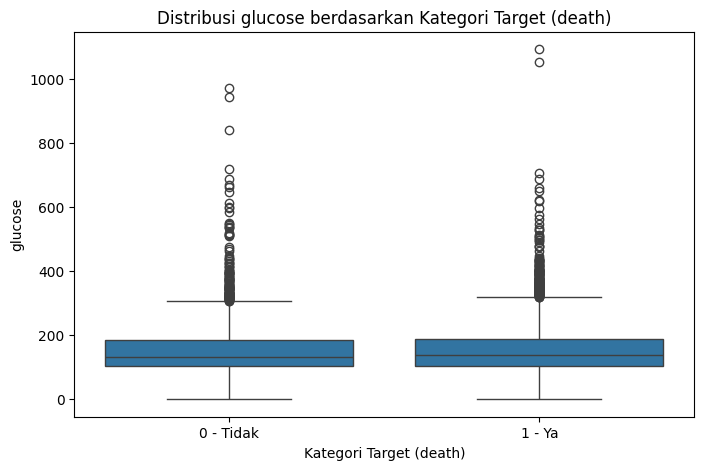

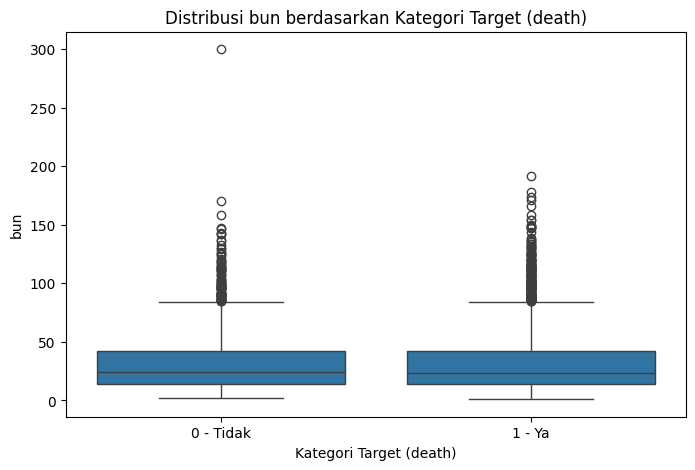

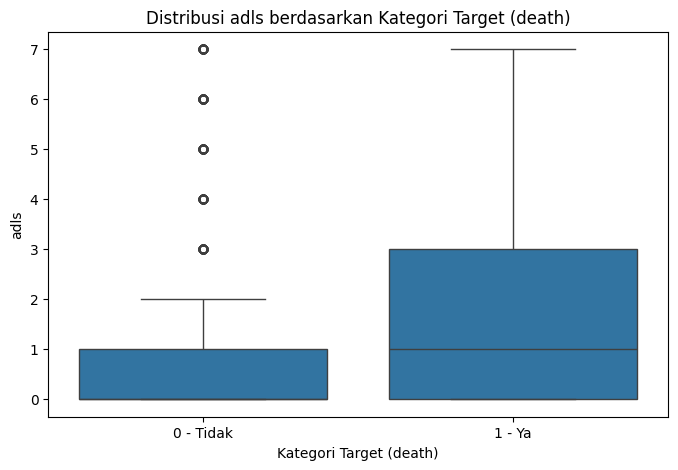

In [ ]:
for column in columns_to_impute:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="death", y=column)
    plt.title(f"Distribusi {column} berdasarkan Kategori Target (death)")
    plt.xlabel("Kategori Target (death)")
    plt.ylabel(column)
    plt.xticks(ticks=[0, 1], labels=["0 - Tidak", "1 - Ya"])
    plt.show()

# **UJI STATISTIK PENGARUH MASING-MASING FITUR TERHADAP TARGET ('DEATH) MENGGUNAKAN ONE-WAY ANOVA**

Untuk fitur yang signifikan (dengan p-value < = 0,05) , imputasi menggunakan mean group by target, karena


*   Jika kita mengganti nilai yang hilang dengan mean global, kita
akan menghilangkan informasi penting tentang perbedaan antar kelompok.
*   Hal ini memastikan bahwa karakteristik asli dari masing-masing target (0 atau 1) tetap terjaga setelah imputasi.

misalnya, Jika death = 0, isi dengan 15 (rata-rata ketika death = 0). Jika death = 1, isi dengan 25 (rata-rata ketika death = 1).

**Sedangkan untuk fitur yang tidak signifikan atau tidak terlalu berpengaruh (p-value > 0.05)**

*   Menggunakan mean per kelompok tidak memberikan manfaat karena perbedaannya tidak berarti. misalnya, fitur "glucose" memiliki rata-rata 100 untuk death = 0 dan 101 untuk death = 1. Perbedaannya sangat kecil, jadi menggunakan mean global (misalnya 100.5) lebih masuk akal.

In [ ]:
from scipy.stats import f_oneway
p_values = {}
for column in numeric:
    death_0 = df[df["death"] == 0][column].dropna()
    death_1 = df[df["death"] == 1][column].dropna()

    stat, p_value = f_oneway(death_0, death_1)
    p_values[column] = p_value
    print(f"{column}: p-value = {p_value:.4f}")

id: p-value = 0.0000
age: p-value = 0.0000
death: p-value = 0.0000
sex: p-value = 0.0022
hospdead: p-value = 0.0000
slos: p-value = 0.0000
d.time: p-value = 0.0000
dzgroup: p-value = 0.0000
dzclass: p-value = 0.0000
num.co: p-value = 0.0000
edu: p-value = 0.7992
income: p-value = 0.0116
scoma: p-value = 0.0000
charges: p-value = 0.1735
totcst: p-value = 0.0404
totmcst: p-value = 0.1247
avtisst: p-value = 0.0000
race: p-value = 0.0054
sps: p-value = 0.0000
aps: p-value = 0.0000
surv2m: p-value = 0.0000
surv6m: p-value = 0.0000
hday: p-value = 0.0000
diabetes: p-value = 0.2546
dementia: p-value = 0.0000
ca: p-value = 0.0000
prg2m: p-value = 0.0000
prg6m: p-value = 0.0000
dnr: p-value = 0.0000
dnrday: p-value = 0.0000
meanbp: p-value = 0.0024
wblc: p-value = 0.6491
hrt: p-value = 0.7140
resp: p-value = 0.5458
temp: p-value = 0.0049
pafi: p-value = 0.8526
alb: p-value = 0.2819
bili: p-value = 0.0168
crea: p-value = 0.0111
sod: p-value = 0.0790
ph: p-value = 0.4780
glucose: p-value = 0.8425

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


setelah didapatkan p-value, maka ditentukan mana saja fitur yang signifikan berpengaruh terhadap target dan mana yang bukan.

In [ ]:
import pandas as pd

dfimpu = df.copy()

fitur_signifikan = [col for col, p in p_values.items() if p <= 0.05]
fitur_tidak_signifikan = [col for col, p in p_values.items() if p > 0.05]

for column in fitur_signifikan:
    means_by_target = dfimpu.groupby('death')[column].mean()
    for target_value, mean_value in means_by_target.items():
        dfimpu.loc[(dfimpu[column].isna()) & (dfimpu['death'] == target_value), column] = mean_value

for column in fitur_tidak_signifikan:
    mean_value = dfimpu[column].mean()
    dfimpu[column].fillna(mean_value, inplace=True)

print(dfimpu.isna().sum())

<ipython-input-20-53e442ebc7c3>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4729.096763085399' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfimpu.loc[(dfimpu[column].isna()) & (dfimpu['death'] == target_value), column] = mean_value
<ipython-input-20-53e442ebc7c3>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5396005509641874' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfimpu.loc[(dfimpu[column].isna()) & (dfimpu['death'] == target_value), column] = mean_value
<ipython-input-20-53e442ebc7c3>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3805837768101919' has dtype incompatible with int64, please explicitly cast to a compatible dtype fi

id          0
age         0
death       0
sex         0
hospdead    0
slos        0
d.time      0
dzgroup     0
dzclass     0
num.co      0
edu         0
income      0
scoma       0
charges     0
totcst      0
totmcst     0
avtisst     0
race        0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
glucose     0
bun         0
adls        0
sfdm2       0
adlsc       0
dtype: int64


<ipython-input-20-53e442ebc7c3>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.2730716253443526' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfimpu.loc[(dfimpu[column].isna()) & (dfimpu['death'] == target_value), column] = mean_value
<ipython-input-20-53e442ebc7c3>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6143250688705234' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfimpu.loc[(dfimpu[column].isna()) & (dfimpu['death'] == target_value), column] = mean_value
<ipython-input-20-53e442ebc7c3>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.7338154269972452' has dtype incompatible with int64, please explicitly cast to a compatible dtype f

###**KESIMPULAN HANDLING MISSING VALUESs**


Ketiga metode ini bekerja sama:

1. Histogram untuk melihat pola distribusi
2. Boxplot untuk membandingkan nilai tengah dan penyebaran,
3. Uji ANOVA untuk menentukan apakah perbedaan tersebut benar-benar signifikan.
Kalau sebuah fitur terbukti memiliki p-value kecil (≤ 0.05), kita bisa menganggapnya penting dalam menentukan apakah seseorang akan meninggal atau tidak. Kalau tidak, fitur itu mungkin tidak terlalu berguna untuk langkah selanjutnya

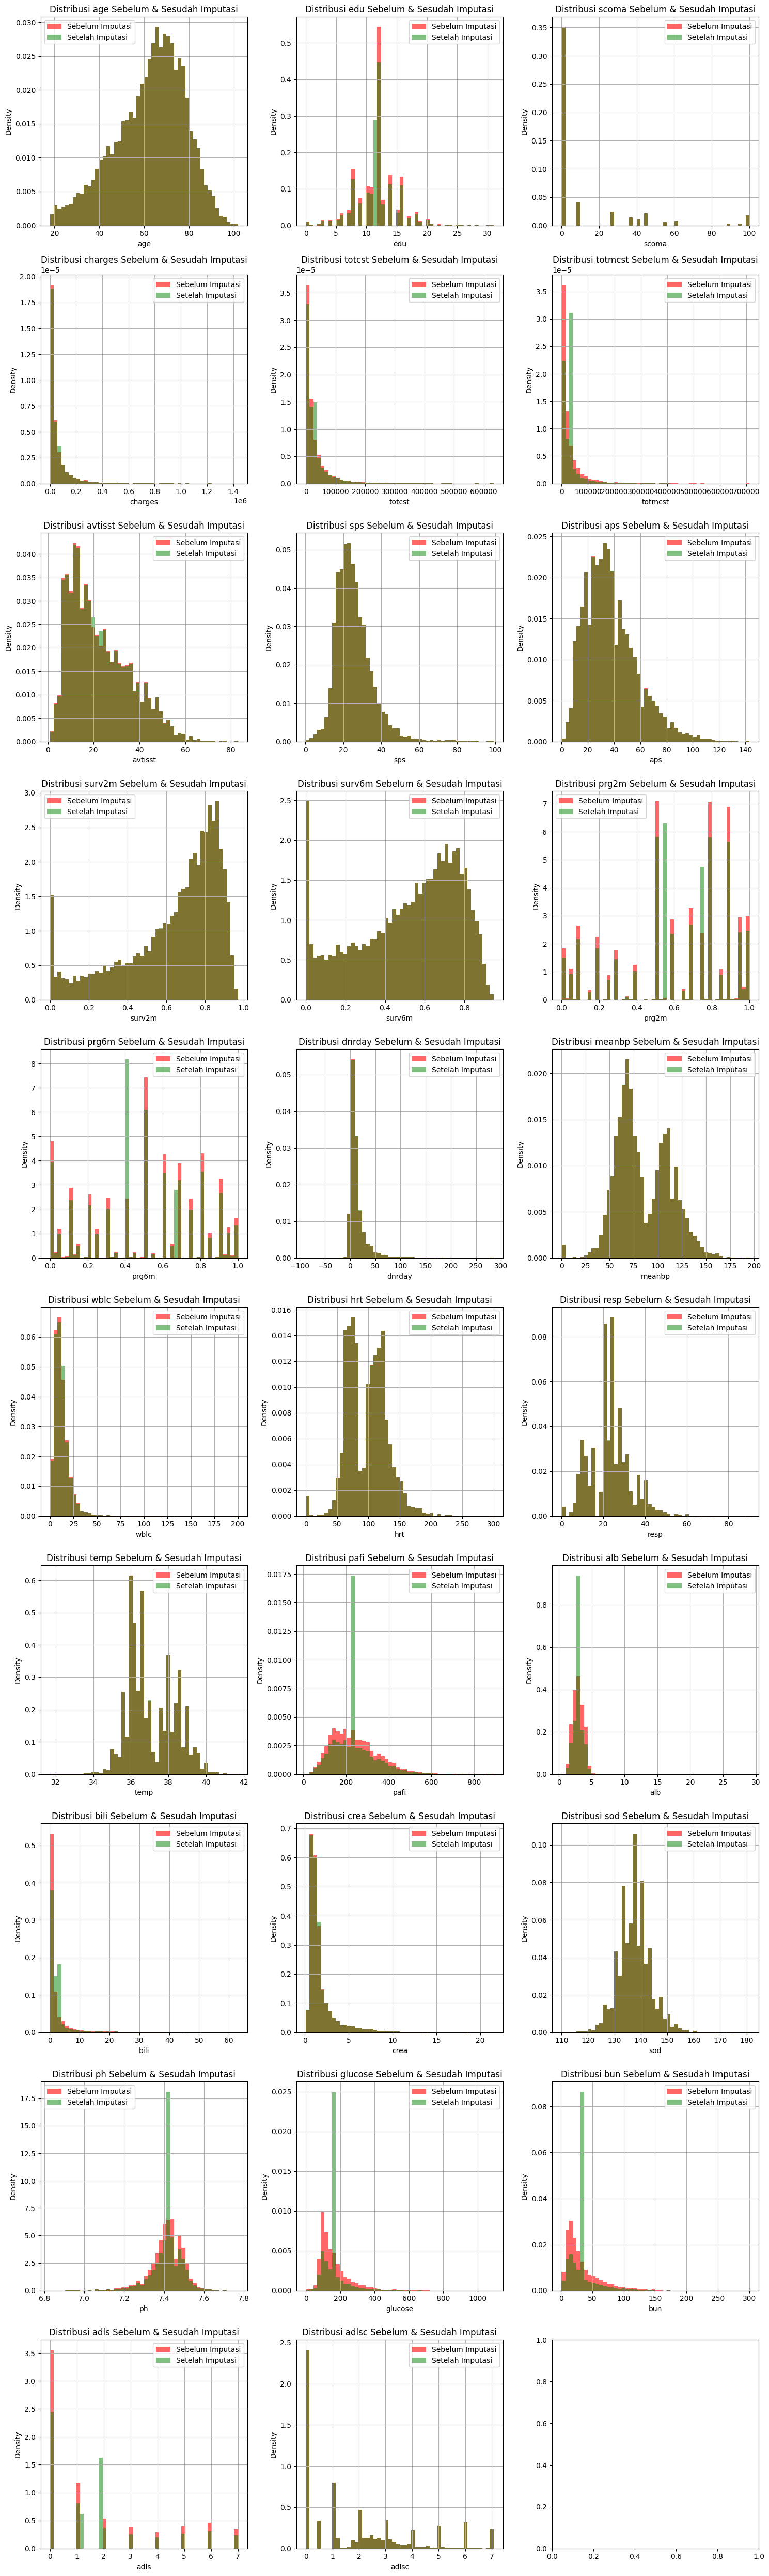

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Salinan df untuk visualisasi (sebelum imputasi)
df_original = pd.read_csv('data.csv')
df_original.drop(['urine','adlp'], axis = 1, inplace = True)

numeric_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

num_plots = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_plots // 3) + (num_plots % 3 > 0), ncols=3, figsize=(15, 5 * (num_plots // 3 + 1)))

axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]


    df_original[col].hist(bins=50, ax=ax, density=True, color='red', alpha=0.6, label='Sebelum Imputasi')

    dfimpu[col].hist(bins=50, ax=ax, density=True, color='green', alpha=0.5, label='Setelah Imputasi')

    ax.set_title(f"Distribusi {col} Sebelum & Sesudah Imputasi")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()


# NORMALISASI

Cek distribusi data normal atau tidak dengan grafik dan skewness setelah imputasi

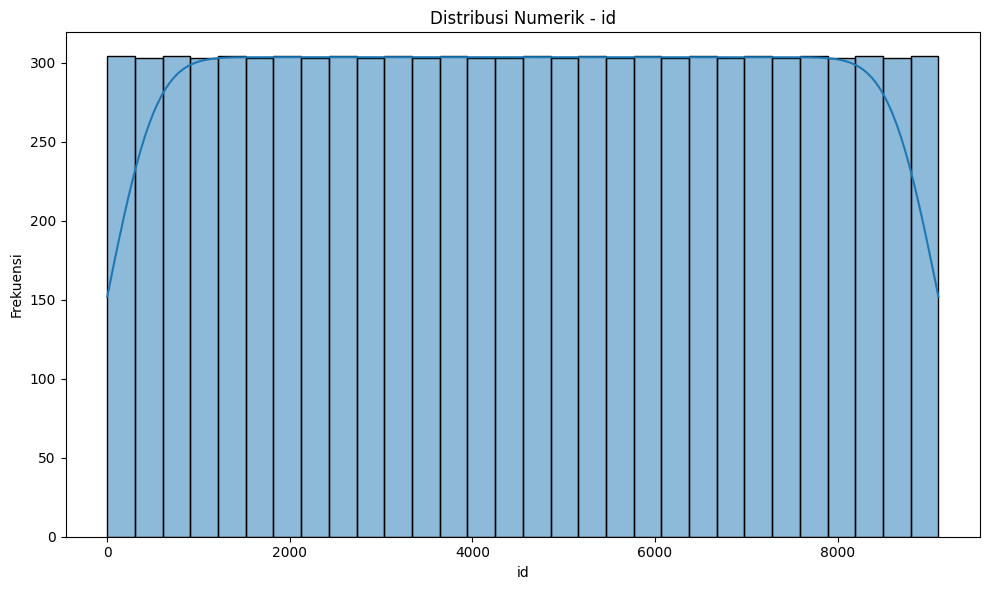

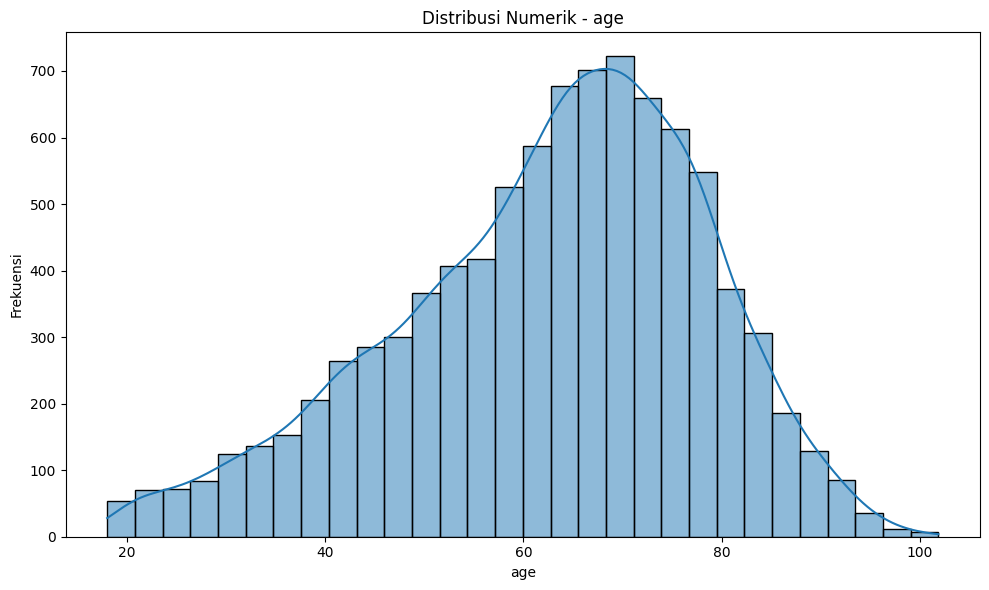

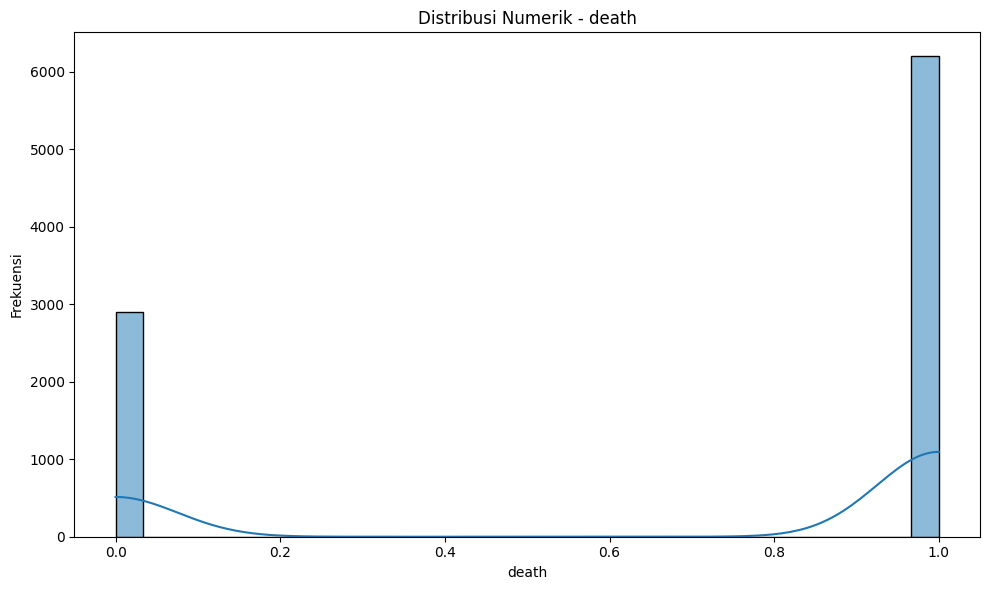

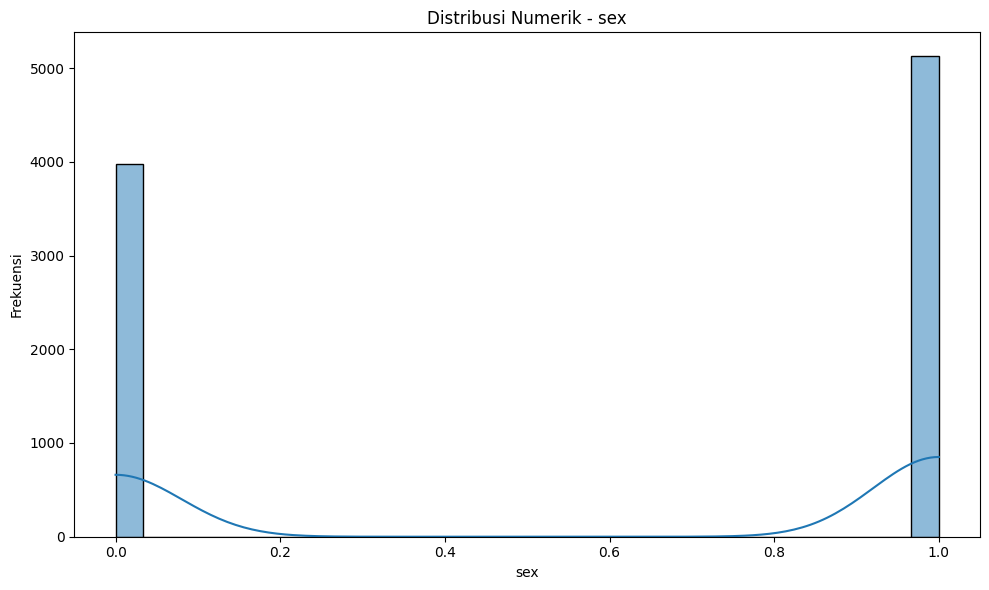

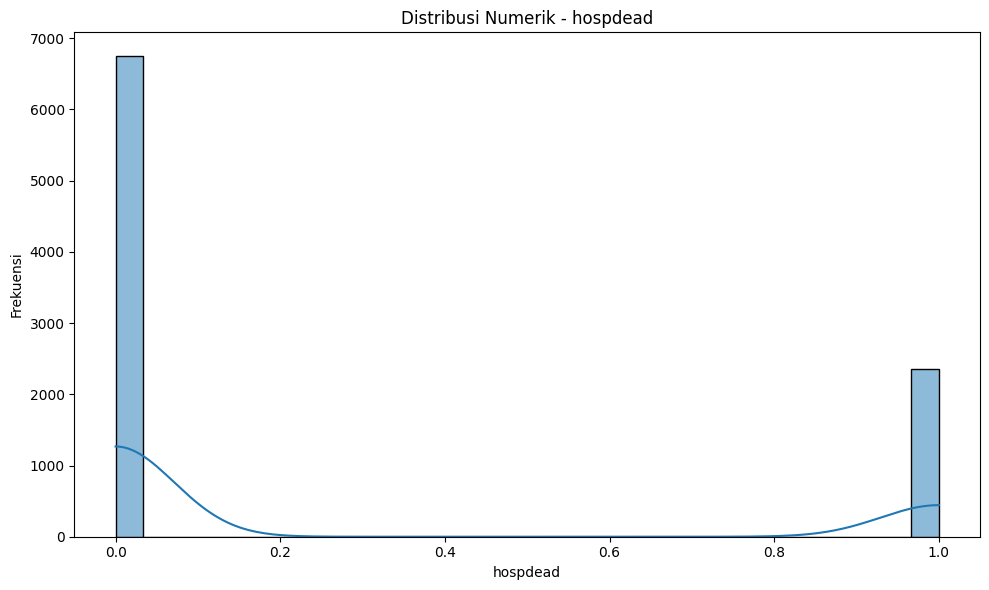

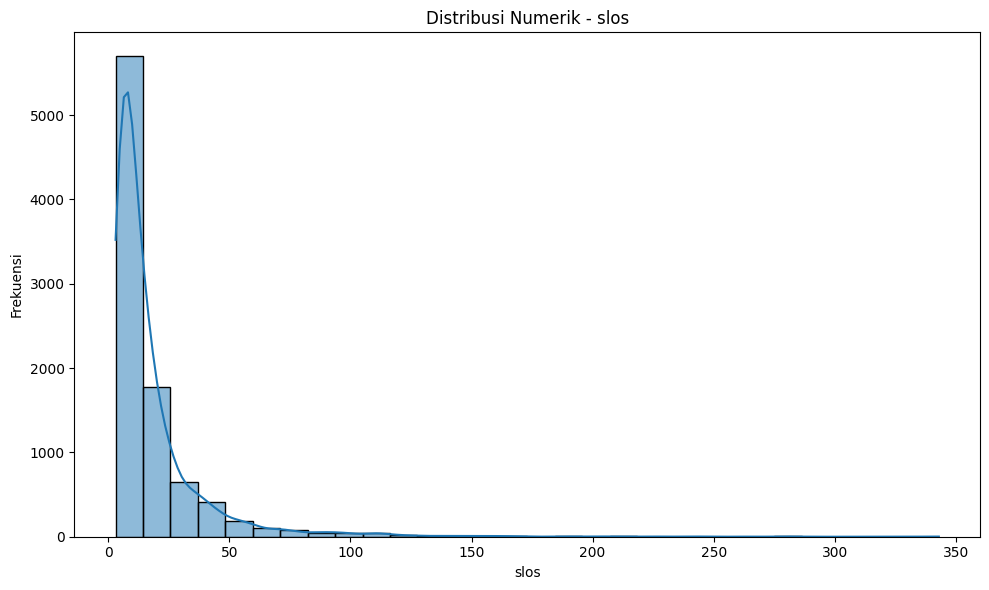

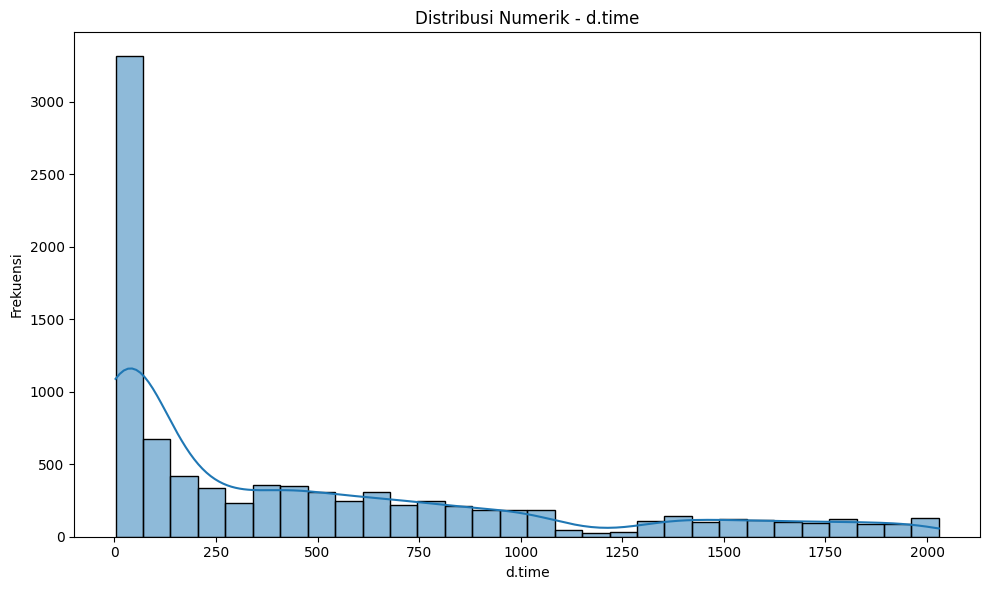

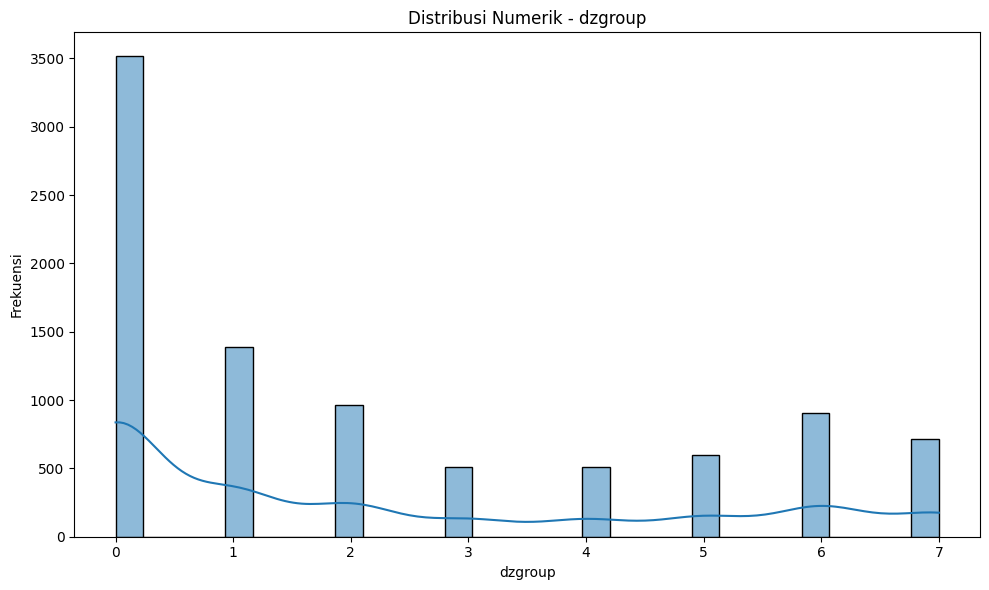

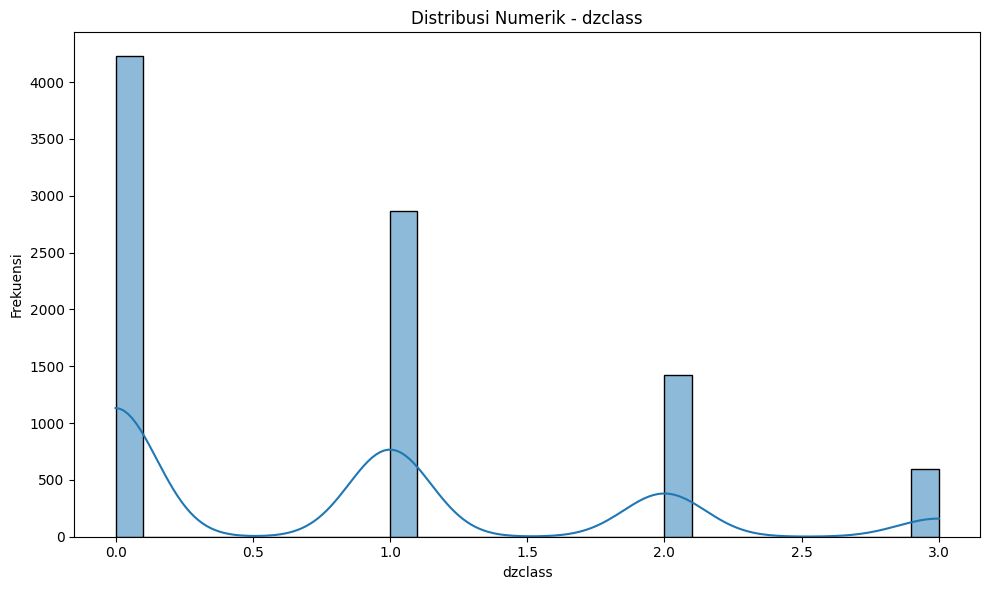

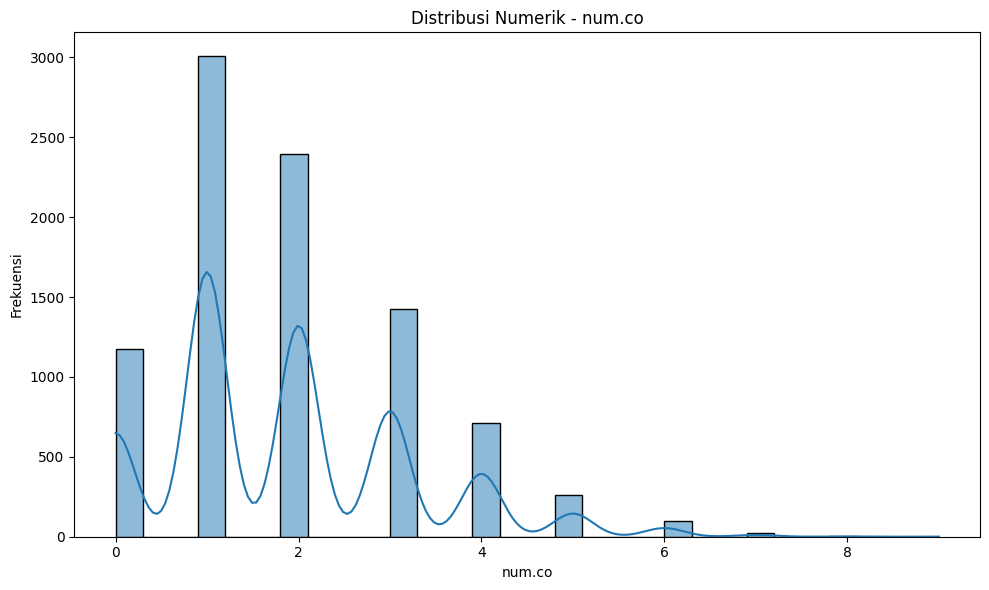

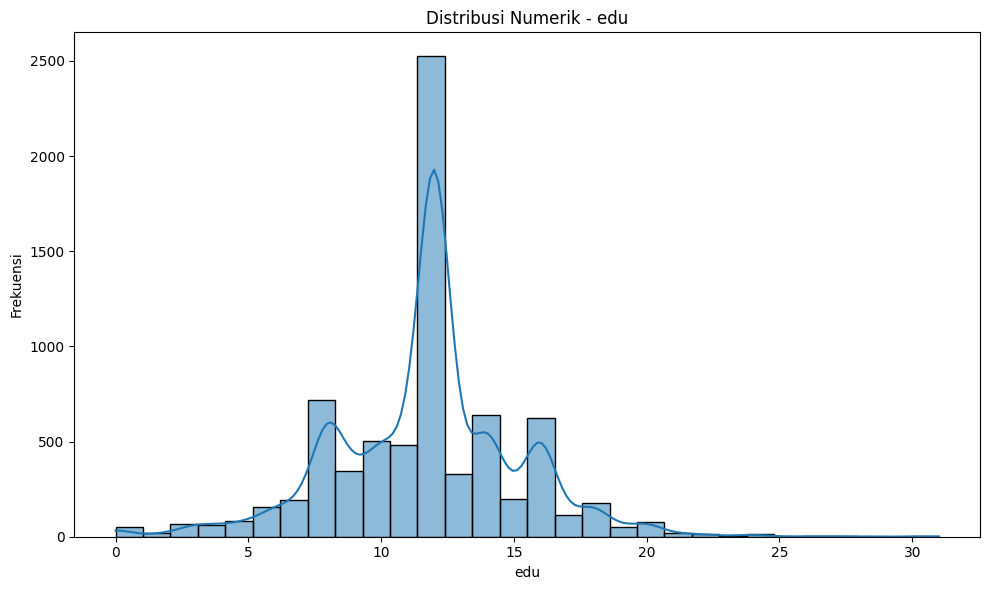

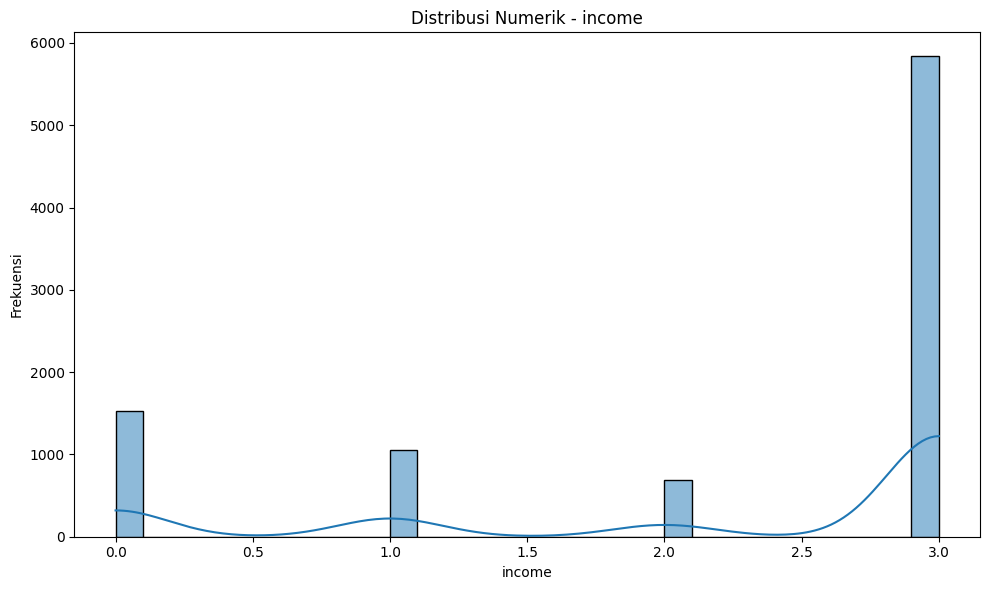

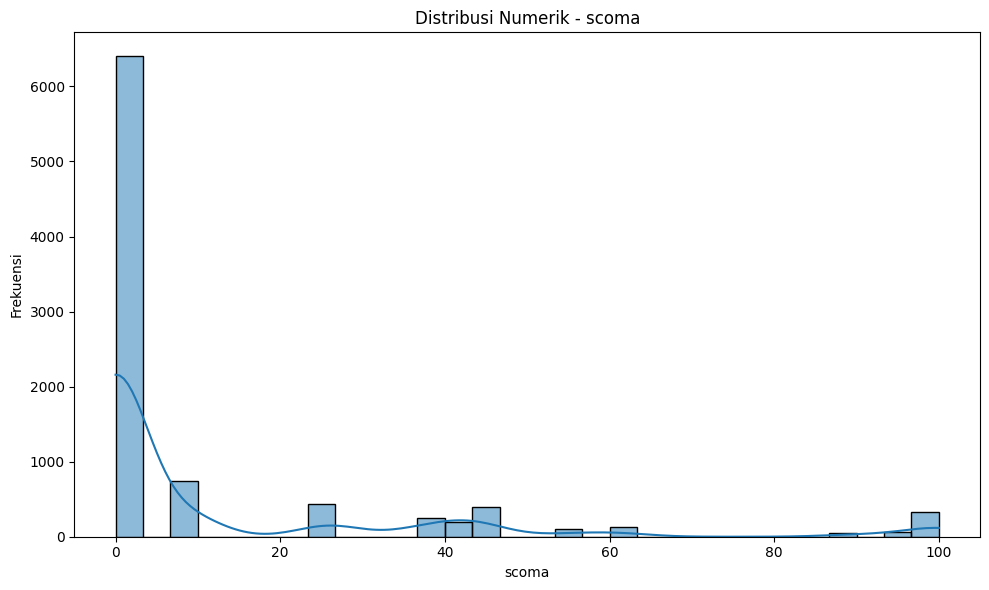

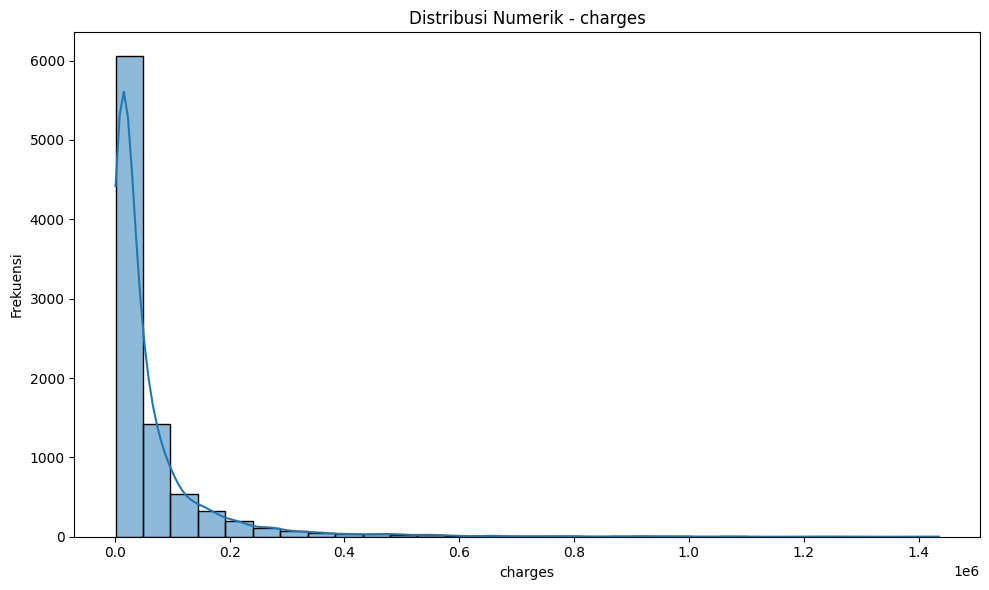

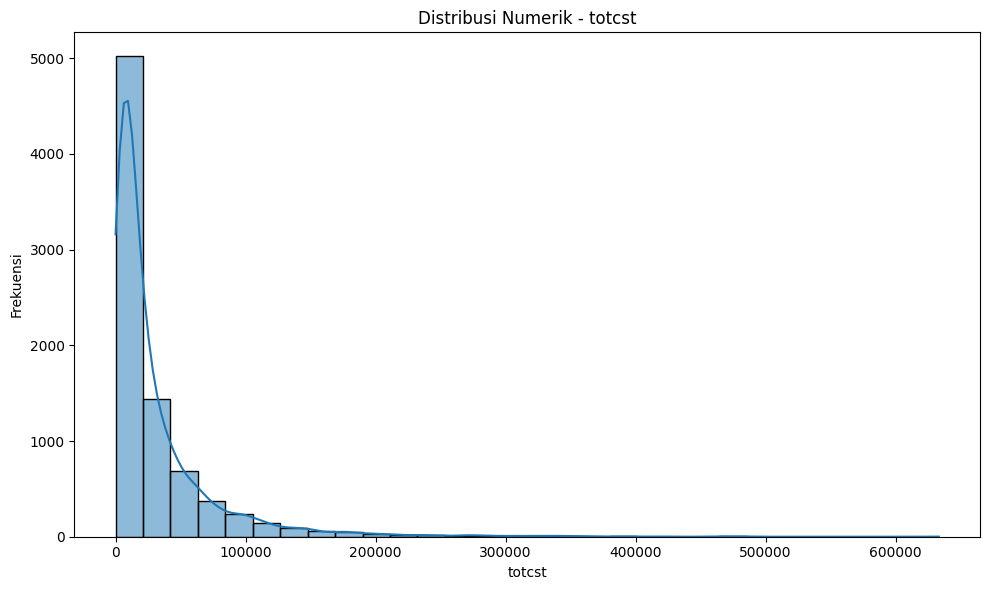

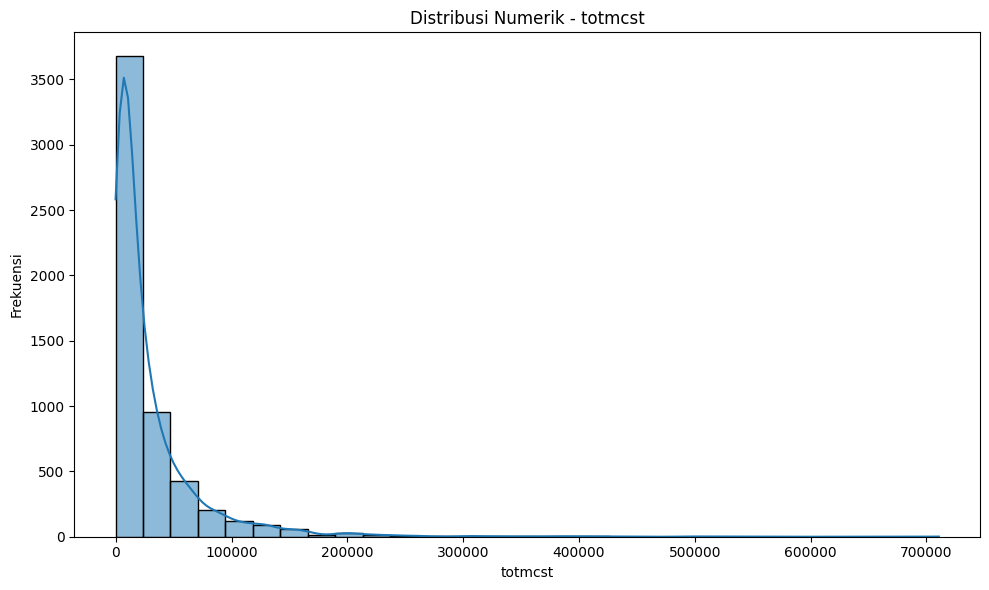

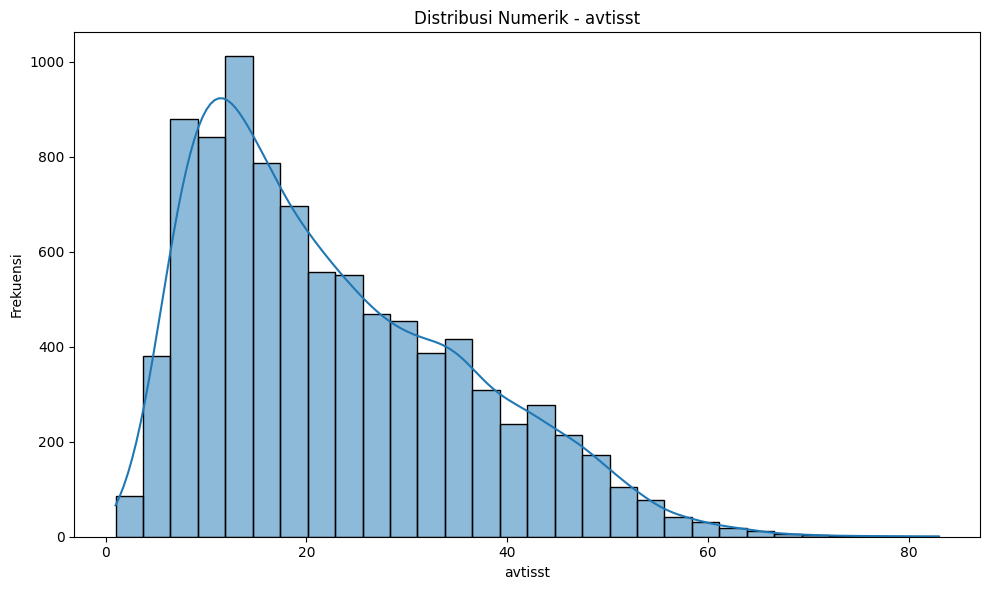

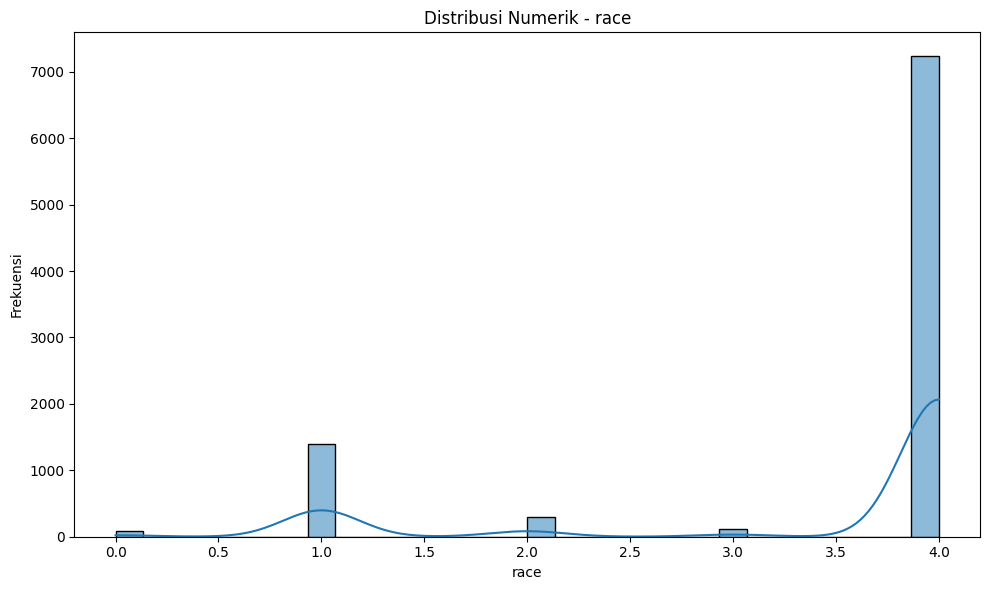

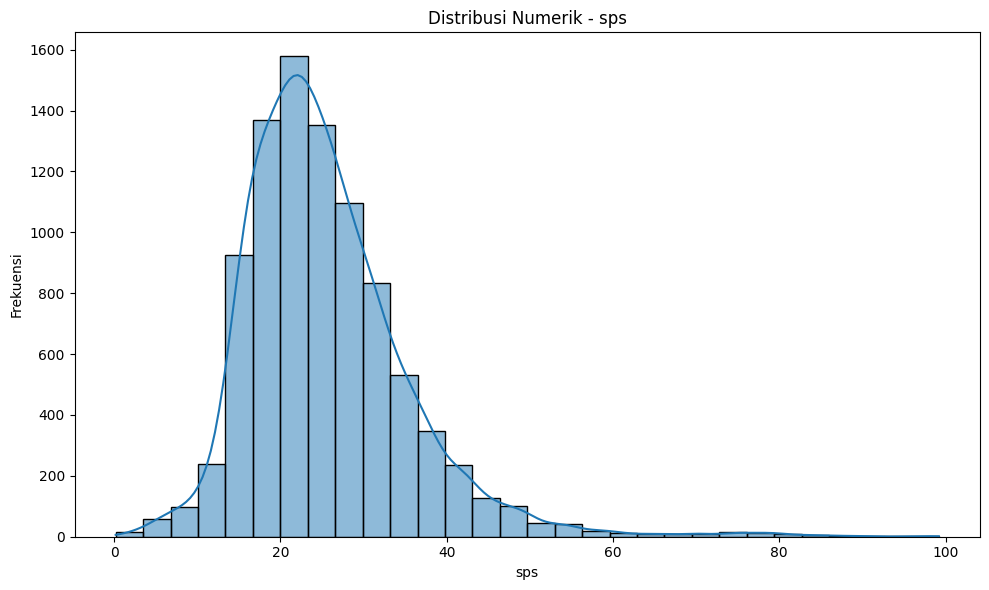

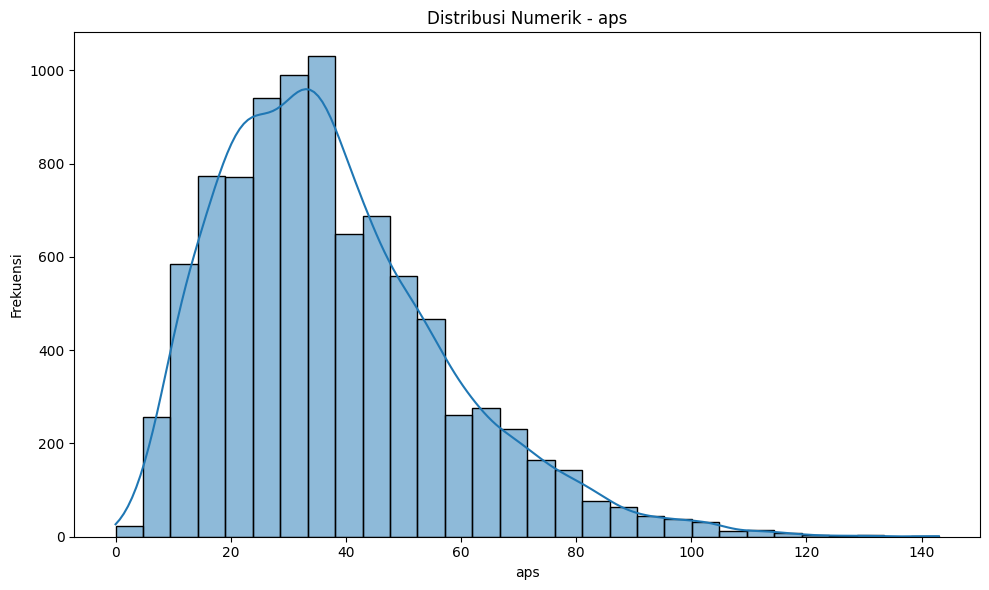

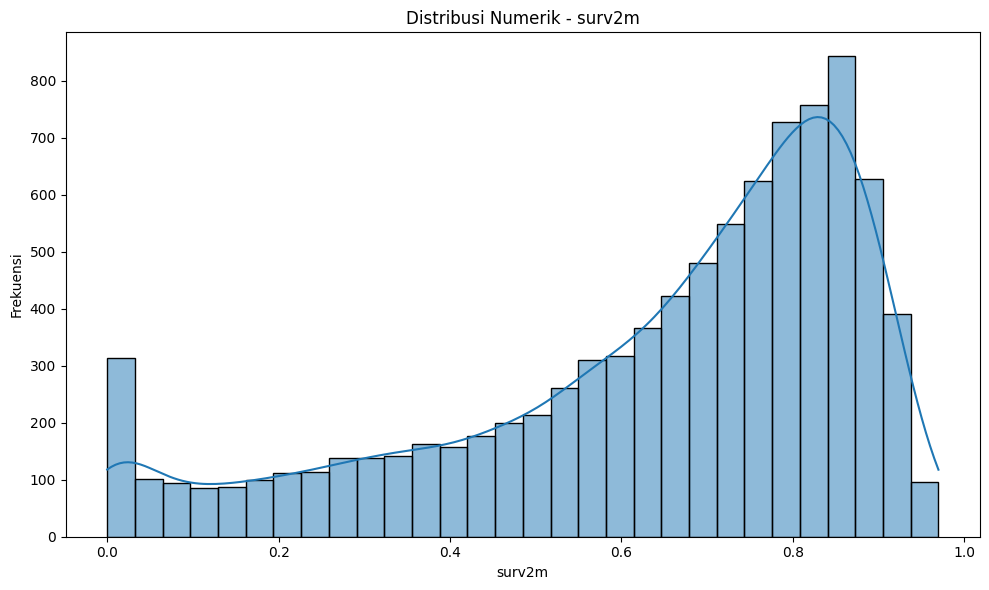

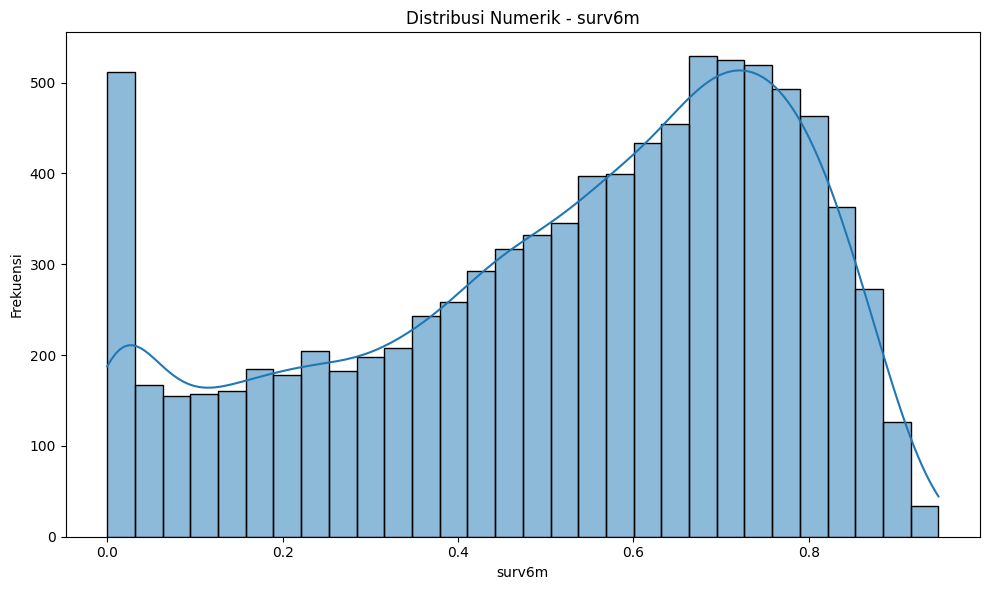

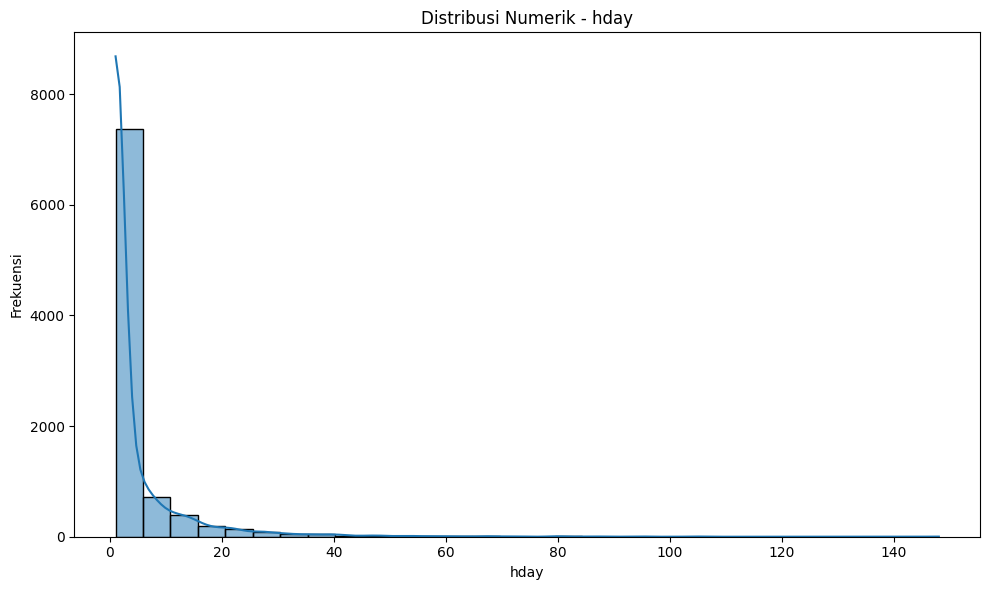

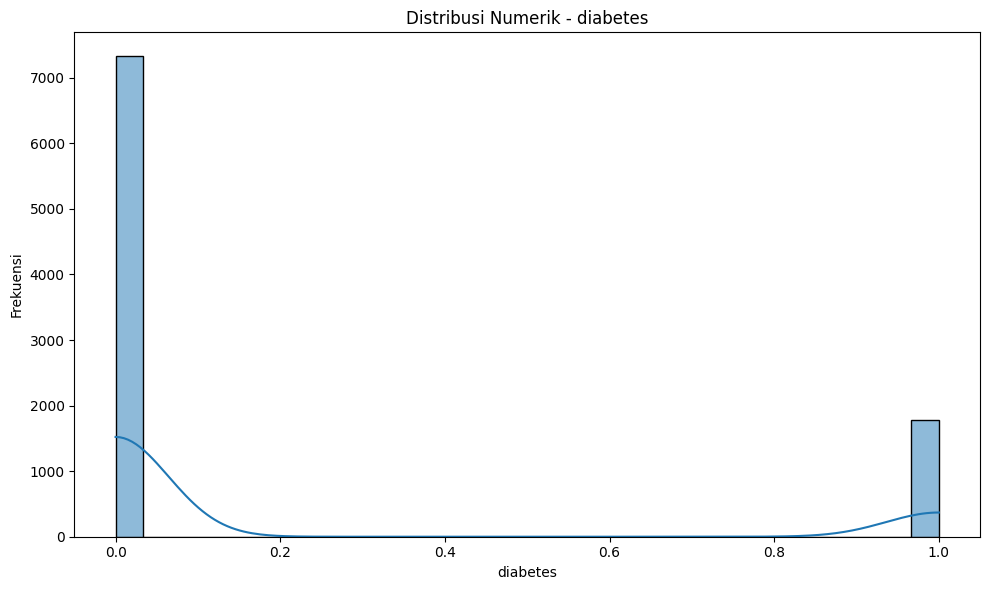

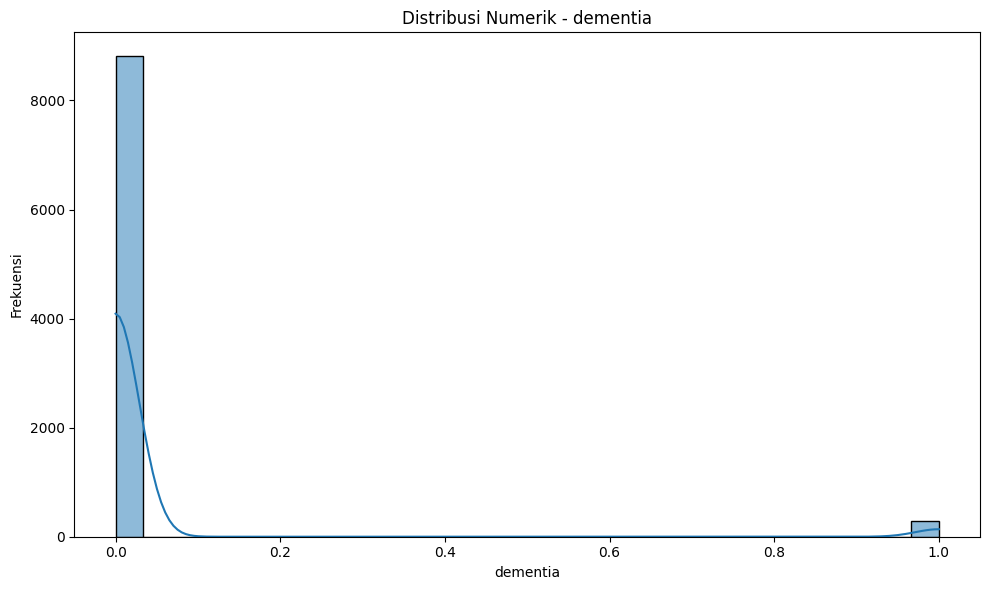

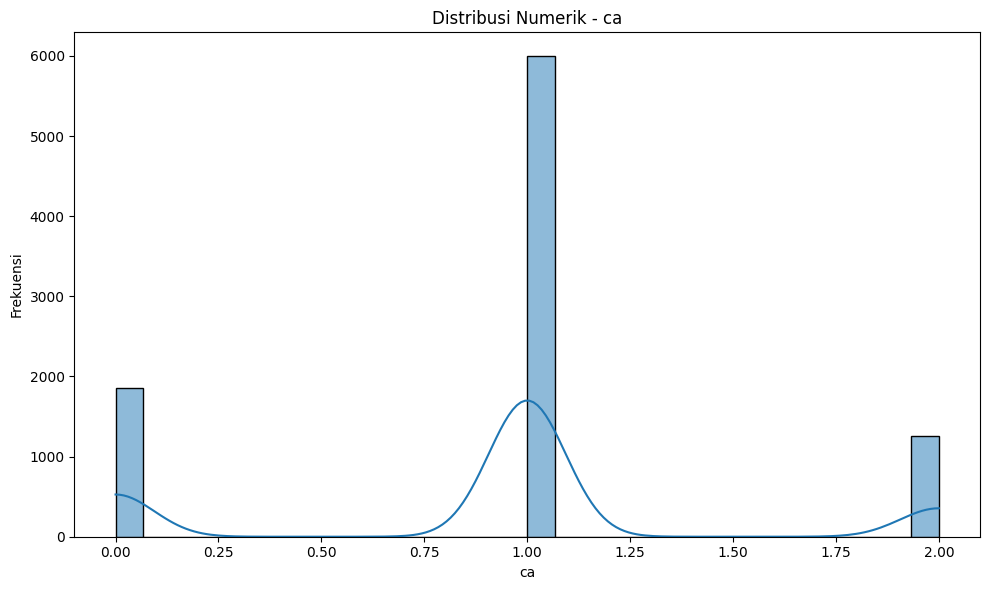

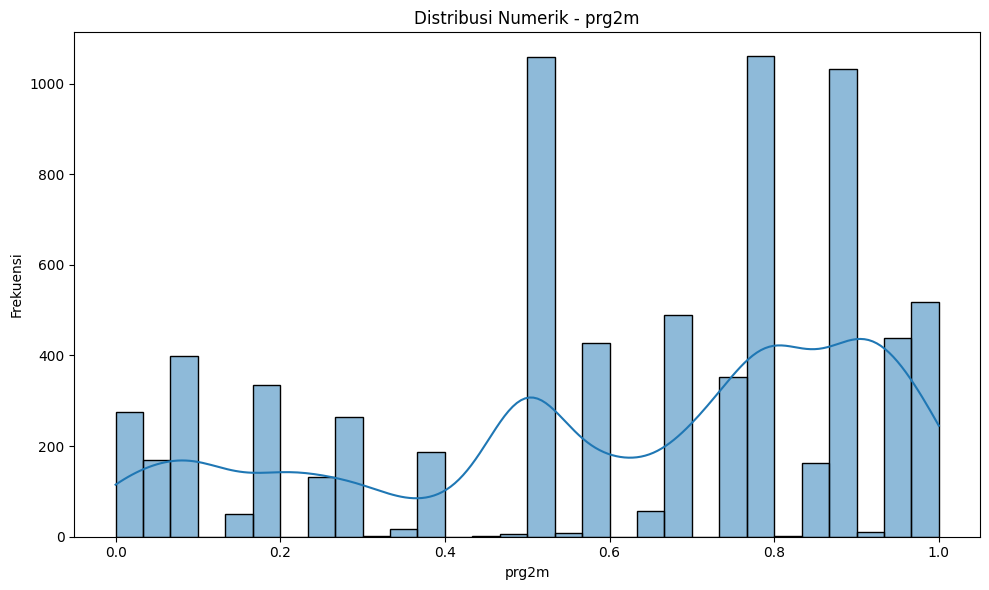

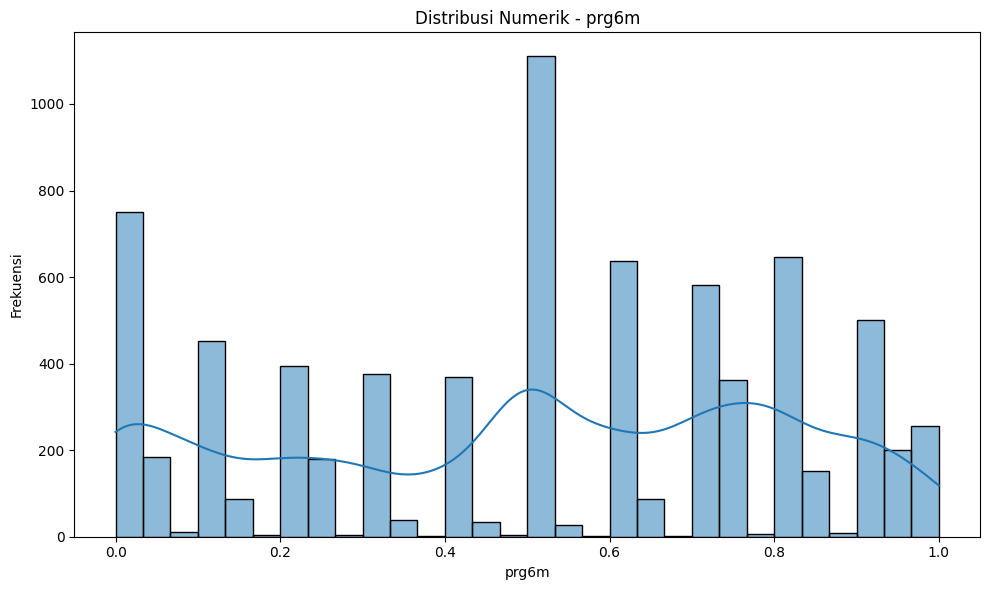

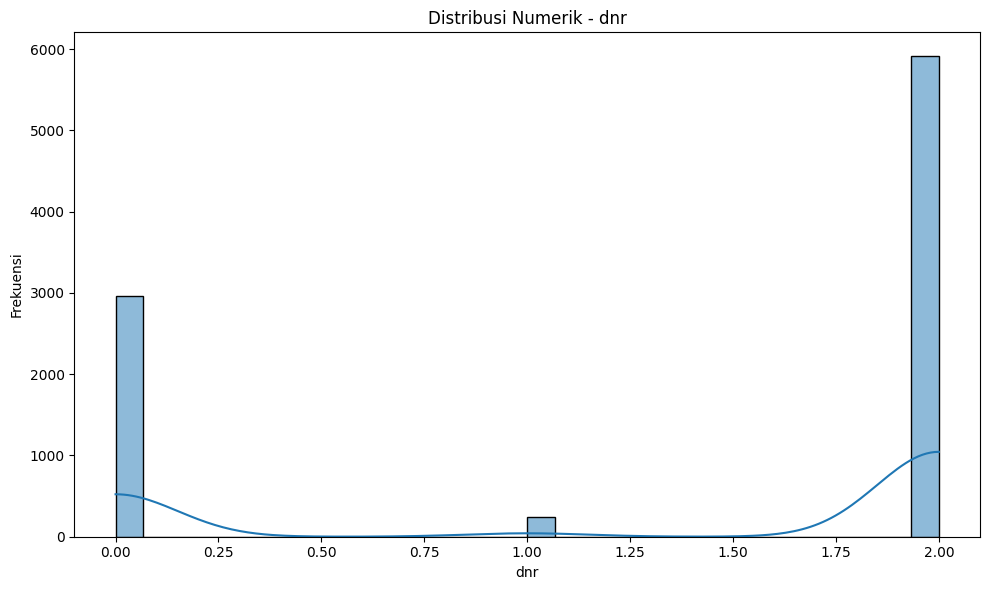

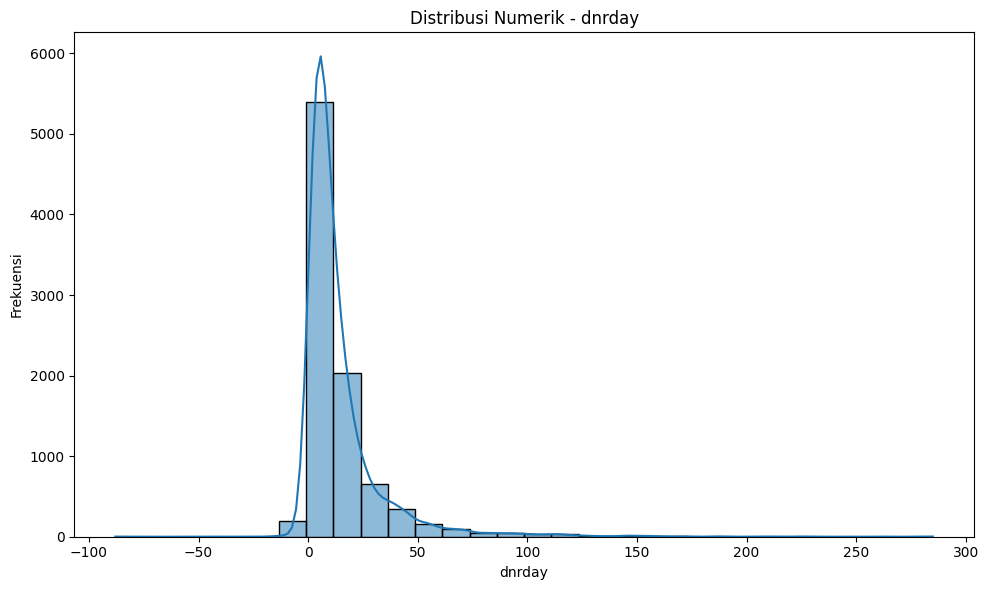

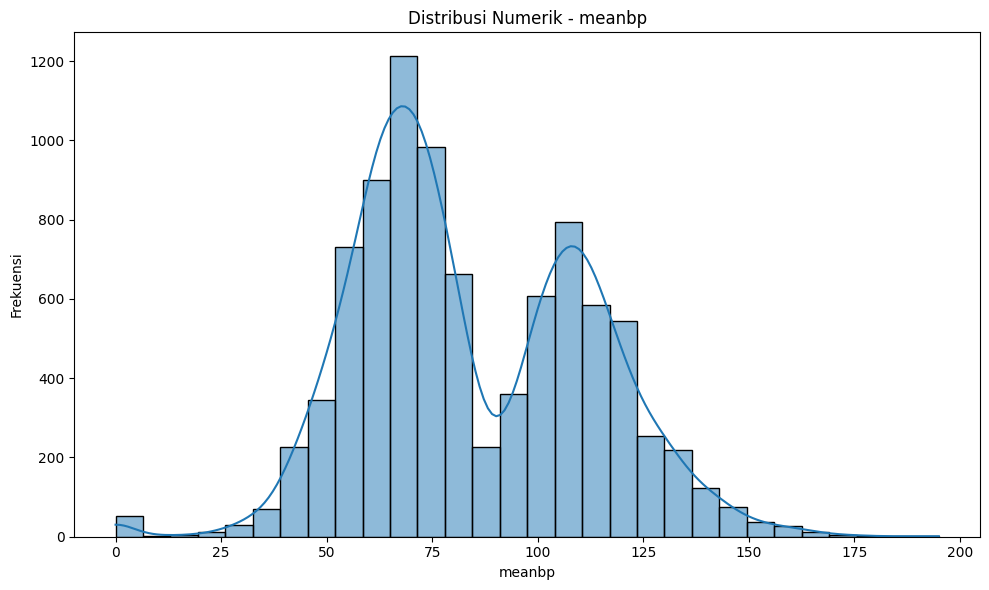

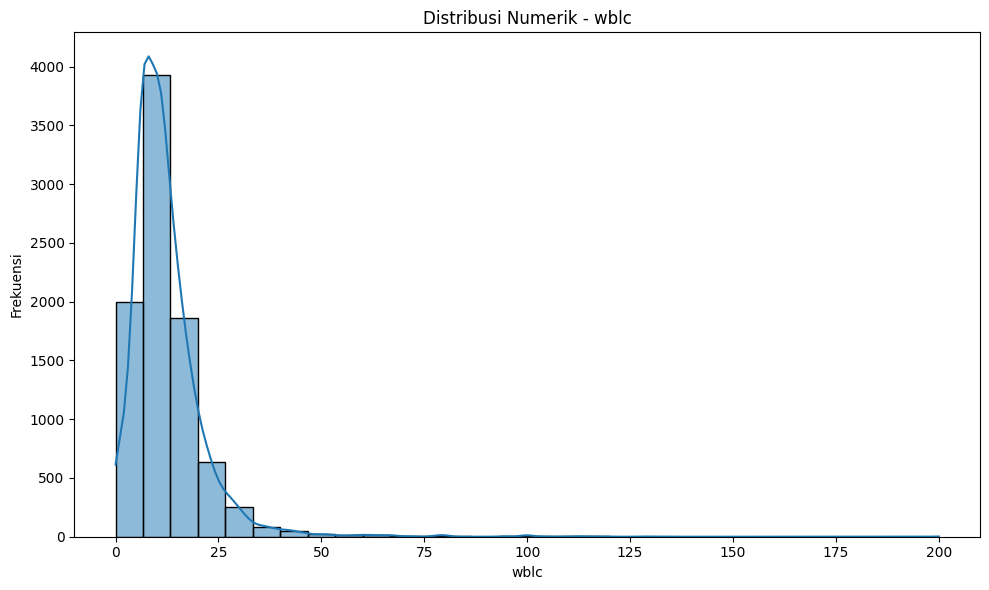

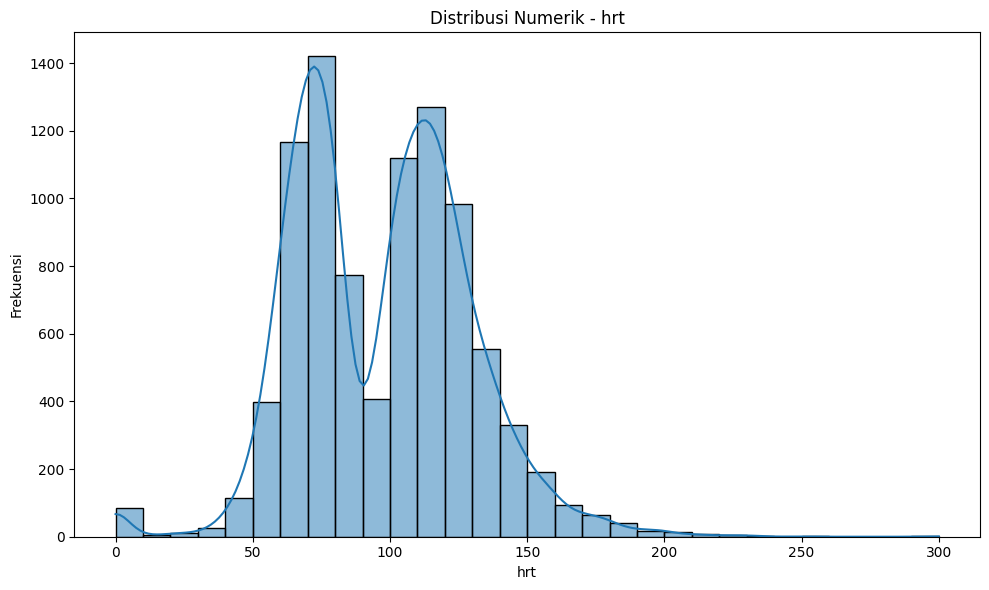

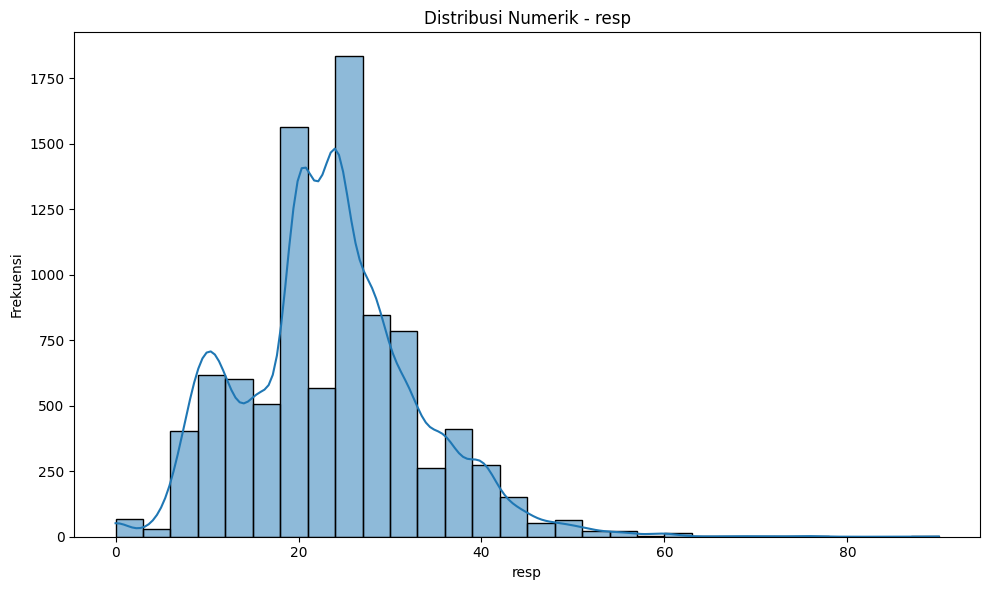

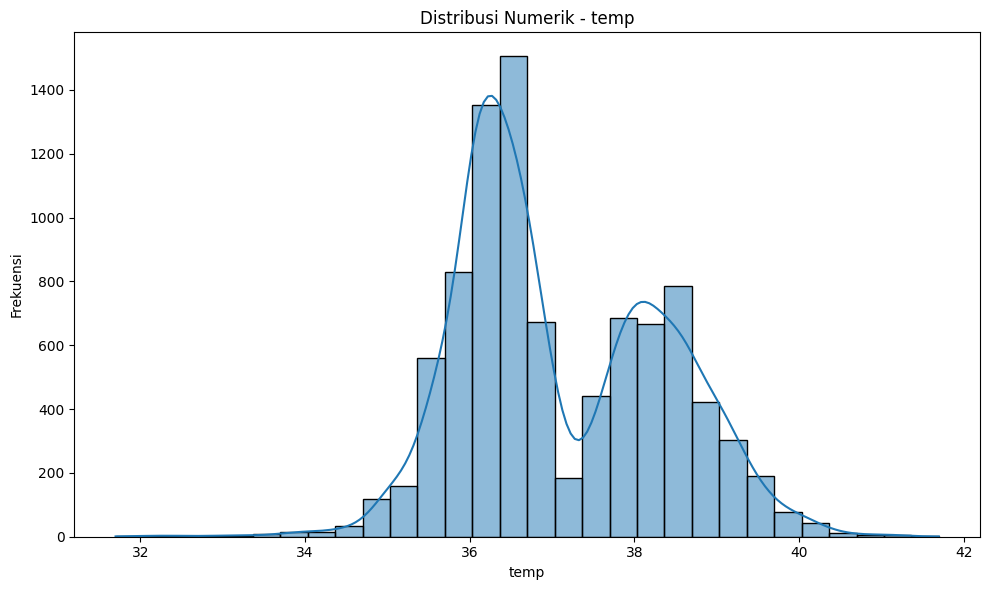

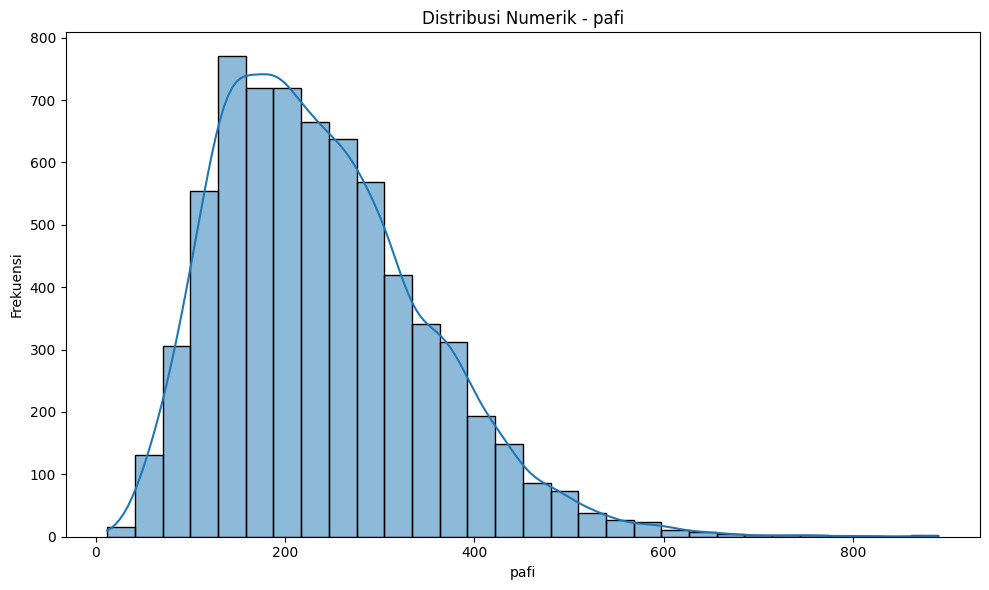

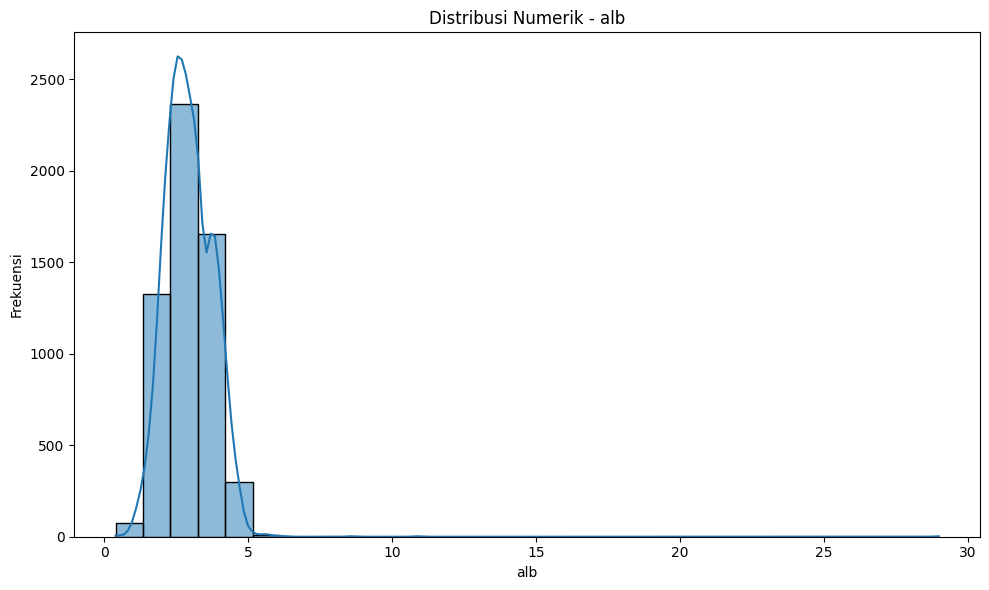

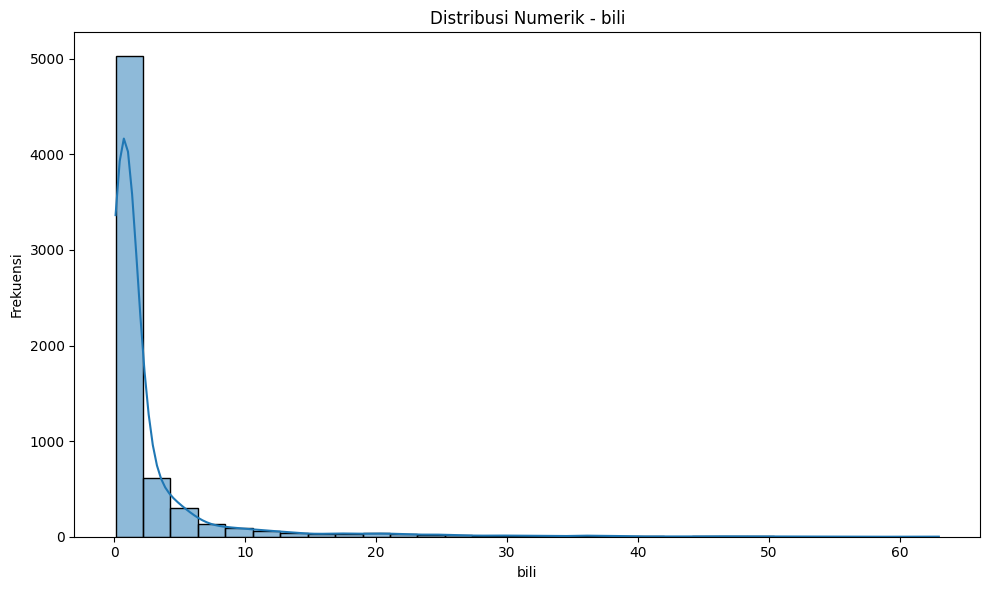

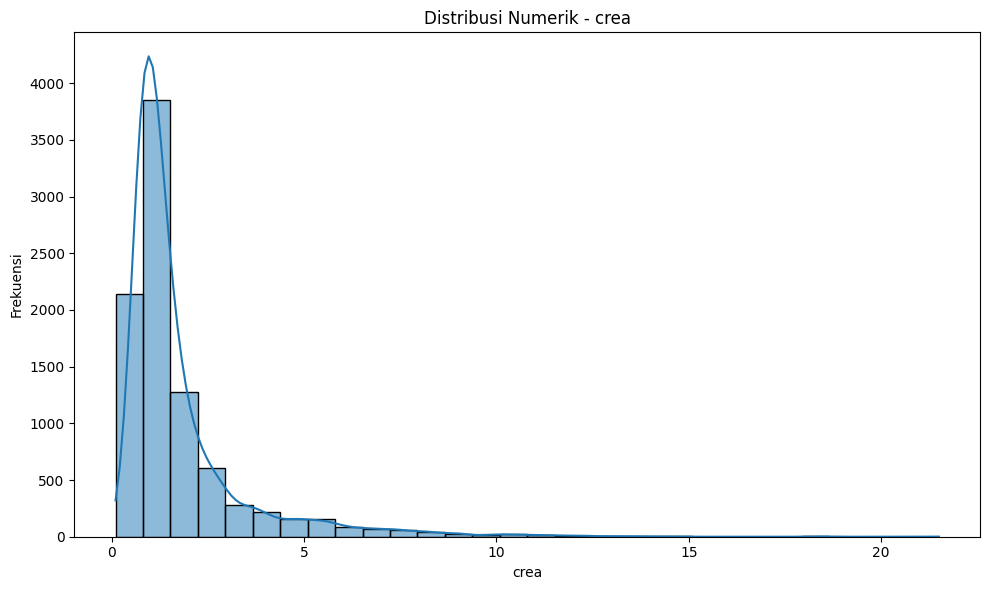

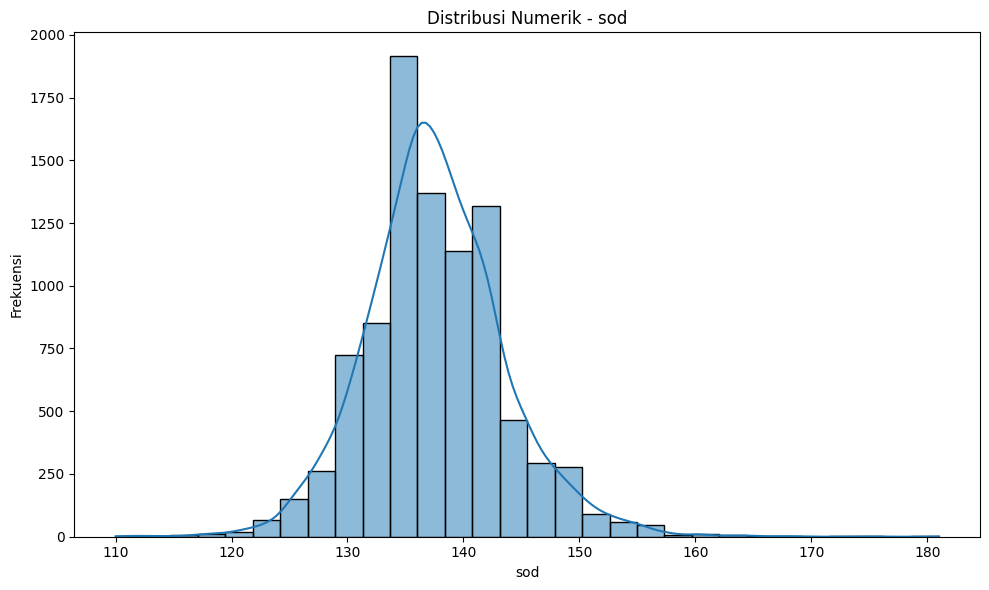

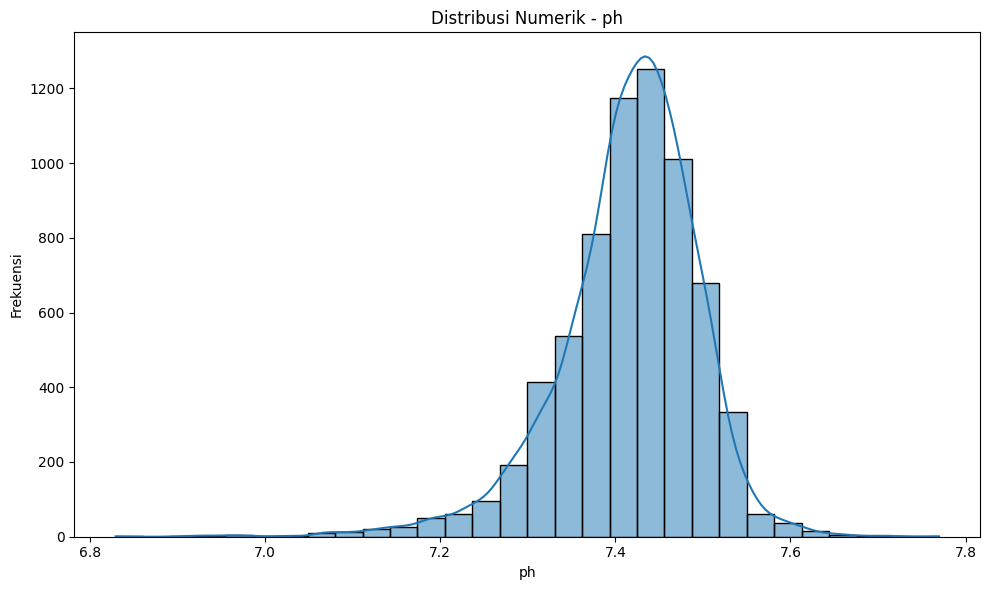

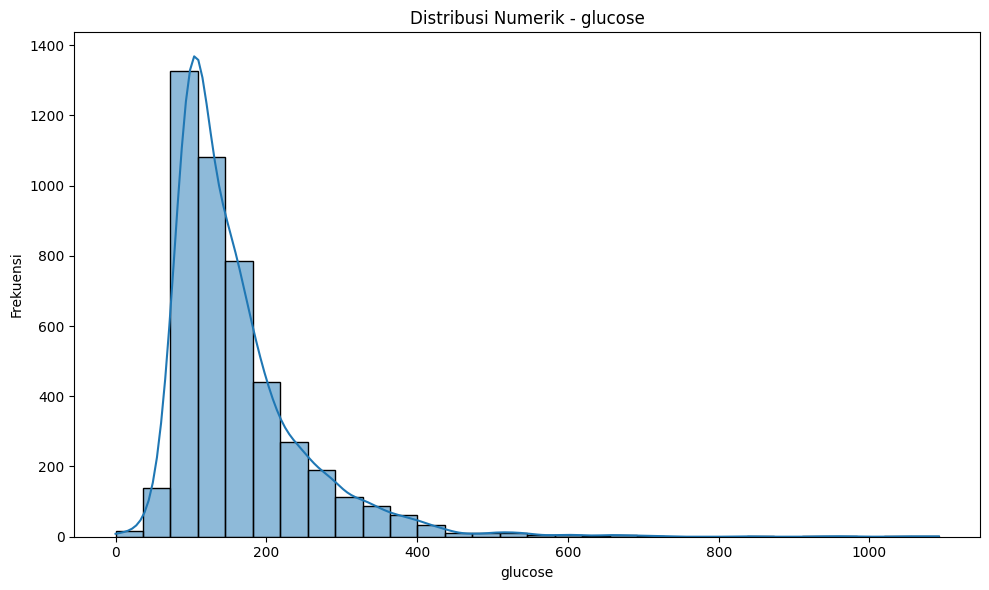

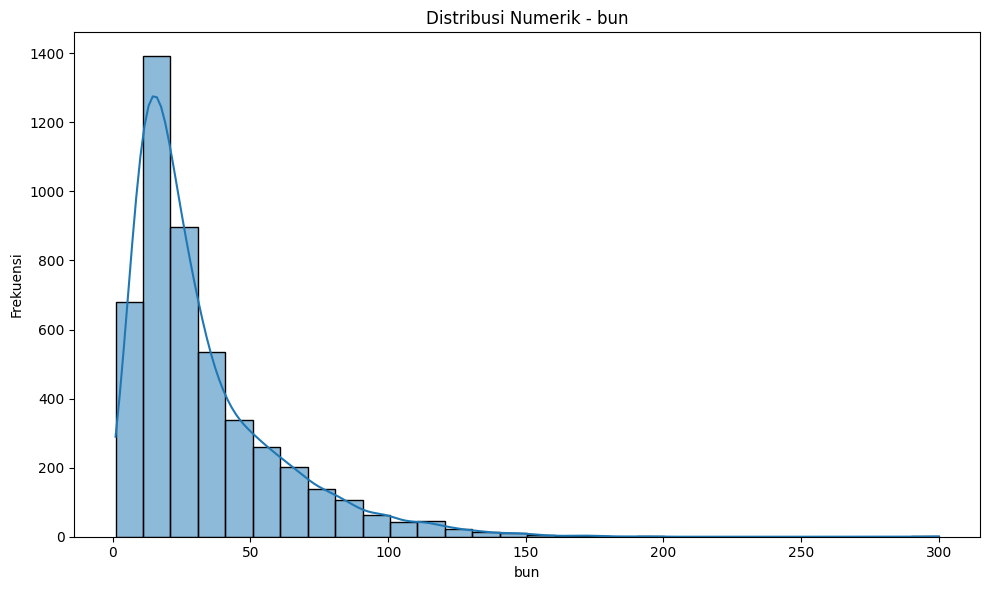

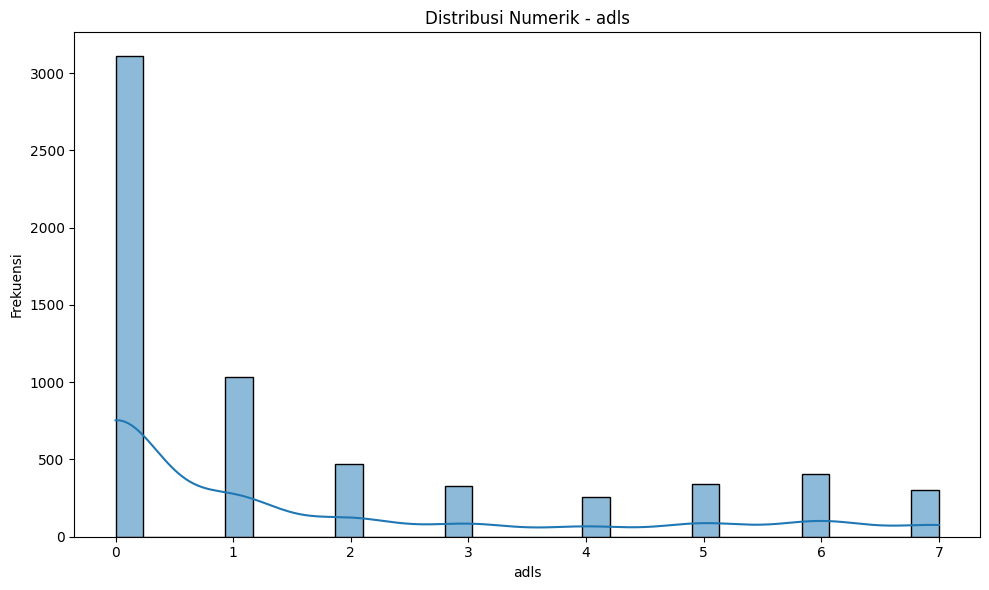

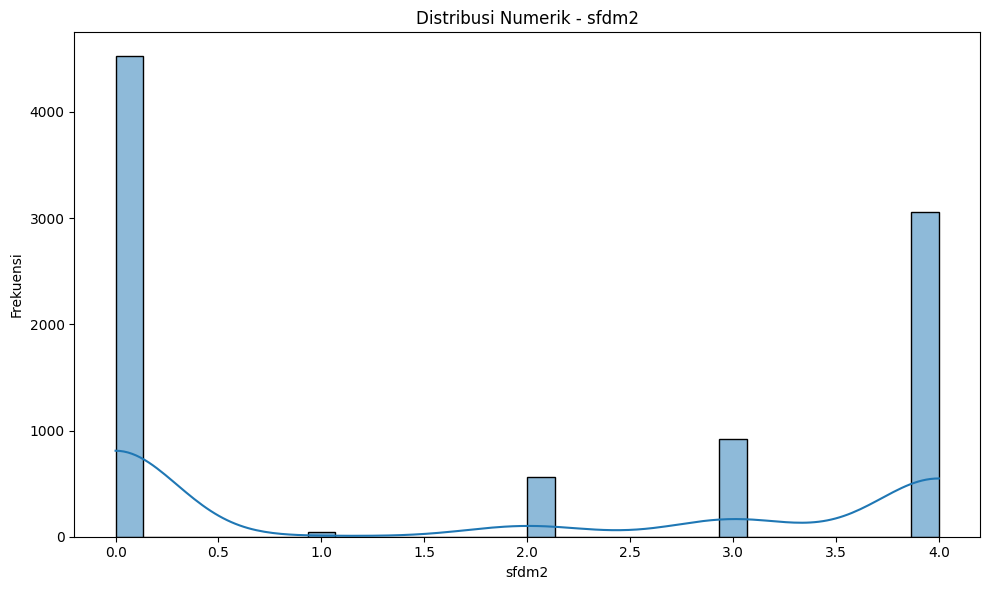

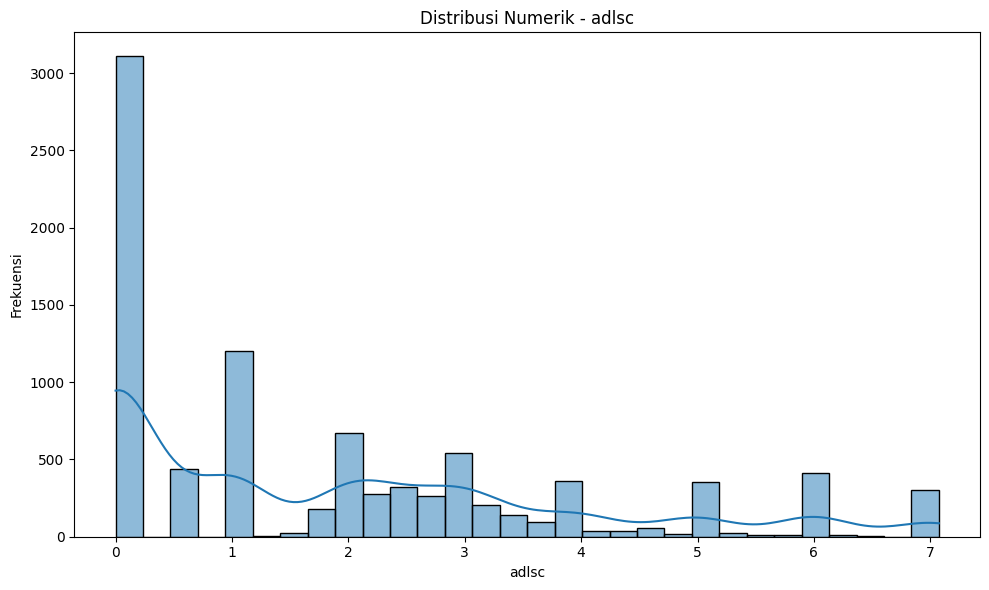

In [ ]:
for col in df.columns:
    plt.figure(figsize=(10, 6))


    if dfimpu[col].dtype == 'object':
        sns.countplot(x=col, data=df)
        plt.title(f'Distribusi Kategorikal - {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
    else:
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribusi Numerik - {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')

    plt.show()

In [ ]:
import pandas as pd
from scipy.stats import skew
skewness_dict = {}

for column in dfimpu.select_dtypes(include=['float64', 'int64']).columns:
    nilai_skewness = skew(dfimpu[column])
    skewness_dict[column] = nilai_skewness


print("Hasil Skewness untuk setiap fitur:\n")
for column, skew_value in skewness_dict.items():
    print(f"{column}: {skew_value:.2f}")
print("\nInterpretasi Skewness:")
for column, skew_value in skewness_dict.items():
    if skew_value > 0:
        print(f"{column}: Distribusi condong ke kanan (positively skewed).")
    elif skew_value < 0:
        print(f"{column}: Distribusi condong ke kiri (negatively skewed).")
    else:
        print(f"{column}: Distribusi normal (simetris).")

Hasil Skewness untuk setiap fitur:

id: 0.00
age: -0.50
death: -0.78
sex: -0.25
hospdead: 1.10
slos: 4.62
d.time: 1.20
dzgroup: 0.74
dzclass: 0.86
num.co: 0.82
edu: -0.06
income: -0.98
scoma: 2.33
charges: 4.73
totcst: 4.16
totmcst: 5.55
avtisst: 0.77
race: -1.63
sps: 1.60
aps: 0.94
surv2m: -1.04
surv6m: -0.55
hday: 5.85
diabetes: 1.54
dementia: 5.27
ca: 0.01
prg2m: -0.66
prg6m: -0.20
dnr: -0.69
dnrday: 4.28
meanbp: 0.26
wblc: 4.31
hrt: 0.21
resp: 0.48
temp: 0.31
pafi: 0.97
alb: 6.17
bili: 5.70
crea: 3.24
sod: 0.36
ph: -1.19
glucose: 3.62
bun: 2.60
adls: 1.41
sfdm2: 0.18
adlsc: 0.94

Interpretasi Skewness:
id: Distribusi normal (simetris).
age: Distribusi condong ke kiri (negatively skewed).
death: Distribusi condong ke kiri (negatively skewed).
sex: Distribusi condong ke kiri (negatively skewed).
hospdead: Distribusi condong ke kanan (positively skewed).
slos: Distribusi condong ke kanan (positively skewed).
d.time: Distribusi condong ke kanan (positively skewed).
dzgroup: Distribusi 

semua fitur yang tidak berdistribusi normal akan diolah menggunakan min max scaller

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
dfimpu[numeric.columns] = scaler.fit_transform(dfimpu[numeric.columns])
dfimpu

id       age  death  sex  hospdead      slos    d.time   dzgroup  \
0     0.000000  0.534663    0.0  1.0       0.0  0.005882  1.000000  0.857143   
1     0.000110  0.504702    1.0  0.0       1.0  0.002941  0.000494  0.428571   
2     0.000220  0.414111    1.0  0.0       0.0  0.041176  0.021718  0.428571   
3     0.000330  0.290468    1.0  0.0       0.0  0.000000  0.064166  0.857143   
4     0.000439  0.737930    0.0  0.0       0.0  0.038235  1.000000  0.000000   
...        ...       ...    ...  ...       ...       ...       ...       ...   
9100  0.999561  0.573122    0.0  1.0       0.0  0.058824  0.171273  0.000000   
9101  0.999670  0.442832    0.0  0.0       0.0  0.076471  0.169793  0.714286   
9102  0.999780  0.624537    0.0  1.0       0.0  0.014706  0.169299  0.000000   
9103  0.999890  0.345775    1.0  1.0       1.0  0.011765  0.001974  1.000000   
9104  1.000000  0.757666    1.0  0.0       0.0  0.026471  0.096249  0.000000   

       dzclass    num.co  ...       alb      bili      crea       sod  \
0     0.666667  0.000000  ...  0.048945  0.001590  0.051400  0.436620   
1     0.333333  0.222222  ...  0.089180  0.040736  0.252337  0.309859   
2     0.333333  0.222222  ...  0.089180  0.033382  0.088785  0.338028   
3     0.666667  0.222222  ...  0.089180  0.040736  0.032707  0.408451   
4     0.000000  0.111111  ...  0.089180  0.035353  0.032707  0.464789   
...        ...       ...  ...       ...       ...       ...       ...   
9100  0.000000  0.111111  ...  0.115376  0.004769  0.046723  0.295775   
9101  1.000000  0.111111  ...  0.089180  0.035353  0.271001  0.352113   
9102  0.000000  0.111111  ...  0.089180  0.004769  0.121482  0.408451   
9103  0.000000  0.111111  ...  0.027972  0.004769  0.158879  0.352113   
9104  0.000000  0.111111  ...  0.143358  0.007949  0.051400  0.380282   

            ph   glucose       bun      adls  sfdm2     adlsc  
0     0.670820  0.146404  0.104848  1.000000    0.0  0.989645  
1     0.447560  0.146404  0.104848  0.142857    0.0  0.141378  
2     0.670820  0.146404  0.104848  0.000000    0.0  0.000000  
3     0.623399  0.146404  0.104848  0.000000    1.0  0.000000  
4     0.723780  0.146404  0.104848  0.285714    1.0  0.282756  
...        ...       ...       ...       ...    ...       ...  
9100  0.670820  0.172161  0.066890  0.000000    0.0  0.000000  
9101  0.489096  0.173993  0.160535  0.000000    0.0  0.000000  
9102  0.585670  0.173077  0.197324  0.168603    0.0  0.357034  
9103  0.681205  0.225275  0.180602  0.000000    0.0  0.000000  
9104  0.489096  0.171245  0.046823  0.267127    1.0  0.069947  

[9105 rows x 46 columns]

# MODELLING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Akurasi prediksi: 83.86%

Laporan klasifikasi:
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74       871
         1.0       0.87      0.90      0.88      1861

    accuracy                           0.84      2732
   macro avg       0.82      0.81      0.81      2732
weighted avg       0.84      0.84      0.84      2732



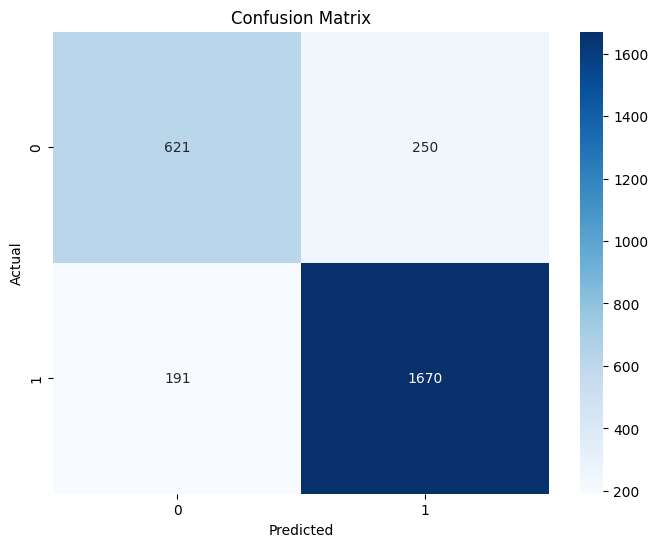

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

X = dfimpu.drop(columns=['death'])
y = dfimpu['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()